<a href="https://colab.research.google.com/github/juanignaciogiacobbe/7506R-2C2023-GRUPO15/blob/main/7506R_TP1_GRUPO15_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; Olaran ,Sebastian; Ayala, Tomás</center>


#Checkpoint 1: Análisis exploratorio y Preprocesamiento de Datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Comenzamos importando todas las librerías que vamos a utilizar en el proyecto

In [2]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt

Cargamos los archivos csv de datos en dos DataFrames de Pandas

In [3]:
ds_hoteles_test = pd.read_csv('./hotels_test.csv')
ds_hoteles_train = pd.read_csv('./hotels_train.csv')



---


# A) Exploracion Inicial

Vamos a empezar viendo qué forma tiene el dataset, cuántas variables tiene y qué describe cada campo, de esta forma podemos saber de antemano con qué nos enfrentamos.

Vemos información sobre las 2 primeras filas del DataFrame

In [4]:
ds_hoteles_train.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0


Vemos información de las últimas 2 filas del DataFrame

In [5]:
ds_hoteles_train.tail(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,No Deposit,9.0,NaN,0,Transient,143.29,0,0,7137e599-4442-41fb-b147-4aba9f344e38,1


Vemos cuántas filas y cuántas columnas tiene el DataFrame

In [6]:
ds_hoteles_train.shape

(61913, 31)

Se tienen 61913 filas y 30 columnas. En otras palabras, contamos con datos correspondientes a 61913 reservas, en las cuales tenemos 31 variables sobre las mismas.

Listamos todos los nombres de las columnas del DataFrame

In [7]:
ds_hoteles_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled']

A partir de lo anteriormente visto, ahora nos interesa saber qué tipos de datos contienen las columnas del DataFrame

In [8]:
ds_hoteles_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           



---

# Limpieza del dataset

Antes de empezar a analizar el dataset en profundidad, buscaremos limpiar los datos. Para ello buscaremos los valores que son nulos en el dataset y que no tienen sentido en el contexto (algunas variables numericas negativas o ciertas variables que no tienen sentido)

Empezamos por ver si hay datos faltantes

In [9]:
print(ds_hoteles_train.isna().sum())

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Siguiendo la idea anterior, ahora veamos cuántos datos no nulos tenemos por columna

In [10]:
print(ds_hoteles_train.count())

hotel                             61913
lead_time                         61913
arrival_date_year                 61913
arrival_date_month                61913
arrival_date_week_number          61913
arrival_date_day_of_month         61913
stays_in_weekend_nights           61913
stays_in_week_nights              61913
adults                            61913
children                          61909
babies                            61913
meal                              61913
country                           61692
market_segment                    61913
distribution_channel              61913
is_repeated_guest                 61913
previous_cancellations            61913
previous_bookings_not_canceled    61913
reserved_room_type                61913
assigned_room_type                61913
booking_changes                   61913
deposit_type                      61913
agent                             54023
company                            3152
days_in_waiting_list              61913


Observamos que la gran mayoría de campos no tienen datos faltantes, hay muy pocas columnas que les faltan datos.

## Variable ADR(885 filas de valores invalidos, 0 o menor)


Esta variable nos dice la tarifa promedio por día de cada reserva. Nos da una idea del precio por día de alojamiento. Es una variable del tipo cuantitativa, por lo que procederemos en la siguiente seccion a analizar sus medidas de resumen(media, mediana, moda, etc). Ahora nos centraremos en encontrar posibles datos mal cargados o faltantes.

In [11]:
columna_adr = ds_hoteles_train['adr']
columna_adr.isna().sum()

0

Esta variable no tiene datos faltantes. Sin embargo, este dato tambien se calcula mediante la division de la suma de los dias de todas las transacciones cuartos y el total de noches de estadia. Como es una sumatoria de precios, esta variable no deberia admitar valores menores o iguales a 0

In [12]:
(columna_adr > 0).value_counts()

True     61028
False      885
Name: adr, dtype: int64

Como podemos ver que alrededor de 885 valores, tiene valores menores o iguales a 0, lo cual implicaria que un cuarto de hotel basicamente es gratis

## Variable Adults (197 filas con un valor invalido de 0)

Es una variable del tipo cuantitativas, son numeros enteros que representar la cantidad de adultos estan registrados en la reserva

In [13]:
columna_adults = ds_hoteles_train['adults']
(columna_adults > 0).value_counts()

True     61716
False      197
Name: adults, dtype: int64

Como podemos ver, hay al menos 197 filas cargadas en el dataset que no tienen ningun adulto registrado en la reserva. Debido a este numero tan bajo, son estas filas son candidatas a ser eliminadas del dataset.


Veamos si además, tiene datos faltantes

In [14]:
columna_adults.isna().sum()

0

## Variable Children ( 4 filas que son na)

Es una variable cuantitativa que representa la cantidad de niños que estan presente en la reserva

In [15]:
columna_children = ds_hoteles_train['children']
columna_children.value_counts()

0.0     57457
1.0      2457
2.0      1955
3.0        39
10.0        1
Name: children, dtype: int64

In [16]:
(columna_children >= 0).value_counts()

True     61909
False        4
Name: children, dtype: int64

In [17]:
columna_children.isna().sum()

4

In [18]:
filas_con_children_na = ds_hoteles_train.loc[columna_children.isna()]
filas_con_children_na

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
27359,City Hotel,1,2015,August,32,5,0,2,3,NaN,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,6ad2b270-d3ae-464f-9d4d-0722e4c4e7bc,1
32654,City Hotel,1,2015,August,32,5,0,2,2,NaN,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,af8b8f11-dae4-494a-81f9-9aabb9d3b9ba,1
50323,City Hotel,8,2015,August,33,13,2,5,2,NaN,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,322fd306-7177-4752-88c2-891293fceba6,1
58511,City Hotel,2,2015,August,32,3,1,0,2,NaN,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,d94b4fca-243f-498c-a52f-14b52e7e5e72,1


Hay 4 filas, que no poseen valores dentro de la categoria children. Habra que ver en base al analisis si estos valores faltantes tienen que ser suplidos o eliminados

## Variable Agent( 7890 datos faltantes)

Es una variable de tipo cualitativa, que expresa el ID de la agencia de viajes que realizó la reserva.

In [19]:
columna_agent= ds_hoteles_train['agent']

columna_agent.value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

Veamos si tiene valores faltantes

In [20]:
columna_agent.isna().sum()

7890

Existen 7890 registros con valores faltantes en el dataset,luego tomaremos la decision sobre ellos

## Variable Arrival Date Week Number (969 valores fuera del rango de cantidad de semanas dentro de un año)


Es una variable cuanitativa,representa el número de semana de la fecha de llegada.




Comenzamos por ver la cantidad de valores posibles que puede tomar la variable, si hay algun valor nulo cargado y si los valores estan dentro del rango esperado de semanas dentro de un año

In [21]:
columna_arrival_date_week = ds_hoteles_train['arrival_date_week_number']
columna_arrival_date_week.value_counts()

33    1876
18    1611
30    1609
32    1600
17    1547
34    1533
28    1490
21    1467
20    1464
38    1456
42    1449
41    1449
29    1424
25    1412
31    1397
15    1385
22    1370
39    1368
23    1362
27    1359
24    1354
35    1305
40    1271
13    1257
16    1250
26    1232
43    1224
19    1196
14    1189
44    1170
8     1170
37    1166
36    1166
10    1085
9     1082
7     1073
45    1037
11    1028
12     995
53     969
49     915
46     837
47     788
50     781
6      735
4      733
48     721
3      668
5      655
2      642
52     575
1      552
51     464
Name: arrival_date_week_number, dtype: int64

Podemos notar que esta variable esta relacionada con el mes del año correspondinte al numero de la semana,por lo cual el analisis de esta variable tendra resultados similares a los de la variable ArrivalMonth

Veamos si tiene algun valor faltante

In [22]:
columna_arrival_date_week.isna().sum()

0

No tiene ningun valor nulo, ahora revisemos si tiene valores dentro de un rango valido. Los valores dentro del rango son de 1 a 52, la cantidad de semanas dentro de un año

In [23]:
columna_arrival_date_week.between(1,52).value_counts()

True     60944
False      969
Name: arrival_date_week_number, dtype: int64

En este caso podemos observar, que hay 969 valores dentro de la columna que no corresponden a ninguna semana dentro de la cantidad de semanas que tiene un año, habra que ver si se desea computar estos valores de otra forma o eliminar las filas o si es un valor necesario para el analisis

## Variable Company (58761 Datos Faltentes)

Esta variable contiene el ID de la empresa responsable del booking de las reservas.

In [24]:
columna_company = ds_hoteles_train['company']
columna_company.value_counts().sum()

3152

In [25]:
columna_company.isna().sum()

58761

Vemos que hay 3152 reservas con la variable company completa(hay más de 58000 reservas con la variable vacía).

## Variable Country (221 Datos faltantes)



Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia al país de origen de la reserva.


Empezamos por ver cuantos valores puede tomar la columna y si tiene valores nulos cargados

In [26]:
columna_country = ds_hoteles_train['country']
columna_country.value_counts().sum()

61692

In [27]:
columna_country.isna().sum()

221

Observamos(y también lo vimos en el análisis inicial del dataset) que esta variable cuenta con 221 datos faltantes. Teniendo en cuenta la cantidad de filas(reservas) que hay en el dataset, estos datos faltantes parecerían no generar tantos problemas a la hora de hacer nuestro análisis.

In [28]:
columna_country.value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

## Variable Stays in Week Nights y Stays in Weekend nights ( 297 filas en la que hay 0 noches en la semana y 0 noches en el finde semana)

In [29]:
df_copia_noches = ds_hoteles_train.copy()

df_copia_noches['total_noches'] = df_copia_noches['stays_in_week_nights'] + df_copia_noches['stays_in_weekend_nights']

columna_total_noches = df_copia_noches['total_noches']

columna_total_noches.value_counts()

2     14789
3     14389
1     10323
4      8973
7      4418
5      3988
6      2025
8       606
10      582
14      452
9       442
0       297
11      199
12      121
13       71
21       41
15       34
18       24
16       24
25       19
28       18
17       12
29       11
19       10
20        9
30        8
23        6
26        4
22        4
24        3
42        3
27        2
33        2
35        2
56        1
34        1
Name: total_noches, dtype: int64

Noto que hay 298 reservas asociadas a que no tienen ninguna noche asocidada,por lo cual voy a desestimarlas ya que no expresan nada en el analisis



---



#Decisiones finales sobre datos mal cargados y datos faltantes

Durante nuestro análisis hemos detectado datos mal cargados en los registros(por ejemplo, esos 885 registros con ADR negativo o 0), y también hemos detectado datos faltantes(por ejemplo, la variable company, que tiene más del 90% de datos faltantes).

Como decisión final, hemos decidido eliminar del dataset aquellos registros que no hay manera de manipular sus valores para mantenerlos en el mismo y que nos aporten información útil.

Comenzamos con la variable ADR, la cual tiene 885 registros mal cargados, con valores negativos o iguales a 0. Estos registros serán eliminados de nuestro dataset, no podemos manipularlos de ninguna manera, porque de hacerlo, estaríamos modificando el dataset, y nuestro análisis se va a ver afectado negativamente.

In [30]:
ds_hoteles_train_limpio = ds_hoteles_train.copy()
columna_adr = ds_hoteles_train_limpio['adr']
ds_hoteles_train_limpio = ds_hoteles_train_limpio.loc[columna_adr > 0]
ds_hoteles_train_limpio.shape

(61028, 31)

Para los registros con 0 adultos, tambien tomaremos la decision de eliminar los registros: no encontramos forma de 'rellenar' esos valores, y su lo hicieramos, estariamos modificando el dataset y posiblemente afecte negativamente al analisis y futuros modelos predictivos.

In [31]:
ds_hoteles_train_limpio = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['adults'] > 0]

ds_hoteles_train_limpio.shape

(60897, 31)

Para los registros faltantes en la columna 'children': tomamos la decisión de rellenarlos con un 0, ya que, en el contexto de reservas de hotel, es válido no tener niños en la reserva, distinto nos pasaba con la falta de adultos. Además, son 4 registros en los que children toma el valor na, por lo que vamos a rellenarlos con un 0.

In [32]:
ds_hoteles_train_limpio['children'] = ds_hoteles_train_limpio['children'].fillna(0)


In [33]:
ds_hoteles_train_limpio['children'].isna().sum()

0

Con respecto a la variable agent, tomamos la decision de NO eliminar la columna, porque, por mas que hayan casi 8000 registros con datos faltantes en esta columna, no la vamos a eliminar porque nos puede jugar en contra a la hora de crear nuestros modelos predictivos. Por lo que rellenaremos esos valores nulos con un ID falso(que nos va a ayudar a diferenciar entre las columnas que si estan bien cargadas con las que no). Ese ID tendra valor -1

In [34]:
ds_hoteles_train_limpio['agent'] = ds_hoteles_train_limpio['agent'].fillna('-1')

In [35]:
ds_hoteles_train_limpio['agent'].value_counts()

9.0      16857
-1        7453
240.0     7326
1.0       4374
14.0      1684
         ...  
247.0        1
197.0        1
301.0        1
352.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

Con respecto a la variable ArrivalDateWeekNumber, tomamos la decision de juntar las semanas 53 con las 52, porque, por mas que hayan casi 1000 registros con datos que no cumple con la cantidad de semanas de un año(52), no la vamos a eliminar porque nos puede jugar en contra a la hora de crear nuestros modelos predictivos. Por lo que  esos valores los transferiremos a la ultima semana del año valida

In [36]:

ds_hoteles_train_limpio['arrival_date_week_number'] = ds_hoteles_train_limpio['arrival_date_week_number'].replace(53, 52)


In [37]:
ds_hoteles_train_limpio['arrival_date_week_number'].value_counts()

33    1861
18    1595
30    1578
32    1569
17    1536
34    1516
52    1503
28    1473
20    1440
38    1436
21    1430
42    1420
41    1420
29    1408
25    1397
31    1378
15    1371
22    1354
39    1348
23    1346
27    1341
24    1334
35    1285
40    1255
13    1243
16    1240
26    1219
43    1199
19    1176
14    1164
8     1156
37    1151
36    1146
44    1144
10    1075
9     1059
7     1053
45    1022
11    1014
12     973
49     894
46     817
47     770
50     745
6      719
4      717
48     701
3      651
5      634
2      628
1      545
51     448
Name: arrival_date_week_number, dtype: int64

Con respecto a la variable company, tomamos la decision de NO eliminar la columna, porque, por mas que hayan casi 58761 registros con datos faltantes en esta columna, no la vamos a eliminar porque nos puede jugar en contra a la hora de crear nuestros modelos predictivos,ya que esos datos restantes validos podrian ser validos. Por lo que rellenaremos esos valores nulos con un ID falso(que nos va a ayudar a diferenciar entre las columnas que si estan bien cargadas con las que no). Ese ID tendra valor -1

In [38]:
ds_hoteles_train_limpio['company'] = ds_hoteles_train_limpio['company'].fillna('-1')

In [39]:
ds_hoteles_train_limpio['company'].value_counts()

-1       57931
40.0       390
223.0      356
67.0       169
153.0      102
         ...  
425.0        1
258.0        1
84.0         1
373.0        1
160.0        1
Name: company, Length: 268, dtype: int64

Para los registros faltantes en la columna 'country': tomamos la decisión de rellenarlos con un id dummy('UNF'), ya que,los otros valores validos peden ser muy importante para nuestro modelo predictivo

In [40]:
ds_hoteles_train_limpio['country'] = ds_hoteles_train_limpio['country'].fillna('UNF')

In [41]:
ds_hoteles_train_limpio[ds_hoteles_train_limpio['country'] == 'UNF']['country'].value_counts()


UNF    212
Name: country, dtype: int64

Con respecto a las variables StaysInWeekNigths y StaysInWeekendNigths decidimos eliminar aproximandamente 300 registros,ya que al cruzar ambas variables encontramos reservas que no tenian ninguna noche en total y eso no es valido para el analisis,por lo cual eliminaremos essos registros

In [42]:

ds_hoteles_train_limpio = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['stays_in_week_nights'] + ds_hoteles_train_limpio['stays_in_weekend_nights']) != 0]


In [43]:
(ds_hoteles_train_limpio['stays_in_week_nights'] + ds_hoteles_train_limpio['stays_in_weekend_nights']).value_counts()


2     14616
3     14288
1     10040
4      8901
7      4396
5      3964
6      2007
8       600
10      577
14      451
9       439
11      195
12      118
13       70
21       41
15       33
18       24
16       24
25       19
28       17
17       12
19       10
29       10
20        9
30        8
23        6
26        4
22        4
24        3
42        3
27        2
33        2
35        2
56        1
34        1
dtype: int64



---


#B) Analisis de variables




# 0) Variable IsCancelled
Esta es la variable que se va a intentar predecir y sobre la cual vamos a estar buscando relaciones a lo largo del trabajo practico. Es una variable numerica pero se podria considerar que es de estilo categorica, ya que una reserva puede estar cancelada o no. No hay un tercer valor disponible

Comenzamos por observar cuantas reservas en total han sido canceladas o no.

In [44]:
ds_hoteles_train_limpio["is_canceled"].value_counts()

1    30728
0    30169
Name: is_canceled, dtype: int64

Debido a que podemos considerar que esta es una columna mas bien categorica, guardamos los valores categoricos para analisis en una nueva columna. is_canceled_cat

In [45]:
ds_hoteles_train_limpio["is_canceled_cat"] = np.where( ds_hoteles_train_limpio["is_canceled"] == 1, "Cancelada", "No Cancelada")
ds_hoteles_train_limpio["is_canceled_cat"].value_counts()

Cancelada       30728
No Cancelada    30169
Name: is_canceled_cat, dtype: int64

En un principio podemos observar que la mitad de las reservas que se hacen, son canceladas.

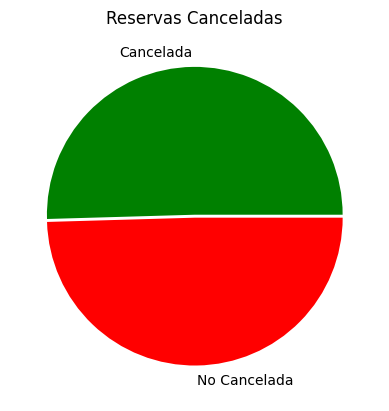

In [46]:
colors = ['green', 'red']
plt.pie(ds_hoteles_train_limpio["is_canceled_cat"].value_counts(), labels=ds_hoteles_train_limpio["is_canceled_cat"].value_counts().index, colors = colors, explode = (0.01, 0.01))
plt.title('Reservas Canceladas')
plt.show()

Tambien guardamos algunos datasets filtrados, por si estan cancelados o no las reservas y agregamos una columna de si esta cancelado de estilo categorica para poder utilizarlo en varios graficos

In [47]:
ds_reservas_canceladas = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio["is_canceled"] == 1]
ds_reservas_no_canceladas = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio["is_canceled"] == 0]
ds_hoteles_train_limpio["is_canceled"].value_counts()

1    30728
0    30169
Name: is_canceled, dtype: int64


---

# 1) Variable ADR

Esta variable nos dice la tarifa promedio por día de cada reserva. Nos da una idea del precio por día de alojamiento. Es una variable del tipo cuantitativa, por lo que procedemos a analizar sus medidas de resumen(media, mediana, moda, etc).

Como es de esperarse, esta variable contiene muchos valores posibles.

## Analisis y Visualizacion de datos

Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [48]:
columna_adr = ds_hoteles_train_limpio['adr']

columna_adr.describe()

count    60897.000000
mean       103.914204
std         46.480151
min          0.500000
25%         71.280000
50%         95.000000
75%        126.640000
max        510.000000
Name: adr, dtype: float64

Visualizamos estas medidas en un boxplot

Text(0.5, 1.0, 'Boxplot ADR')

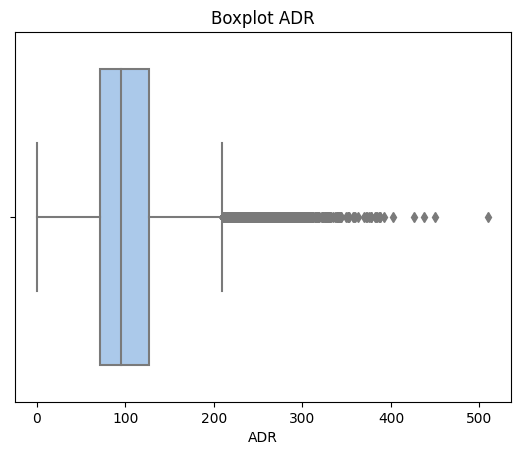

In [49]:
sns.boxplot(x = columna_adr, palette = "pastel")
plt.xlabel('ADR')

plt.title("Boxplot ADR")

Observamos que la gran mayoria de reservas tuvieron tarifas diarias que rondaron entre los 80 y 120 dólares, mientras que hay bastantes que superaban la barrera de los 200 dólares.

Nos interesa saber ahora si podemos encontrar algun dato de importancia para esas reservas que superaron los 200 dólares.

In [50]:
ds_adr_mayor_200 = ds_hoteles_train_limpio.loc[columna_adr > 200]
ds_adr_mayor_200.shape

(2574, 32)

Hay 2574 reservas que superaron una reserva diaria de 200, ahora vamos a ver la distribucion de esas reservas

In [51]:
ds_adr_mayor_200['adr'].describe()

count    2574.000000
mean      237.424433
std        33.566328
min       200.050000
25%       212.140000
50%       229.480000
75%       251.000000
max       510.000000
Name: adr, dtype: float64

Text(0.5, 0, 'ADR')

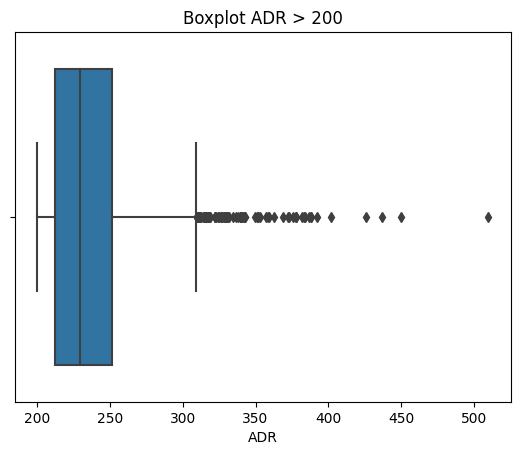

In [52]:
sns.boxplot(x = ds_adr_mayor_200["adr"])

plt.title("Boxplot ADR > 200")

plt.xlabel('ADR')

A estas reservas vamos a clasificarlas por el tipo de hotel

Text(0, 0.5, 'Tipo de hotel')

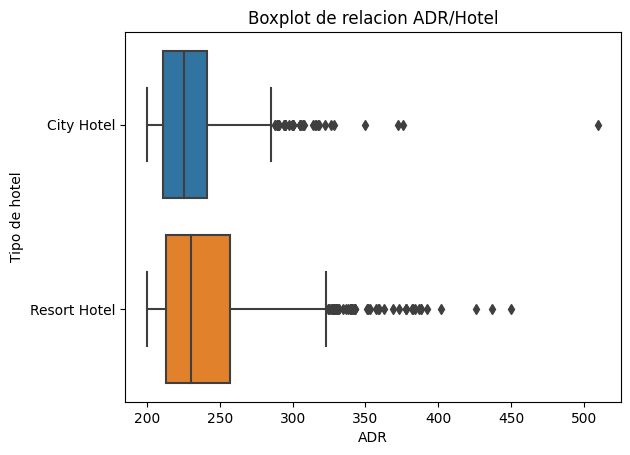

In [53]:
sns.boxplot(x = ds_adr_mayor_200["adr"], y = ds_adr_mayor_200["hotel"])

plt.title("Boxplot de relacion ADR/Hotel")

plt.xlabel('ADR')

plt.ylabel('Tipo de hotel')

Tomamos como conclusion que los hoteles del tipo Resort tuvieron reservas con ADR mas elevados en promedio que los del tipo City.

Vamos a partir de una hipotesis que nos puede dar un dato clave: ¿Qué relación hay entre las reservas que tuvieron un ADR mayor a 200 con las reservas canceladas?(suponiendo que al tener un valor elevado esto pudo haber generado más de una cancelación)

In [54]:
ds_adr_mayor_200['is_canceled'].value_counts()

1    1305
0    1269
Name: is_canceled, dtype: int64

Acordemosnos que, según la notación usada en el DataFrame, la variable is_canceled puede tomar dos valores: 1 si, finalmente la reserva fue cancelada y 0, si la reserva no fue cancelada.

([<matplotlib.axis.XTick at 0x7e6bef782fe0>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

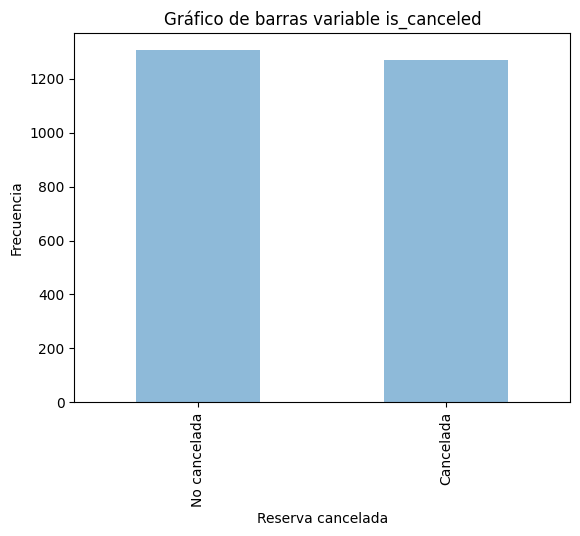

In [55]:
grf_ds= ds_adr_mayor_200['is_canceled'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable is_canceled" , xlabel="Reserva cancelada" , ylabel="Frecuencia")


plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Esto que obtuvimos tiene un valor muy grande: conseguimos ver que 1305 viajes con un adr mayor a 200 fueron cancelados.

Analizaremos el conjunto de datos donde el adr es menor que 200

In [56]:
ds_adr_menor_200 = ds_hoteles_train_limpio.loc[columna_adr < 200]
ds_adr_menor_200.shape

(58246, 32)

Existen 59261 reservas,por lo cual veremos como se comportan con las cancelaciones,lo que nos lleva a pensar en la posibilidad que a menor adr,las cancelaciones son mas concurrentes.
Vamos a ver la distribucion de esas reservas

In [57]:
ds_adr_menor_200['adr'].describe()

count    58246.000000
mean        97.887114
std         37.049930
min          0.500000
25%         70.000000
50%         93.500000
75%        120.700000
max        199.860000
Name: adr, dtype: float64

Text(0.5, 0, 'ADR')

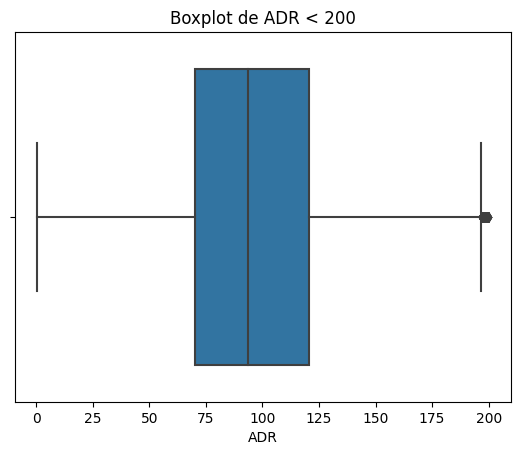

In [58]:
sns.boxplot(x = ds_adr_menor_200["adr"])


plt.title("Boxplot de ADR < 200")

plt.xlabel('ADR')

In [59]:
ds_adr_menor_200['is_canceled'].value_counts()

1    29374
0    28872
Name: is_canceled, dtype: int64

Podemos notar a simple vista que se comporta de la misma manera que el aquellas reserva con adr mayor a 200.


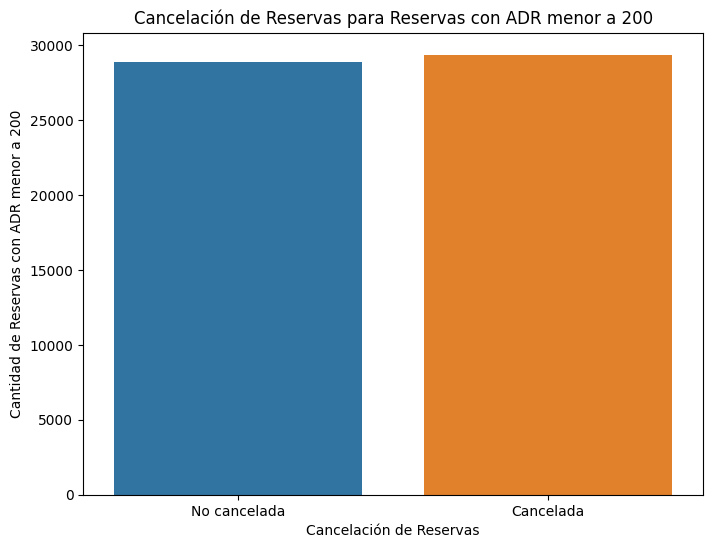

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adr_menor_200, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas con ADR menor a 200')
plt.title('Cancelación de Reservas para Reservas con ADR menor a 200')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

## Analisis de valores atipicos

Analicemos el boxplot

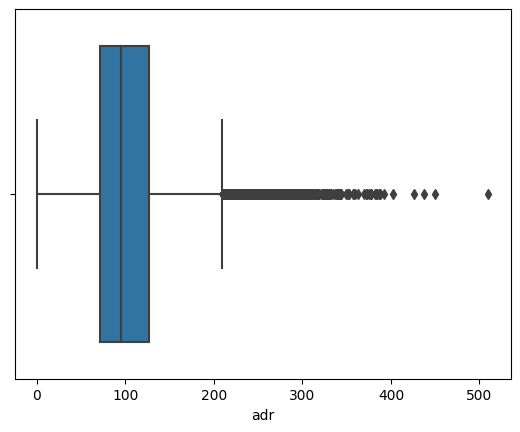

In [61]:
sns.boxplot(x=ds_hoteles_train_limpio["adr"])
plt.show()

Analicemos en forma univariada

In [62]:
# Supongamos que tienes un DataFrame llamado ds_hoteles_train_limpio con una columna llamada "adr"
# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["adr"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["adr"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifica los outliers en el DataFrame
outliers = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["adr"] < lower_limit) | (ds_hoteles_train_limpio["adr"] > upper_limit)]

upper_limit


209.68

El limite superior se encuentra en 209,por lo cual aquellos valores que se encuentran por arriba de ese valor son considerados outliers

In [63]:
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,-1,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,No Cancelada
111,City Hotel,194,2017,May,22,28,2,4,2,2.0,...,14.0,-1,0,Transient,227.25,0,0,82b00b95-2251-46b1-9fe0-5b8190e6139f,0,No Cancelada
171,City Hotel,132,2017,August,31,1,0,4,2,1.0,...,8.0,-1,0,Transient,209.70,0,0,04ce16fb-08e9-4881-a2a0-11bc89bf6067,1,Cancelada
173,Resort Hotel,157,2016,August,32,6,2,5,2,1.0,...,-1,-1,0,Transient,213.00,0,1,7a45af30-df59-4ee7-9f2f-6bad611f606a,1,Cancelada
217,City Hotel,22,2016,July,30,21,0,2,2,2.0,...,9.0,-1,0,Transient,240.00,0,1,1fc36f05-afce-4e05-b1d8-064efd387417,0,No Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61834,Resort Hotel,95,2017,July,30,24,1,4,2,2.0,...,240.0,-1,0,Transient,305.00,0,0,6dec4274-f4ec-4c4a-88fb-cb6b4878745a,1,Cancelada
61849,Resort Hotel,132,2017,August,32,12,2,1,2,0.0,...,240.0,-1,0,Transient,232.33,0,1,0758b6d9-defa-48af-a618-082f19782f3d,1,Cancelada
61871,Resort Hotel,94,2015,August,33,15,2,3,2,0.0,...,240.0,-1,0,Transient,233.00,0,0,6f193d24-56ad-42d9-80f6-96155f640105,0,No Cancelada
61889,City Hotel,4,2017,February,6,10,0,2,3,2.0,...,8.0,-1,0,Transient,263.00,0,0,c7981146-048c-4ec2-8c14-9df1ba8708af,1,Cancelada


2105 valores de ADR son valores atipicos,pero el contexto donde ADR puede tomar valores valores altos,por lo cual los dejaremos en el analisis,porque puede darnos alguna informacion de ello,ya que puede existir alguna correlacion con su cancelacion.

Veamos como se comportan los outliers mas severos del boxplot,es decir aquellos que su valor supera los 400

In [64]:
outliers_severos = ds_hoteles_train_limpio[ (ds_hoteles_train_limpio["adr"] > 400)]

outliers_severos

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
8690,Resort Hotel,31,2017,August,31,1,2,6,2,2.0,...,250.0,-1,0,Transient,426.25,0,2,ccc86404-4867-4942-b984-b0a0a56451be,0,No Cancelada
50240,Resort Hotel,378,2017,August,31,1,4,10,2,0.0,...,314.0,-1,0,Transient,450.00,0,0,3342817f-3e59-40a4-8b8a-8a7ba49e3184,1,Cancelada
54002,Resort Hotel,59,2017,August,33,13,2,4,2,2.0,...,250.0,-1,0,Transient,437.00,0,0,f4678f81-0634-4705-95fb-84262ace90fc,1,Cancelada
55460,City Hotel,0,2017,May,19,9,0,1,1,0.0,...,159.0,-1,0,Transient,510.00,0,0,fe474061-f3b2-4e15-8ba0-672366ab7ef1,0,No Cancelada
60071,Resort Hotel,104,2017,August,33,17,2,3,3,1.0,...,240.0,-1,0,Transient,402.00,0,1,7948179b-85f7-4764-ae7e-3647bf1693f8,0,No Cancelada


In [65]:
outliers_severos['is_canceled'].value_counts()

0    3
1    2
Name: is_canceled, dtype: int64

Podemos notar que se no existe ninguna tendencia a cancelacion de a mayor precio,mayor o menor probabilidad de cancelar,por lo cual ,podrian borrarse del analisis ya que no aportan nada y distorsionan al dataset

---

# 2, 3, 4) Variables Adults, Children y Babies
Estas variables del tipo cuantitativas las analizamos juntas para ver si podemos encontrar algún patrón para las reservas con muchas personas(quizás conformadas por grupos familiares), viendo también la cantidad de adultos, niños y bebés que tuvieron las mismas.

## Adults
Es una variable del tipo cuantitativas, son numeros enteros que representar la cantidad de adultos estan registrados en la reserva

In [66]:
columna_adults = ds_hoteles_train_limpio['adults']
columna_adults.value_counts()

2    46563
1    11152
3     3153
4       29
Name: adults, dtype: int64

Podemos observar que la gran mayoría de reservas tienen 2 adultos, mientras que hay muy pocas que tienen más de 10 adultos.

### Analisis Profundo y Visualizacion de los datos
Analicemos mas a fondo esta variable

Text(0, 0.5, 'Cantidad de reservas')

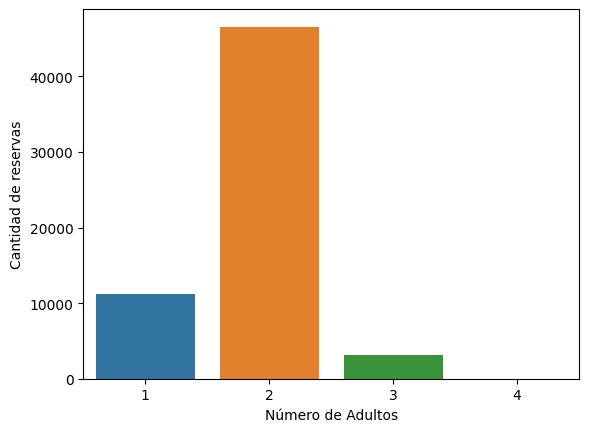

In [67]:
sns.countplot(data=ds_hoteles_train_limpio, x="adults")
plt.xlabel("Número de Adultos")
plt.ylabel("Cantidad de reservas")

Para visualizar mejor los datos, separaremos en 2 grupos:


*   Reservas con 1 a 2 adultos(mayor recurrencia en el dataset)
*   Reservas restantes(menor recurrencia en el dataset)






Comencemos con el primer grupo

In [68]:
ds_adultos_mas_recurrentes = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['adults'] >= 1) & (ds_hoteles_train_limpio['adults'] <= 2)]

ds_adultos_mas_recurrentes['is_canceled'].value_counts()

1    29232
0    28483
Name: is_canceled, dtype: int64

Hay alrededor de 60000 reservas con estos valores para la variable adults

Veamos en un gráfico la relación entre estas reservas con valores recurrentes de adultos con la variable target is_canceled


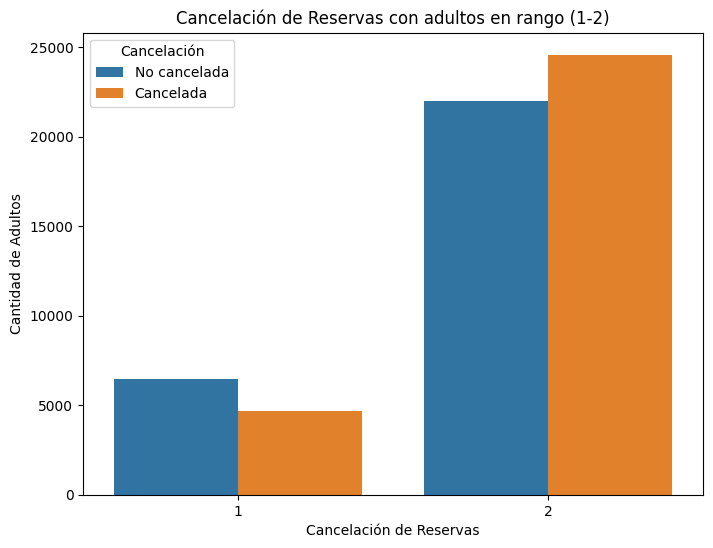

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adultos_mas_recurrentes, x='adults' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Adultos')
plt.title('Cancelación de Reservas con adultos en rango (1-2)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Para reservas con 2 adultos, predominan la cancelacion, mientras que para reservas con 1 adulto ,la reservas sin cancelaciones son mayorias. Podemos concluir entonces que para estos valores de la variable adults la mitad de los viajes van a ser cancelados.

In [70]:
ds_adultos_menos_recurrentes = ds_hoteles_train_limpio[ds_hoteles_train_limpio['adults'] >= 3]
ds_adultos_menos_recurrentes['is_canceled'].value_counts()

0    1686
1    1496
Name: is_canceled, dtype: int64

Hay alrededor de 3000 reservas con estos valores para la variable adults

Veamos en un gráfico la relación entre estas reservas con valores atípicos de adultos con la variable target is_canceled


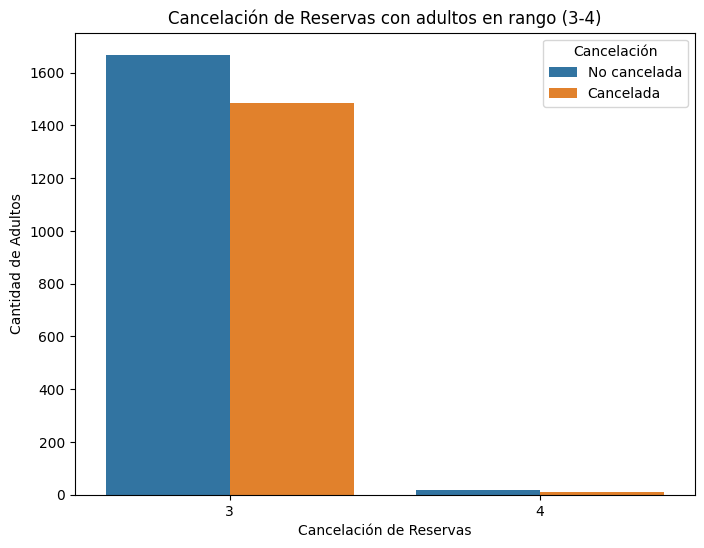

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_adultos_menos_recurrentes, x='adults' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Adultos')
plt.title('Cancelación de Reservas con adultos en rango (3-4)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Observamos que no se encuantra una fuerte relacion de cancelacion-cantidad de adultos a simple vista

### Analisis de valores atipicos

Analicemos el boxplot

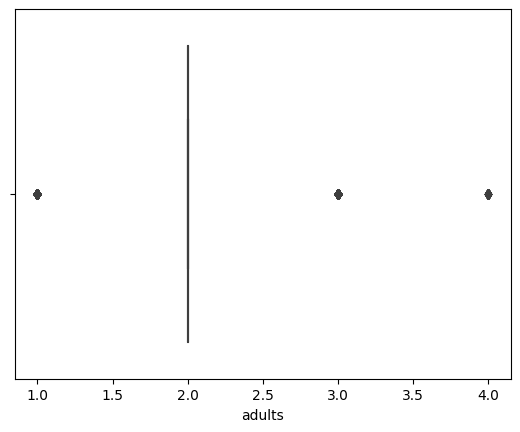

In [72]:
sns.boxplot(x=ds_hoteles_train_limpio["adults"])
plt.show()

Podemos notar de forma que los valores se ditribuyen en su mayoria ,siendo dos la cantidad de adultos mas recurrente,pero estos otros valores posibles (1 3 y 4) no son valores que en su contexto no sean posibles

Vamos a visualziar ya que no tenemos mucho para decir de manera univariada,que pasa si vemos como se comporta con el ADR

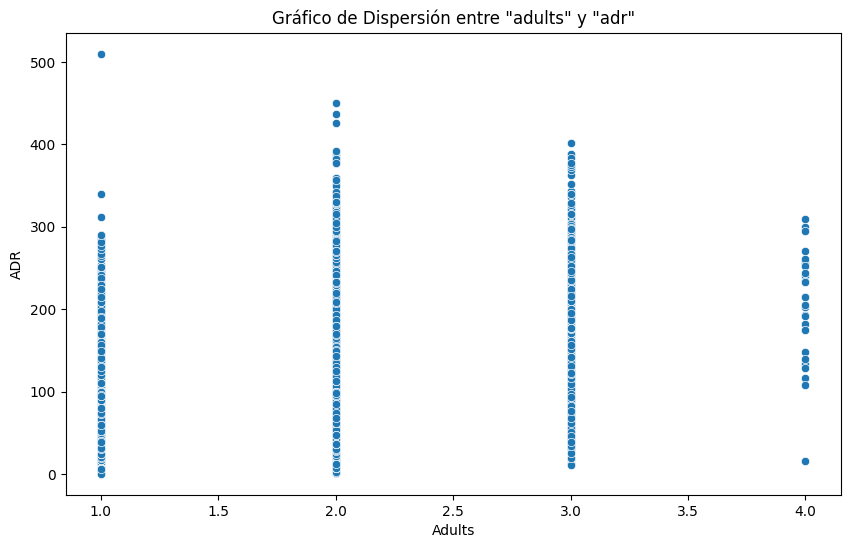

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds_hoteles_train_limpio, x='adults', y='adr')
plt.title('Gráfico de Dispersión entre "adults" y "adr"')
plt.xlabel('Adults')
plt.ylabel('ADR')
plt.show()

Podemos notar de forma visual,que para reservas de un adulto tenemos una que tiene el ADR mas grande posible,lo cual es considerado un outlier porque lo esperado es que ese precio lo paguen entre mas adultos.
A su vez para reservas con 4 adultos,existe un caso que representa de las reservas mas baratas para su cantidad de personas,lo cual nos genera ruido su lejania con los otros casos

En estos casos,decidira de no tener en cuenta estos casos para luego nuestro modelo predictivo


---
## Variable Children
Variable cuantitativa que representa la cantidad de niños que estan presente en la reserva

### Analisis de datos y Visualizaciones
Hay 4452 reservas que tuvieron niños.

Text(0, 0.5, 'Cantidad de reservas')

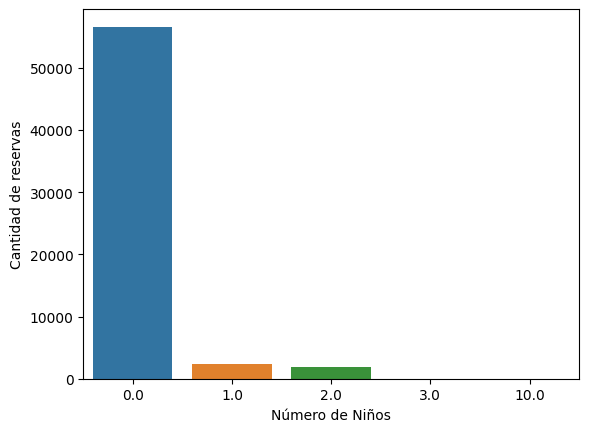

In [74]:
sns.countplot(data=ds_hoteles_train_limpio, x="children")
plt.xlabel("Número de Niños")
plt.ylabel("Cantidad de reservas")

Para visualizar mejor los datos,separaremos en 2 grupos:


*   Reservas sin niños(mayor recurrencia en el dataset)
*   Reservas con niños(menor recurrencia en el dataset)


Comenzemos con el primer grupo

In [75]:
ds_reservas_sin_niños= ds_hoteles_train_limpio.loc[columna_children == 0]
ds_reservas_sin_niños['is_canceled'].value_counts()

1    28585
0    28013
Name: is_canceled, dtype: int64

Veamos en un grafico

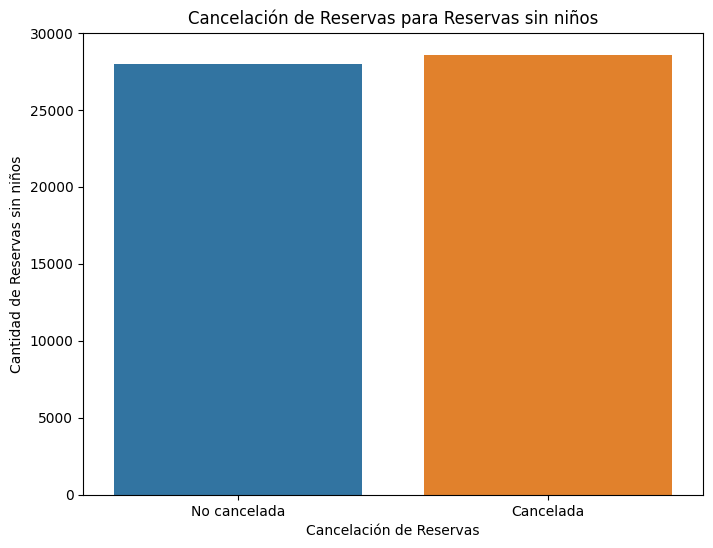

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_niños, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin niños')
plt.title('Cancelación de Reservas para Reservas sin niños')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos concluir entonces que para estos valores de la variable children la mitad de los viajes fueron cancelados.

Analicemos el proximo grupo

In [77]:
ds_reservas_con_niños= ds_hoteles_train_limpio.loc[columna_children > 0]


ds_reservas_con_niños['is_canceled'].value_counts()

0    2156
1    2139
Name: is_canceled, dtype: int64

Veamos en un grafico

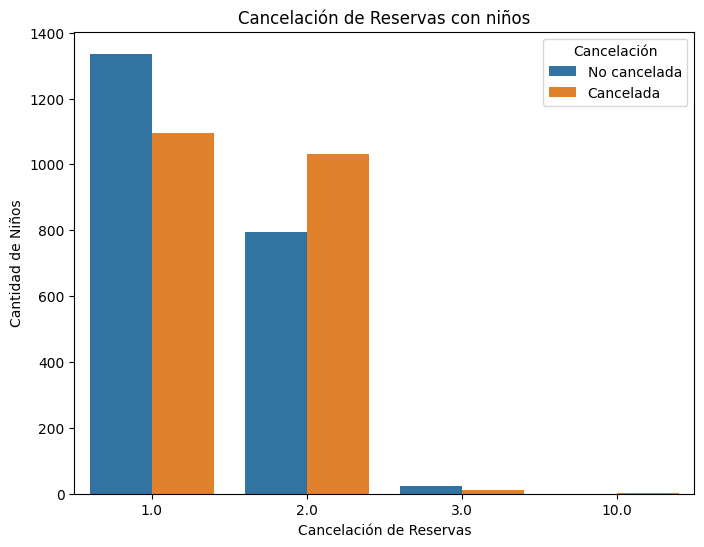

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_niños, x='children' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Niños')
plt.title('Cancelación de Reservas con niños')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Observamos que las reservas con 2 niños  han sido mas predominantes las canceladas. Mientras que en los otros valores nos indican que predominan las reservas no canceladas




### Analisis de valores atipicos

Analicemos el boxplot

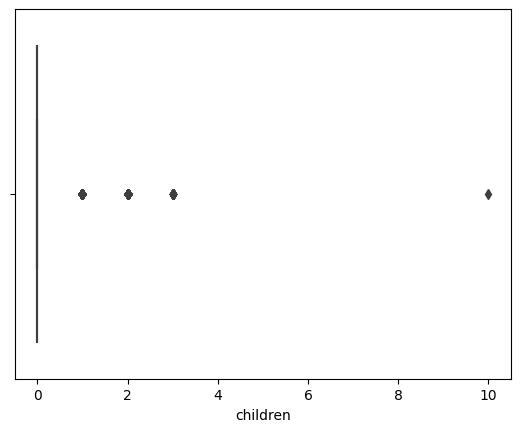

In [79]:
sns.boxplot(x=ds_hoteles_train_limpio["children"])
plt.show()

Podemos notar de forma que los valores se ditribuyen en su mayoria ,que las reservs no tengan niños,mientras que hay casos con otros valores posibles que son posibles.
Pero nos llama la atencion el caso de 10 niños,voy a analizar ese caso

In [80]:
outlier_niño = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["children"] > 9)]

outlier_niño

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
49181,Resort Hotel,55,2015,July,29,12,4,10,2,10.0,...,8.0,-1,0,Contract,133.16,0,1,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1,Cancelada


Podemos notar que tiene asociado 2 adultos y su reserva fue cancelada,decidiremos considerarla en el analisis ya que no afecta a la variable su presencia



---
## Variable Babies
Variable cuantitativa que indica la cantidad de bebes registrados en la reserva

### Limpieza de datos

In [81]:
columna_babies = ds_hoteles_train_limpio['babies']
columna_babies.value_counts()

0    60481
1      408
2        7
9        1
Name: babies, dtype: int64

In [82]:
columna_babies.loc[columna_babies > 0].value_counts().sum()

416

In [83]:
columna_babies.isna().sum()

0

### Analisis y visualizacion de datos
Hay 428 reservas que tuvieron bebés a bordo.


Para visualizar mejor los datos,separaremos en 2 grupos:


*   Reservas sin bebés(mayor recurrencia en el dataset)
*   Reservas con bebés(menor recurrencia en el dataset)


Comencemos con el primer grupo

In [84]:
ds_reservas_sin_bebes = ds_hoteles_train_limpio.loc[columna_babies == 0]
ds_reservas_sin_bebes['is_canceled'].value_counts()

1    30602
0    29879
Name: is_canceled, dtype: int64

Veamos en un grafico

([<matplotlib.axis.XTick at 0x7e6beeaacee0>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

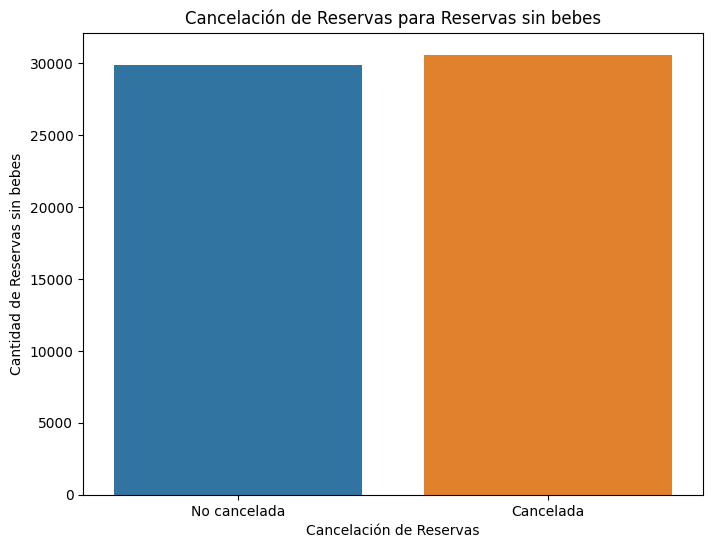

In [85]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_bebes, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin bebes')
plt.title('Cancelación de Reservas para Reservas sin bebes')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Podemos concluir entonces que para estos valores de la variable babies la mitad de los viajes fueron cancelados.

Ahora continuamos con el otro grupo

In [86]:
ds_reservas_con_bebes = ds_hoteles_train_limpio.loc[columna_babies > 0]
ds_reservas_con_bebes['is_canceled'].value_counts()

0    290
1    126
Name: is_canceled, dtype: int64

Veamos como se distribuye

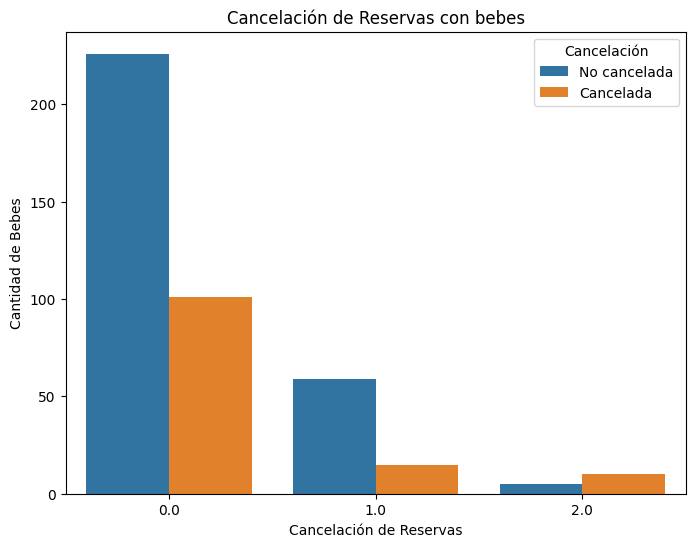

In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_bebes, x='children' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Bebes')
plt.title('Cancelación de Reservas con bebes')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()


Observamos que las reservas con 2 bebes han sido mas predominantes las canceladas. Mientras que en los otros valores nos indican que predominan las reservas no canceladas


### Analisis de valores atipicos

Analicemos el boxplot

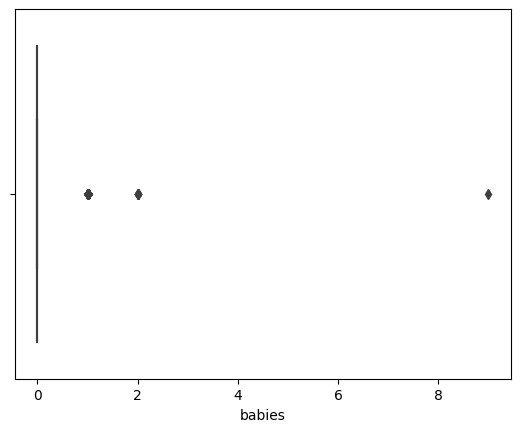

In [88]:
sns.boxplot(x=ds_hoteles_train_limpio["babies"])
plt.show()

Podemos notar de forma que los valores se ditribuyen en su mayoria ,que las reservs no tengan bebes,mientras que hay casos con otros valores posibles que son posibles.
Pero nos llama la atencion el caso de 9 bebes,voy a analizar ese caso

In [89]:
outlier_bebe = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["babies"] > 8)]

outlier_bebe

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
12659,City Hotel,11,2015,October,42,11,2,1,1,0.0,...,95.0,-1,0,Transient-Party,95.0,0,0,a864cf91-980a-48da-9b71-c0b487096239,0,No Cancelada


Este caso nos genera mucha intriga,ya que es una reserva con un unico adulto y 9 bebes,lo cual podriamos interpretar que no tiene sentido utilizar para predecir nuestros resultados

# 5) Variable Agent
Es una variable de tipo cualitativa, que expresa el ID de la agencia de viajes que realizó la reserva.

## Analisis y visualizacion de datos
Miremos ahora el top 10 de agentes con más reservas asignadas, ya que, cuando vimos los valores que la variable podía tomar habían más de 296 IDs.

<Axes: title={'center': 'Top 10 agentes con mayores reservas'}>

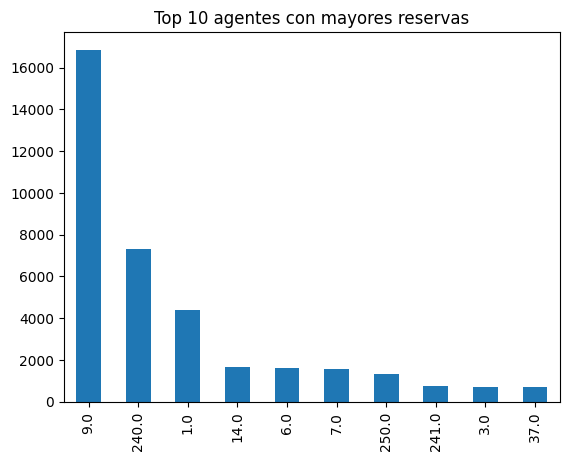

In [90]:
ds_filtrado_sin_agentes_invalidos = ds_hoteles_train_limpio[ds_hoteles_train_limpio['agent'] != '-1']

top_10_agents = (ds_filtrado_sin_agentes_invalidos['agent'].value_counts()).iloc[:10]

top_10_agents.plot(kind='bar', title='Top 10 agentes con mayores reservas')

Vemos que, por amplia diferencia, el agente con ID de 9.0 es la que mayor cantidad de reservas recibió.

Obtengamos los ID de las agencias con mayor cantidad de reservas canceladas y las que no

In [91]:
cancelaciones_por_agencia = ds_filtrado_sin_agentes_invalidos.groupby('agent')['is_canceled'].sum().reset_index()
cancelaciones_por_agencia = cancelaciones_por_agencia.sort_values(by='is_canceled', ascending=False)

Con respecto a las mas canceladas

In [92]:
agencias_mas_cancelaciones = cancelaciones_por_agencia.head(10)
agencias_mas_cancelaciones

,agent,is_canceled
8,9.0,9240
159,240.0,3877
0,1.0,3663
5,6.0,687
17,19.0,554
2,3.0,527
35,37.0,505
13,14.0,432
19,21.0,379
27,29.0,363


Visualizamos en un gráfico el top 10 de agentes con más cancelaciones de viajes

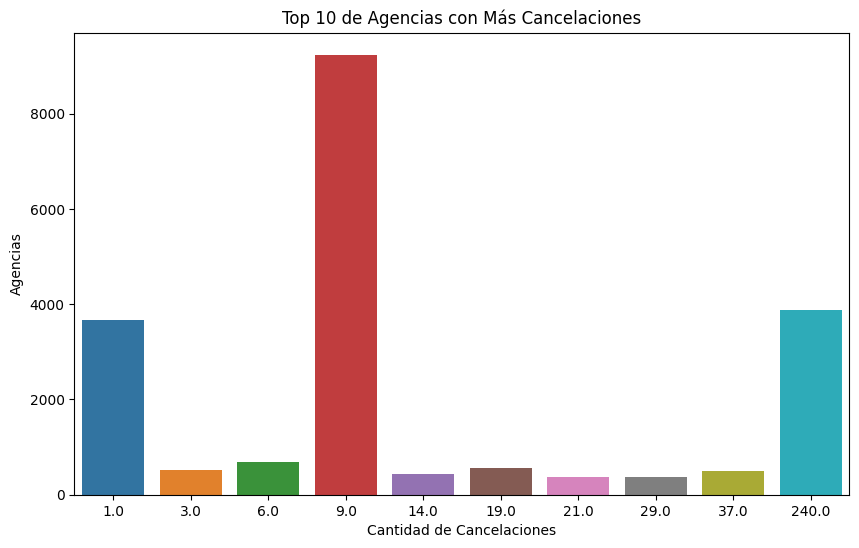

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(data=agencias_mas_cancelaciones, x='agent', y='is_canceled')
plt.xlabel('Cantidad de Cancelaciones')
plt.ylabel('Agencias')
plt.title('Top 10 de Agencias con Más Cancelaciones')

plt.show()

Podemos declinarnos a pensar que las reservas asociadas a ese agente pueden tener mayor posibilidad de cancelarse,mientras que las restantes podrian tener mayor posibilidad de no cancelarse


Veamos la relación de esta variable con el target

In [94]:
tasa_cancelacion_por_agencia = ds_filtrado_sin_agentes_invalidos.groupby("agent")["is_canceled"].mean() * 100

tasa_cancelacion_por_agencia = tasa_cancelacion_por_agencia.reset_index()

tasa_cancelacion_por_agencia = tasa_cancelacion_por_agencia.sort_values(by="is_canceled", ascending=False)
tasa_cancelacion_por_agencia

,agent,is_canceled
134,182.0,100.0
131,179.0,100.0
158,236.0,100.0
157,235.0,100.0
174,257.0,100.0
...,...,...
22,24.0,0.0
191,289.0,0.0
190,288.0,0.0
23,25.0,0.0


In [95]:
media_tasa_cancelacion = tasa_cancelacion_por_agencia["is_canceled"].mean()

print("La media de la tasa de cancelación entre todas las agencias es:", media_tasa_cancelacion)

La media de la tasa de cancelación entre todas las agencias es: 34.78373825192489


Las agencias con tasas de cancelación más altas tienden a tener una propensión mayor a cancelar reservas en comparación con las agencias con tasas más bajas,por lo cual lo considero un variable muy importante para el analisis



---

# 6, 7, 8, 9) Variables arrival Date, Week, Month and Year




## Variable Arrival Date

Esta es una variable cuantitativa, y como su nombre indica, hace referencia al día del mes de la fecha de llegada.

### Limpieza de datos
Vemos todos los valores posibles que puede llegar a tomar la columna y si tiene valores invalidos cargados

In [96]:
columna_arrival_date = ds_hoteles_train_limpio['arrival_date_day_of_month']
columna_arrival_date.value_counts()

17    2266
5     2233
15    2159
16    2146
9     2132
26    2118
25    2088
12    2086
28    2050
2     2049
19    2044
20    2044
24    2022
8     2022
30    2003
18    2003
3     1999
27    1975
14    1974
6     1936
7     1916
4     1906
13    1877
1     1875
22    1857
21    1854
29    1824
23    1817
10    1776
11    1743
31    1103
Name: arrival_date_day_of_month, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles.Veamos si contiene valores faltantes

In [97]:
columna_arrival_date.isna().sum()

0

sta variable no tiene ningun valor faltante. Ahora revisamos que esten dentro de un rango valido, desde el dia 1 del mes, principio de mes, hasta el dia 31, de fin de mes

In [98]:
columna_arrival_date.between(1,31).value_counts()

True    60897
Name: arrival_date_day_of_month, dtype: int64

Vemos que todos los valores estan dentro de un rango valido de dias por lo que podemos continuar con nuestro analisis


### Analisis y Visualizacion de datos
Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [99]:
columna_arrival_date.describe()

count    60897.000000
mean        15.788052
std          8.795422
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

Visualicemos en un boxplot los datos

Text(0.5, 1.0, 'Boxplot Arrival Date Day Of Month')

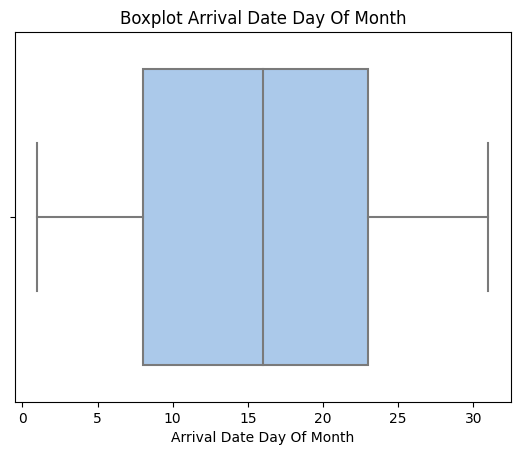

In [100]:
sns.boxplot(x = columna_arrival_date, palette = "pastel")
plt.xlabel('Arrival Date Day Of Month')

plt.title("Boxplot Arrival Date Day Of Month")

Podemos notar que la distribucion ,nos presenta que no existe ningun valor mal cargado,ni fuera de los rangos posibles de dias del mes.

Text(0, 0.5, 'Cantidad de reservas')

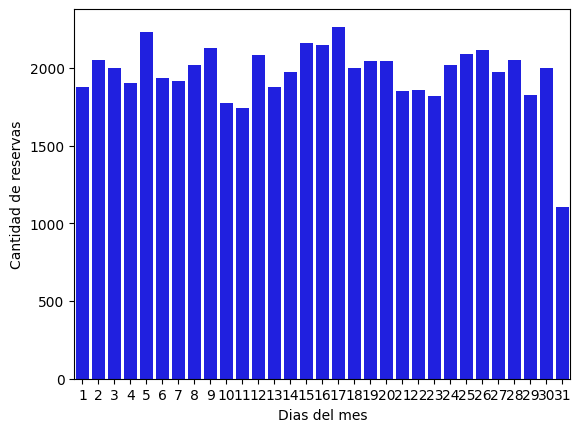

In [101]:
sns.countplot(data=ds_hoteles_train_limpio, x="arrival_date_day_of_month",color= 'blue')
plt.xlabel("Dias del mes")
plt.ylabel("Cantidad de reservas")

Veamos que dias son los que tienen mas cancelaciones asociadas

In [102]:
cancelaciones_por_dia = ds_hoteles_train_limpio.groupby('arrival_date_day_of_month')['is_canceled'].sum().reset_index()
cancelaciones_por_dia = cancelaciones_por_dia.sort_values(by='is_canceled', ascending=False)

dias_con_mas_cancelaciones = cancelaciones_por_dia.head(5)
dias_con_mas_cancelaciones

,arrival_date_day_of_month,is_canceled
16,17,1285
4,5,1167
14,15,1155
25,26,1148
7,8,1142


Podemos notar que los dias que mas cancelaciones tuvieron estan dispersos en todo su rango,tanto dias del principio hasta el final de mes


---
## Variable  ArrivalDateMonth

Esta es una variable cualitativa(categorica), y como su nombre indica, hace referencia al mes de la fecha de llegada.


Veamos como se distribuyen ,para poder comenzar un analisis


### Limpieza de datos

In [103]:
columna_arrival_date_month = ds_hoteles_train_limpio['arrival_date_month']
columna_arrival_date_month.value_counts()

August       7083
July         6426
May          6061
April        5813
October      5743
June         5706
September    5542
March        4824
February     4052
December     3384
November     3330
January      2933
Name: arrival_date_month, dtype: int64

Veamos si contiene valores faltantes

In [104]:
columna_arrival_date_month.isna().sum()

0

No hay valores nulos por lo cual podemos continuar con nuestro analisis

### Analisis y Visualizacion de graficos
Veamos estos datos en un grafico para poder notar las distribuciones

<Axes: title={'center': 'Meses con cantidad de reservas'}>

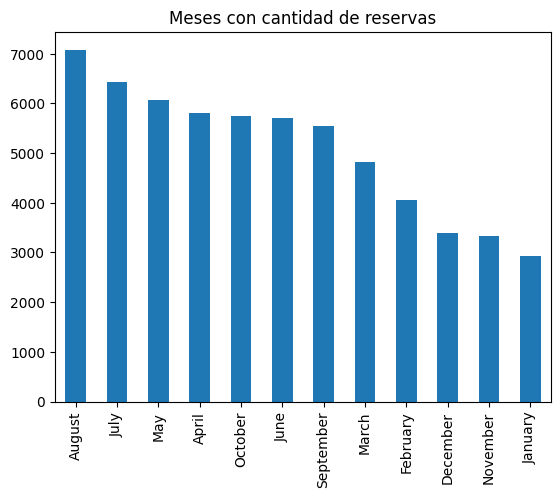

In [105]:
ds_hoteles_train_limpio['arrival_date_month'].value_counts().plot(kind='bar', title='Meses con cantidad de reservas')

Dado que no tiene ningun dato faltante,y los datos estan dentro de lo esperado,veamos los paises con mayor cancelacion de reservas

In [106]:
cancelaciones_por_mes = ds_hoteles_train_limpio.groupby('arrival_date_month')['is_canceled'].sum().reset_index()
cancelaciones_por_mes = cancelaciones_por_mes.sort_values(by='is_canceled', ascending=False)

cancelaciones_por_mes

,arrival_date_month,is_canceled
1,August,3598
5,July,3317
8,May,3245
6,June,3155
0,April,3107
10,October,2938
11,September,2889
7,March,2199
3,February,1877
2,December,1675


Podemos notar como los datos obtenidos de los meses con mayor cantidad de reservas,se asemejan en gran parte a los meses con mayor reservas canceladas

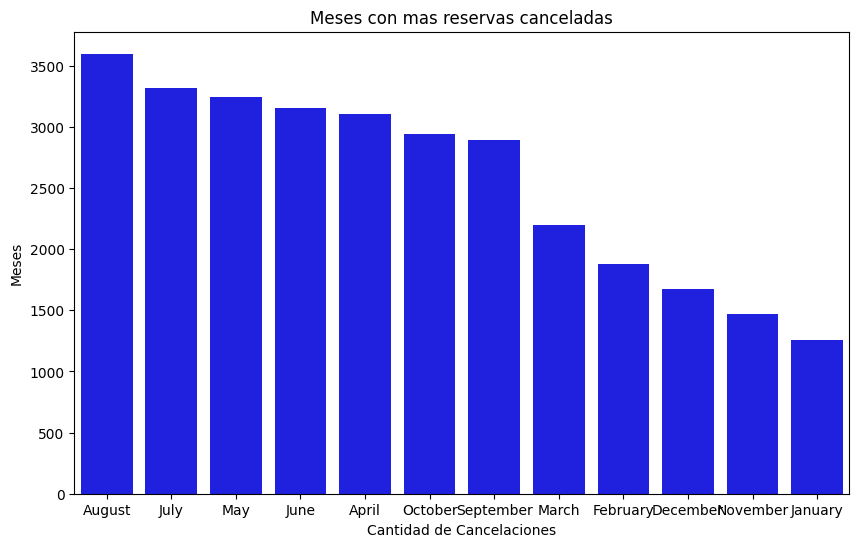

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cancelaciones_por_mes, x='arrival_date_month', y='is_canceled', color='blue')
plt.xlabel('Cantidad de Cancelaciones')
plt.ylabel('Meses')
plt.title('Meses con mas reservas canceladas')

plt.show()

Por ultimo,analizemos que meses tienen mayor tasa de cancelacion,ya que odemos declinarnos a pensar que las reservas asociadas a los meses con mas cancelaciones tienden a cancelar mas;por lo cual ,veamos la tasa de cancelacion por mes

In [108]:
tasa_cancelacion_por_mes = ds_hoteles_train_limpio.groupby("arrival_date_month")["is_canceled"].mean() * 100

tasa_cancelacion_por_mes = tasa_cancelacion_por_mes.reset_index()

tasa_cancelacion_por_mes = tasa_cancelacion_por_mes.sort_values(by="is_canceled", ascending=False)
tasa_cancelacion_por_mes

,arrival_date_month,is_canceled
6,June,55.292674
8,May,53.539020
0,April,53.449166
11,September,52.129195
5,July,51.618425
10,October,51.157931
1,August,50.797685
2,December,49.497636
3,February,46.322804
7,March,45.584577


In [109]:
media_tasa_cancelacion_mes = tasa_cancelacion_por_mes["is_canceled"].mean()

print("La media de la tasa de cancelación entre todos los meses es:", media_tasa_cancelacion_mes)

La media de la tasa de cancelación entre todos los meses es: 49.70170250116234


Los con tasas de cancelación más altas(June,April..) tienden a tener una propensión mayor a cancelar reservas en comparación con los meses con tasas más bajas(January,November,...),por lo cual puede ser de gran importancia al momento de entrenar al modelo



---
## Variable ArrivalDateWeekNumber
Es una variable cuanitativa,representa el número de semana de la fecha de llegada.

### Analisis y Visualizacion de datos
Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [110]:
columna_arrival_date_week= ds_hoteles_train_limpio['arrival_date_week_number']

columna_arrival_date_week.describe()

count    60897.000000
mean        27.176380
std         13.468735
min          1.000000
25%         16.000000
50%         28.000000
75%         38.000000
max         52.000000
Name: arrival_date_week_number, dtype: float64

Veamos estos valores en un boxplot

Text(0.5, 1.0, 'Boxplot Arrival Date Week')

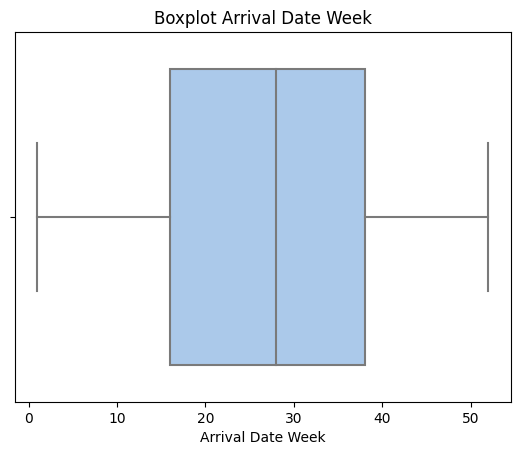

In [111]:
sns.boxplot(x = columna_arrival_date_week, palette = "pastel")
plt.xlabel('Arrival Date Week')

plt.title("Boxplot Arrival Date Week")



---
## Variable ArrivalDateYear
Es una variable cuantitativa,que refiere al año de la llegada en la reserva

### Limpieza de datos
Comenzamos por la cantidad de valores posibles que puede tomar y si hay valores nulos

In [112]:
columna_arrival_date_year = ds_hoteles_train_limpio['arrival_date_year']
columna_arrival_date_year.value_counts()

2016    28883
2017    20808
2015    11206
Name: arrival_date_year, dtype: int64

Notamos que solo existen 3 posibles años de analisis,por lo cual antes de seguir con el analisis,veamos si tiene algun valor faltante

In [113]:
columna_arrival_date_year.isna().sum()

0

### Analisis y Visualizacion de datos
Ya que no existe ningun valor faltante,veamos como las cancelaciones se distribuyen en los distintos años

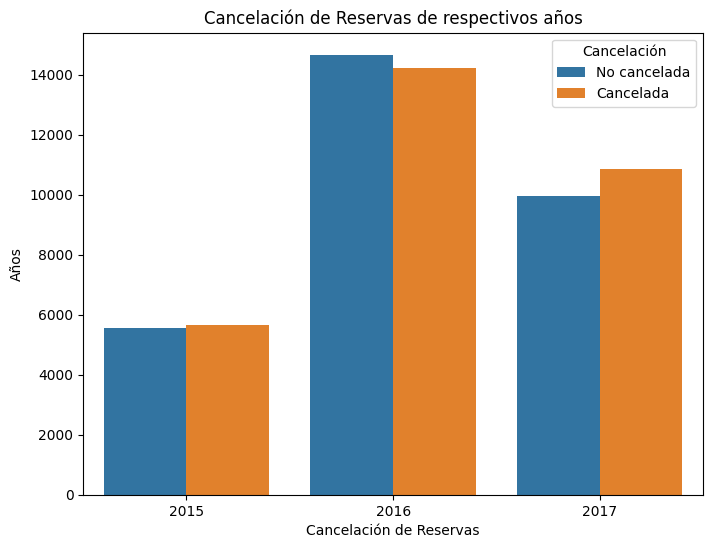

In [114]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='arrival_date_year' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Años')
plt.title('Cancelación de Reservas de respectivos años')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

# 10) Variable AssignedRoomType

## Limpieza de datos
Comenzamos por ver todos los valores posibles que puede tomar esta variable y si hay valores sin cargar

In [115]:
columna_room_type = ds_hoteles_train_limpio['assigned_room_type']

columna_room_type.value_counts()

A    39582
D    12055
E     3723
F     1765
G     1234
C     1104
B      933
H      380
K       60
I       60
L        1
Name: assigned_room_type, dtype: int64

Al parecer, esta variable toma valores de caracteres.

Veamos si tiene datos faltantes

In [116]:
columna_room_type.isna().sum()

0

No tenemos datos faltantes para esta variable.

## Analisis y Visualizacion de datos
Observemos en un gráfico cómo se distribuyen los valores que toma la variable.

<Axes: title={'center': 'Cantidad de reservas según el tipo de habitación asignado'}>

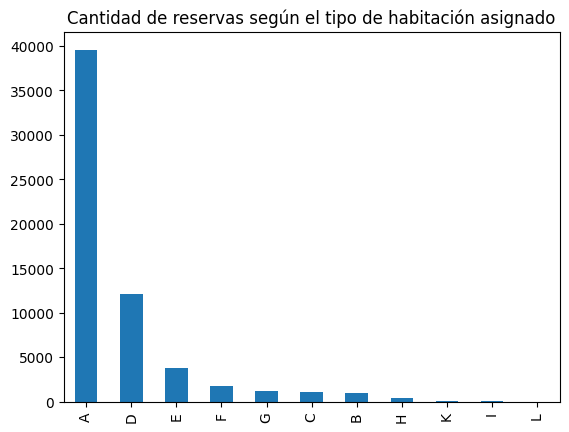

In [117]:
room_type_graph = (ds_hoteles_train_limpio['assigned_room_type'].value_counts())

room_type_graph.plot(kind='bar', title='Cantidad de reservas según el tipo de habitación asignado')

Vemos que por mucha diferencia el tipo de habitación A es el más frecuente para esta variable.

# 11) Variable Booking Changes
Es una variable que describe el número de cambios/enmiendas realizadas a la reserva desde el momento en que la reserva se introdujo en el PMS hasta el momento del check-in o cancelación

## Limpeza de datos
Comenzamos viendo los valores que toma esta variable y ver si toma valores nulos y si estan dentro de un rango valido

In [118]:
columna_booking_changes = ds_hoteles_train_limpio['booking_changes']
columna_booking_changes.value_counts()

0     52838
1      5645
2      1747
3       391
4       158
5        55
6        30
7        14
8         7
10        3
13        2
9         2
14        2
12        1
15        1
17        1
Name: booking_changes, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles, asi que vamos a ver si para esta variable hay datos faltantes en un principio

In [119]:
columna_booking_changes.isna().sum()

0

In [120]:
(columna_booking_changes >= 0).value_counts()

True    60897
Name: booking_changes, dtype: int64

Esta variable no tiene datos faltantes, esto nos beneficia a la hora de hacer nuestro análisis.

## Analisis y Visualizacion
Ahora,dado que es una variable cuantitativa, veremos las medidas de resumen, como la media, mediana, moda, etc..

In [121]:
columna_booking_changes.describe()

count    60897.000000
mean         0.192111
std          0.599301
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

Veo que predominan las reservas que no tuvieron ningun cambio,pero veamos aquellas que si tuvieron


In [122]:
ds_reservas_con_cambios = ds_hoteles_train_limpio.loc[columna_booking_changes > 0]
ds_reservas_con_cambios['booking_changes'].describe()

count    8059.000000
mean        1.451669
std         0.941047
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: booking_changes, dtype: float64

Lo visualizo en un bloxplot

Text(0.5, 1.0, 'Boxplot de la variable booking_changes')

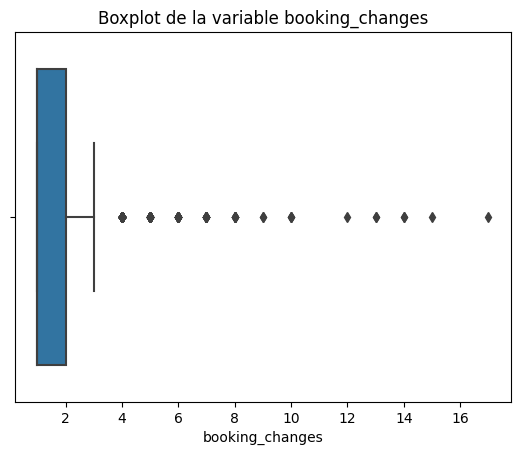

In [123]:
sns.boxplot(x = ds_reservas_con_cambios['booking_changes'])
plt.title("Boxplot de la variable booking_changes")

Observamos que la mayoría de reservas tienen de 0 a 2 cambios en las mismas, mientras que tenemos algunas reservas con más de 3 cambios

Veamos la relacion con is_canceled

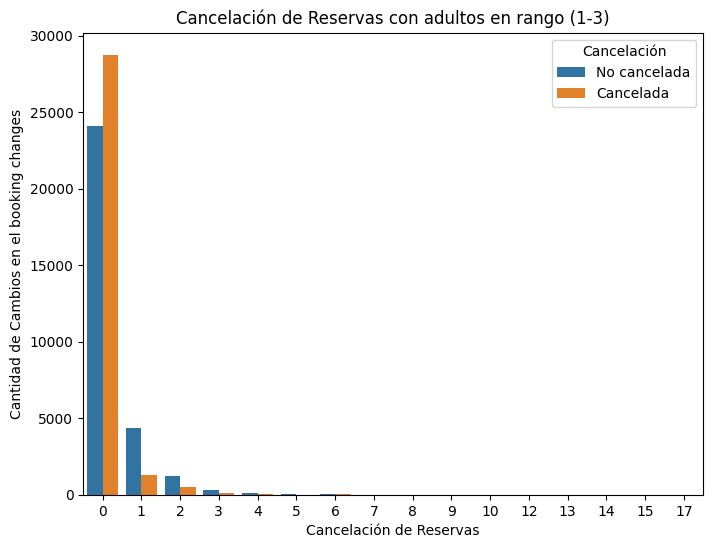

In [124]:

plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Cambios en el booking changes')
plt.title('Cancelación de Reservas con adultos en rango (1-3)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()


Para poder comprender y visualizar mejor el grafico,vamos a separarlo en 3 grupos


*   Reservas sin cambios
*  Reservas que tienen entre 1 y 4 cambios
*   Reservas con mas de 4 cambios



---

Vamos a comenzar con las reservas sin cambios



In [125]:
ds_reservas_sin_cambios = ds_hoteles_train_limpio.loc[columna_booking_changes == 0]
ds_reservas_sin_cambios['is_canceled'].value_counts()

1    28760
0    24078
Name: is_canceled, dtype: int64

Veamos en un gráfico la relación entre estas reservas csin cambios con la variable target is_canceled


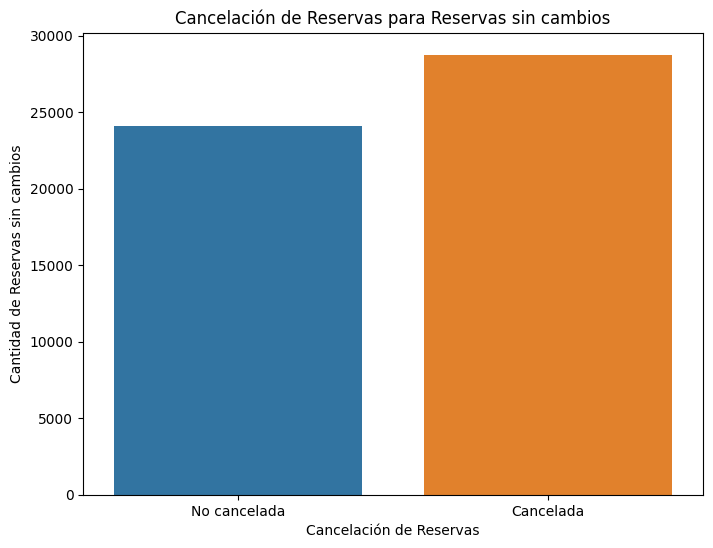

In [126]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_sin_cambios, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas sin cambios')
plt.title('Cancelación de Reservas para Reservas sin cambios')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar como las cancelaciones son mas concurrentes ,por lo cual puede ser un indicio importante para el analisis


---

Veamos el siguiente grupo

In [127]:
ds_reservas_con_1_a_3_cambios = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['booking_changes'] >= 1) & (ds_hoteles_train_limpio['booking_changes'] <= 3)]
ds_reservas_con_1_a_3_cambios['is_canceled'].value_counts()

0    5901
1    1882
Name: is_canceled, dtype: int64

Grafiquemos los valores

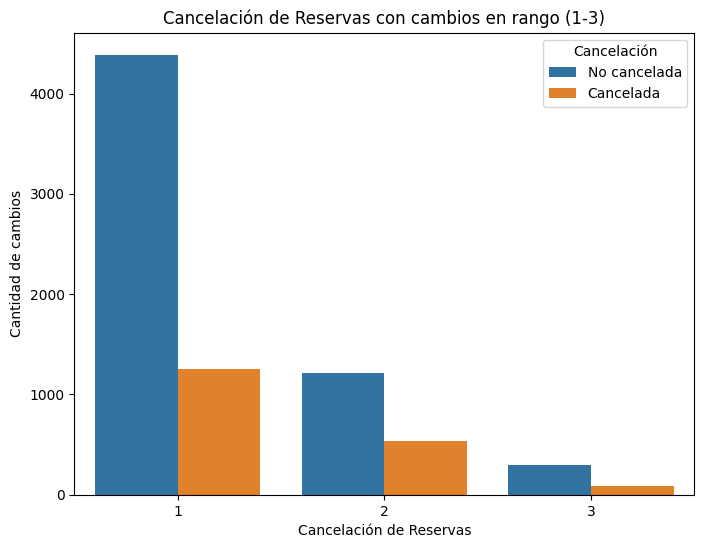

In [128]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_1_a_3_cambios, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de cambios')
plt.title('Cancelación de Reservas con cambios en rango (1-3)')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Podemos notar que predomina las reservas no canceladas,pero a medida que va bajando la cantidad de cambios,se acercan cada vez mas cerca,veamos el ultimo grupo

In [129]:
ds_reservas_con_4_o_mas_cambios = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['booking_changes'] >= 4) ]

ds_reservas_con_4_o_mas_cambios['is_canceled'].value_counts()

0    190
1     86
Name: is_canceled, dtype: int64

Veamos en graficos para comprender la distribucion

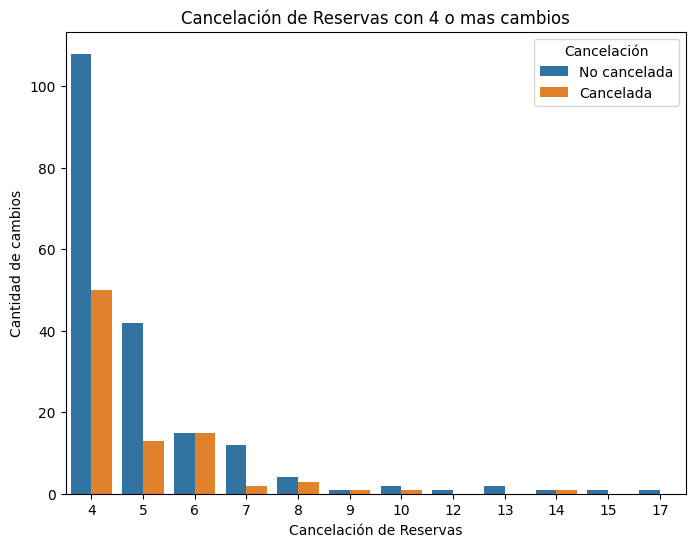

In [130]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_4_o_mas_cambios, x='booking_changes' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de cambios')
plt.title('Cancelación de Reservas con 4 o mas cambios')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Por último con este gráfico notamos que con cambios, las reservas suelen ser menos canceladas en la mayoría de sus casos, mientras que sin cambios, las cancelaciones son mayores

Como conclusión para nuestro análisis, tomamos como dato de que, a mayor cantidad de cambios en las reservas, menos probabilidad hay de que las mismas sean canceladas.

## Analisis de valores atipicos

Analicemos el boxplot

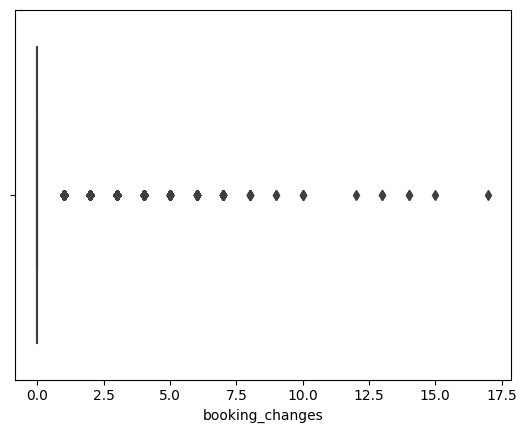

In [295]:
sns.boxplot(x=ds_hoteles_train_limpio["booking_changes"])
plt.show()

Podemos notar que la mayorias de ellos son outliers ,pero veamos sin el caso del 0 como se comportan

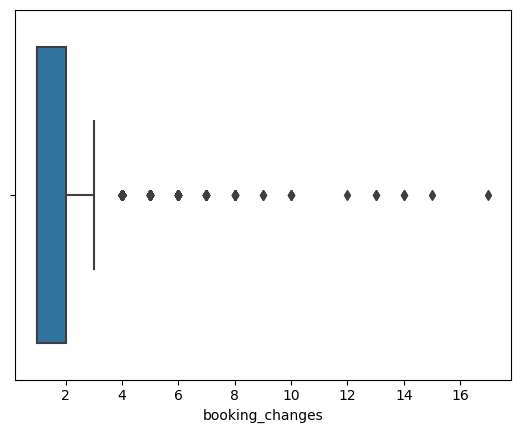

In [296]:
ds_con_cambios = ds_hoteles_train_limpio[ds_hoteles_train_limpio["booking_changes"] != 0]
sns.boxplot(x=ds_con_cambios["booking_changes"])
plt.show()

Visualizamos la gran cantidad de outliers presentes en esta variable

In [297]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["booking_changes"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["booking_changes"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers severos y moderados
lower_limit_severo = Q1 - 3 * IQR
upper_limit_severo = Q3 + 3 * IQR

lower_limit_moderado = Q1 - 1.5 * IQR
upper_limit_moderado = Q3 + 1.5 * IQR

# Identifica outliers severos y moderados
outliers_severos = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["booking_changes"] < lower_limit_severo) | (ds_hoteles_train_limpio["booking_changes"] > upper_limit_severo)]

outliers_moderados = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["booking_changes"] < lower_limit_moderado) | (ds_hoteles_train_limpio["booking_changes"] > upper_limit_moderado)]



outliers_moderados



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
5,City Hotel,1,2015,September,38,14,3,5,1,0.0,...,-1,-1,0,Transient,133.00,0,0,8f62c6f7-60a5-4b54-8ced-faaf9213a7a7,0,No Cancelada
6,Resort Hotel,112,2015,November,46,12,4,9,2,0.0,...,314.0,-1,0,Contract,66.42,0,1,c7e59753-c8a7-42eb-977b-f0ffaf1716eb,0,No Cancelada
13,City Hotel,41,2016,September,38,14,0,3,1,0.0,...,86.0,-1,0,Transient-Party,108.00,0,0,38c787b2-1746-4baa-962b-7770404d25c1,0,No Cancelada
27,City Hotel,159,2016,April,15,9,1,1,1,0.0,...,3.0,-1,0,Transient-Party,65.00,0,0,29bd3a7d-0d1e-4675-bc9a-bee8e4d57713,0,No Cancelada
35,Resort Hotel,364,2016,October,42,12,2,6,1,0.0,...,-1,223.0,0,Transient-Party,60.00,0,0,68deb679-eeb2-491e-98a6-0539073b4258,0,No Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61899,City Hotel,192,2016,October,43,21,0,2,3,0.0,...,29.0,-1,0,Transient-Party,123.00,0,0,b0cd7b95-7ee0-4f22-81ef-c1483ead8f50,0,No Cancelada
61903,City Hotel,140,2017,June,26,28,0,3,2,3.0,...,9.0,-1,0,Transient,220.00,0,0,a24e074b-8bbc-47ab-9154-70592f1fac09,0,No Cancelada
61905,City Hotel,62,2016,September,37,4,2,2,2,0.0,...,9.0,-1,0,Transient,98.55,0,2,8158d42e-3609-4773-9a6c-8ddc206e0b70,0,No Cancelada
61907,City Hotel,296,2016,September,39,21,0,4,1,0.0,...,26.0,-1,0,Transient-Party,96.00,0,0,8442e317-2c5d-4751-a664-17c12d9fa9ba,0,No Cancelada


8059 valores son atipicos,pero graficamente se puede notar que hay un conjunto de datos de outliers aun mas atipico,que veremos a continuacion

In [299]:
outliers_severos = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["booking_changes"] > 10) ]

outliers_severos

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
1369,City Hotel,159,2016,May,22,26,0,3,1,0.0,...,9.0,-1,0,Transient,119.85,0,1,f6136dee-67ba-4e94-8f25-d14b916d3a7f,0,No Cancelada
15575,Resort Hotel,101,2016,April,18,29,2,5,2,0.0,...,95.0,-1,0,Transient-Party,75.00,0,0,efffaa8e-f35d-4d6b-b849-9f8d869d5ffc,0,No Cancelada
24041,City Hotel,159,2016,May,22,26,0,3,1,0.0,...,9.0,-1,0,Transient-Party,187.85,0,0,db448d69-fc46-41fd-92e7-37084355de3a,1,Cancelada
26022,City Hotel,159,2016,May,22,26,0,3,2,1.0,...,9.0,-1,0,Transient,119.85,0,1,b049ced8-dbab-447b-9f21-2ca5b1bcd8c3,0,No Cancelada
40825,Resort Hotel,101,2016,April,18,29,2,3,2,0.0,...,95.0,-1,0,Transient-Party,75.00,0,1,32104acb-4eb9-42ba-b4a5-3861561a8734,0,No Cancelada
46642,City Hotel,159,2016,May,22,26,0,3,2,1.0,...,9.0,-1,0,Transient,119.85,0,1,503098f2-88ef-4de1-81a6-626e263ee313,0,No Cancelada
51870,City Hotel,329,2017,May,19,10,0,4,2,0.0,...,9.0,-1,0,Transient,104.40,0,2,c0fc1a1d-03de-4be6-a561-8cdfd9d3b84b,0,No Cancelada


In [301]:
outliers_severos['is_canceled_cat'].value_counts()

No Cancelada    6
Cancelada       1
Name: is_canceled_cat, dtype: int64

Podemos notar como este conjunto de datos puede ser de util para predecir el modelo ,ya que a mayor cantidad de cambios,pareciera que tienden a no cancelar la reserva.



---

# 12) Variable company

Esta variable contiene el ID de la empresa responsable del booking de las reservas. En nuestro análisis del dataset en general, esta columna era la que más datos faltantes tenía, por lo que por ahora es una buena candidata a ser analizada para nuestro análisis.

## Analisis y visualizacionde de datos
Como los valores que toma esta variable son IDs, termina siendo una variable categórica, por lo que vamos a ver qué ID son los más repetidos(es decir, qué empresas se hacen responsables de la mayor cantidad de reservas).

In [131]:

ds_reservas_con_company = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['company'] != '-1']

ds_reservas_con_company['company'].value_counts()

40.0     390
223.0    356
67.0     169
153.0    102
174.0     72
        ... 
425.0      1
258.0      1
84.0       1
373.0      1
160.0      1
Name: company, Length: 267, dtype: int64

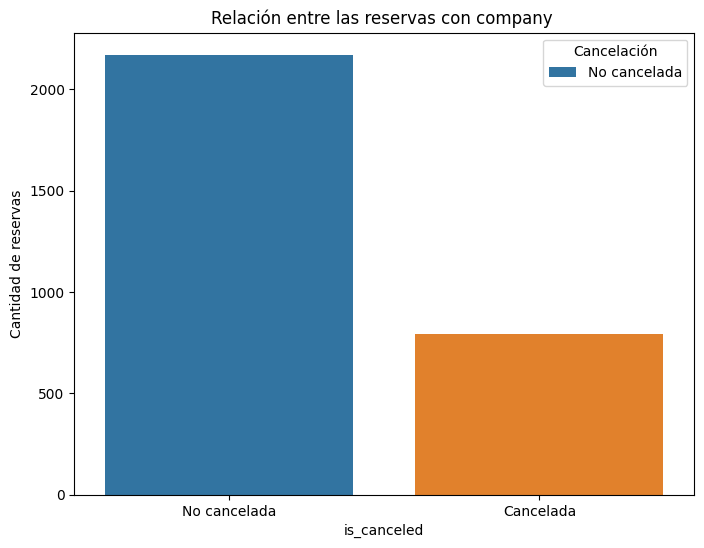

In [132]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_company, x='is_canceled')
plt.ylabel('Cantidad de reservas')
plt.title('Relación entre las reservas con company ')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Observamos que la gran mayoría de reservas que tuvieron una compañía responsable del booking no fueron canceladas; igualmente, debemos tener en cuenta de que un buen porcentaje de ellas(casi un 25%), fueron efectivamente canceladas.

# 13) Variable country
Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia al país de origen de la reserva.

## Analisis y visualizacion de datos
Vamos a ver en un gráfico los 10 países con mayores cantidades de reservas

<Axes: title={'center': 'Top 10 países con mayores reservas'}>

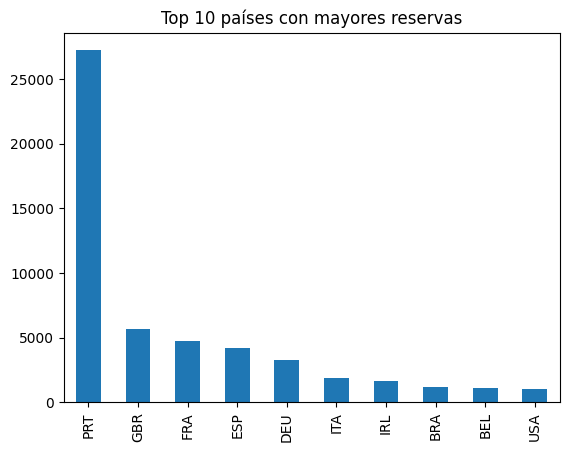

In [133]:
top_10_countries = (ds_hoteles_train_limpio['country'].value_counts()).iloc[:10]

top_10_countries.plot(kind='bar', title='Top 10 países con mayores reservas')

Observamos que PRT(Portugal según la regla usada) es el país con mayor cantidad de reservas.

# 14) Variable CustomerType
Esta variable se refiere al tipo de reservas que se realizaron, es una variable cualitativa.

## Limpieza de datos
Comenzamos por la cantidad de valores posibles que puede tomar la variable y si hay valores nulos cargados

In [134]:
ds_hoteles_train_limpio['customer_type'].value_counts()

Transient          46704
Transient-Party    11928
Contract            2023
Group                242
Name: customer_type, dtype: int64

In [135]:
ds_hoteles_train_limpio['customer_type'].isna().sum()

0

Vemos que esta variable esta bien cargado y no posee datos mal cargaods

## Analisis y visualizacion de datos
Utilizamos un grafico de torta para poder visualizar mejor su distribucion:

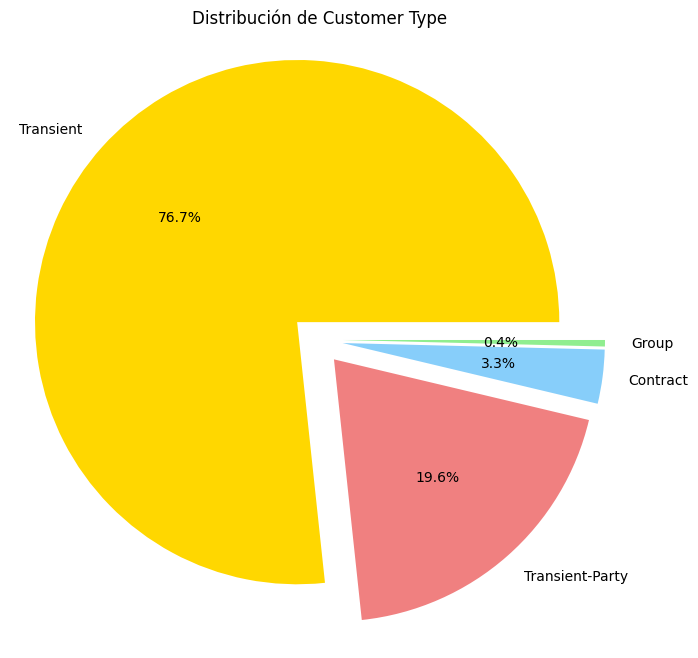

In [136]:
customer_type_counts = ds_hoteles_train_limpio['customer_type'].value_counts()

# Configuración para hacer que el gráfico de torta sea más legible
explode = (0.1, 0.1, 0.1, 0.1)  # Separación de las porciones
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Colores
# Crea el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, explode=explode, colors=colors,
        autopct='%1.1f%%')
plt.title('Distribución de Customer Type')
plt.axis('equal')  # Hace que el gráfico de torta sea circular
plt.show()

Teniendo en cuenta la distribución de la variable, vamos a ver cómo se relaciona esta variable con la variable target(is_canceled)

Sabiendo que el valor 'transient' es el más recurrente en el dataset, vamos a ver con qué frecuencia las reservas con este valor en customer_type son canceladas o no

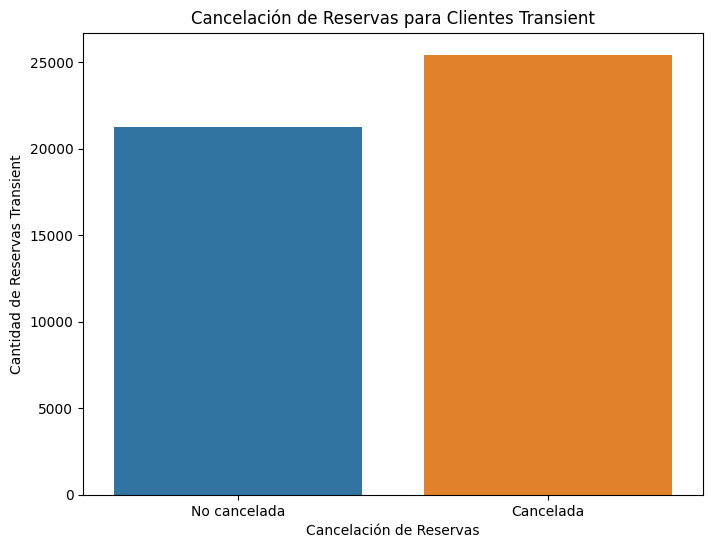

In [137]:
transient_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['customer_type'] == 'Transient']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient')
plt.title('Cancelación de Reservas para Clientes Transient')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Apaentemente los clientes Transient que cancelaron son mayores que los que no cancelaron.


Hacemos lo mismo con las reservas que tienen valor 'transient_party' en customer_type

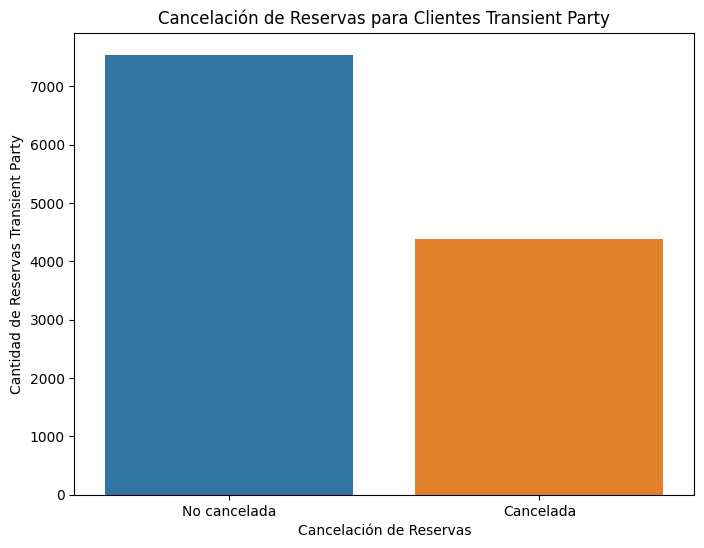

In [138]:
transient_party_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['customer_type'] == 'Transient-Party']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_party_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient Party')
plt.title('Cancelación de Reservas para Clientes Transient Party')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que las reservas con clientes Transient Party suelen cancelarse con menor frecuencia.


Repetimos para el valor 'contract'

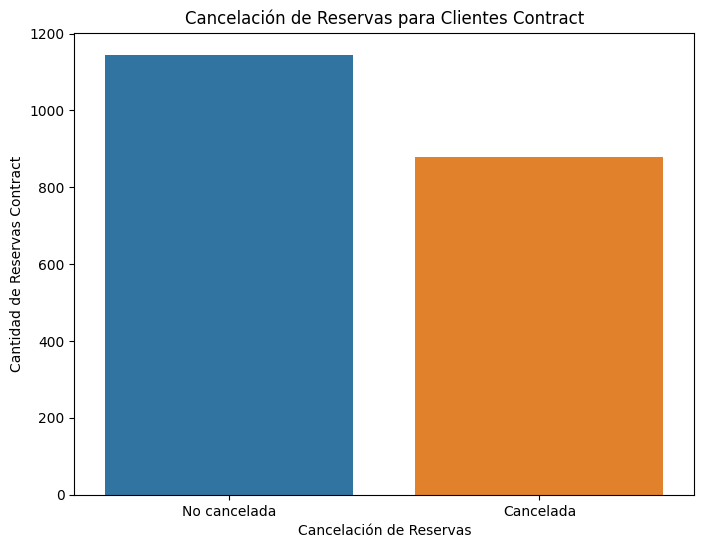

In [139]:
contract_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['customer_type'] == 'Contract']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=contract_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Contract')
plt.title('Cancelación de Reservas para Clientes Contract')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Por último, vemos la relación cuando esta variable toma el valor 'group'


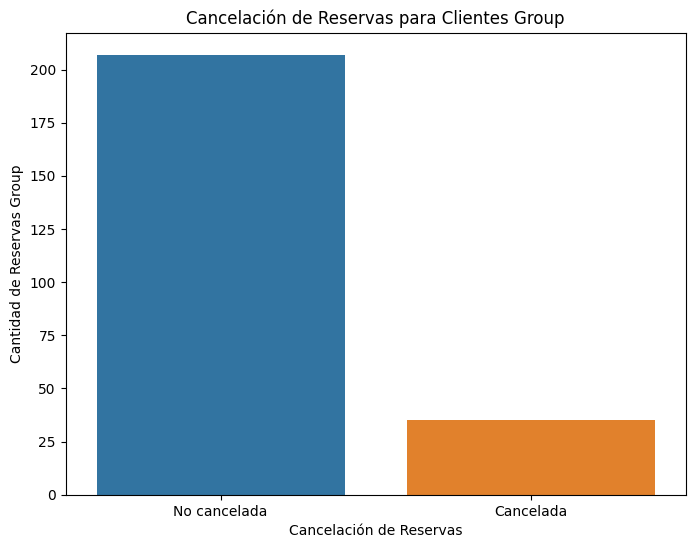

In [140]:
group_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['customer_type'] == 'Group']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=group_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Group')
plt.title('Cancelación de Reservas para Clientes Group')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que las reservas con clientes Group suelen cancelarse con menor frecuencia.

Juntamos los 4 graficos

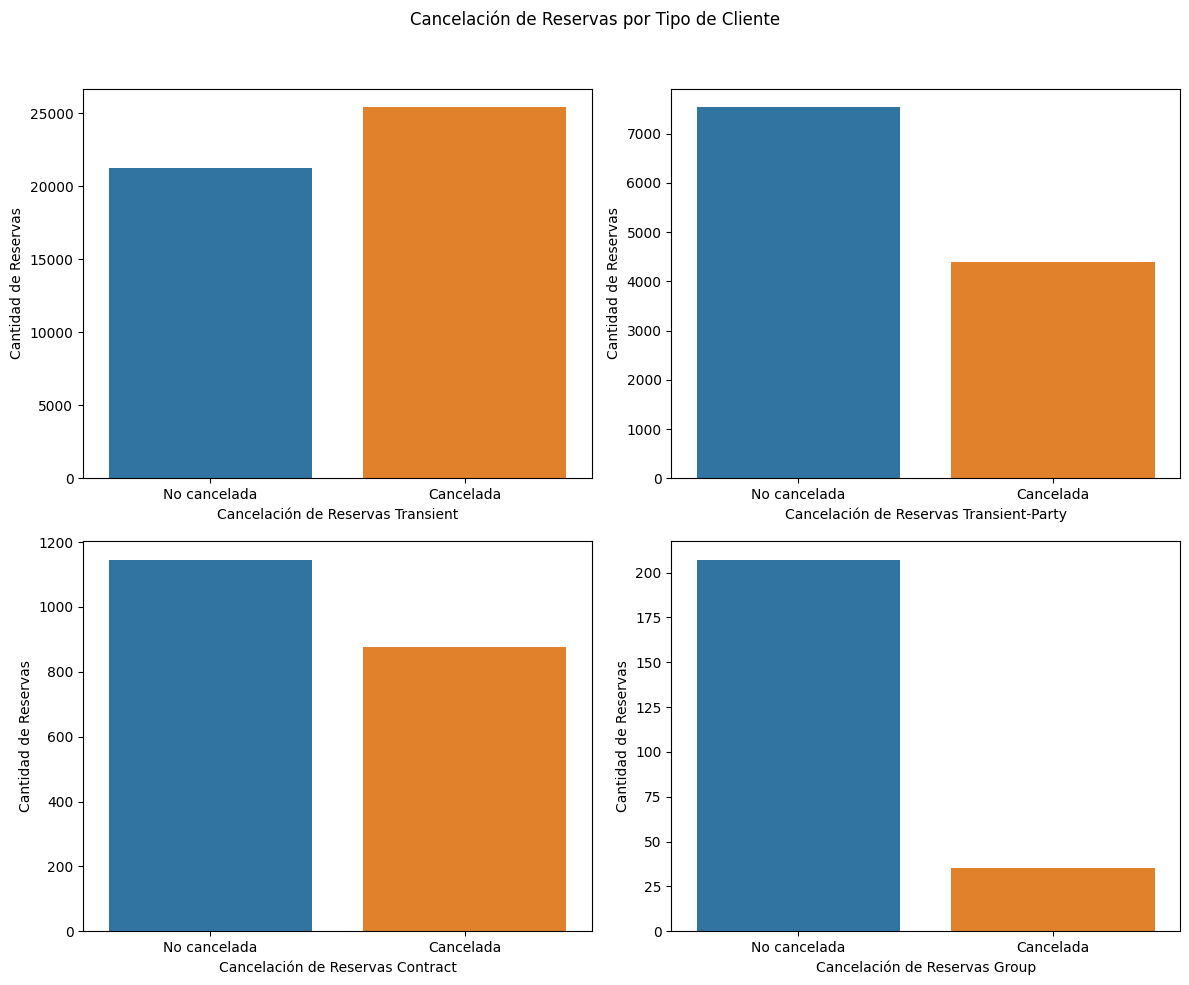

In [141]:
# Crear un conjunto de subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Cancelación de Reservas por Tipo de Cliente')

# Crear gráficos de barras para cada tipo de cliente en su respectivo subgráfico
sns.countplot(data=transient_df, x='is_canceled', ax=axes[0, 0])
axes[0, 0].set_xlabel('Cancelación de Reservas Transient')
axes[0, 0].set_ylabel('Cantidad de Reservas')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=transient_party_df, x='is_canceled', ax=axes[0, 1])
axes[0, 1].set_xlabel('Cancelación de Reservas Transient-Party')
axes[0, 1].set_ylabel('Cantidad de Reservas')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=contract_df, x='is_canceled', ax=axes[1, 0])
axes[1, 0].set_xlabel('Cancelación de Reservas Contract')
axes[1, 0].set_ylabel('Cantidad de Reservas')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=group_df, x='is_canceled', ax=axes[1, 1])
axes[1, 1].set_xlabel('Cancelación de Reservas Group')
axes[1, 1].set_ylabel('Cantidad de Reservas')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No cancelada', 'Cancelada'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Como conclusión final, vemos que las reservas con customer_type del tipo 'transient'(es el valor que en más reservas se repite) suelen cancelarse con mayor frecuencia; para las reservas con 'transient party', 'contract' y 'group' tenemos más reservas NO canceladas. Esta variable va a ser interesante para nosotros a la hora de hacer nuestros modelos de predicción.

# 15) Variable DaysInWaitingList
Es una variable cuantitativa que describe el número de días que la reserva estuvo en el
lista de espera antes de que fuera confirmado
el cliente.

## Limpieza de datos
Comenzamos por ver lo posibles valores que toma la variable y si hay algun valor nulo cargado en la columna o si hay mal cargados, valores negativos por ejemplo

In [142]:
columna_daysinwaitinglist = ds_hoteles_train_limpio['days_in_waiting_list']

columna_daysinwaitinglist.value_counts()

0      58677
39       155
31        90
44        83
58        82
       ...  
81         1
175        1
121        1
97         1
105        1
Name: days_in_waiting_list, Length: 116, dtype: int64

In [143]:
columna_daysinwaitinglist.isna().sum()

0

In [144]:
(columna_daysinwaitinglist >= 0).value_counts()

True    60897
Name: days_in_waiting_list, dtype: int64

Podemos observar que no hay valores mal cargados o valores nulos por lo que podemos concluir que la columna esta bien cargada

## Analisis y visualizacion de datos
Como conclusión inicial, vemos que la gran mayoría de reservas(59678 exactamente) tuvieron 0 días de espera antes de ser confirmadas. Esto nos ayuda para pensar lo siguiente: tendríamos que centrar nuestro análisis para aquellas reservas en los que tuvieron a partir de un día de espera, y ver qué ocurrió con ellas(si fueron canceladas o no).

Comenzamos analizando el grupo de las reservas con 0 días de espera antes de confirmarse las mismas.

In [145]:
ds_reservas_con_0_dias_de_espera = ds_hoteles_train_limpio[(ds_hoteles_train_limpio['days_in_waiting_list'] == 0) ]

ds_reservas_con_0_dias_de_espera['is_canceled'].value_counts()

0    29585
1    29092
Name: is_canceled, dtype: int64

Mostramos en un gráfico la relación entre las reservas con 0 días de espera y la variable target

([<matplotlib.axis.XTick at 0x7e6beecee650>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

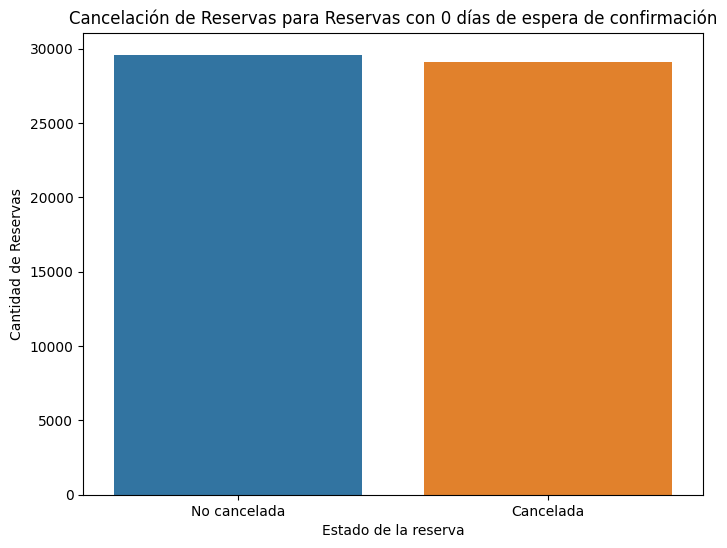

In [146]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_0_dias_de_espera, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con 0 días de espera de confirmación')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Observamos que para este valor, está pareja la cantidad de reservas que fueron canceladas con las que no(más reservas NO fueron canceladas).

Veamos ahora qué ocurre con las reservas que tuvieron a partir de un día de espera para su confirmación.


In [147]:
ds_days_in_waiting_list = ds_hoteles_train_limpio.loc[columna_daysinwaitinglist > 1]

ds_days_in_waiting_list.shape

(2214, 32)

Existen 2214 reservas que al menos tuvieron un dia dentro de la lista de espera, veamos sus medidas de resumen

In [148]:
ds_days_in_waiting_list['days_in_waiting_list'].describe()

count    2214.000000
mean       73.229901
std        66.835122
min         2.000000
25%        38.000000
50%        50.000000
75%        91.000000
max       391.000000
Name: days_in_waiting_list, dtype: float64

Observemos estas medidas en un boxplot

Text(0.5, 1.0, 'Boxplot de las reservas con espera de confirmación mayor a un día')

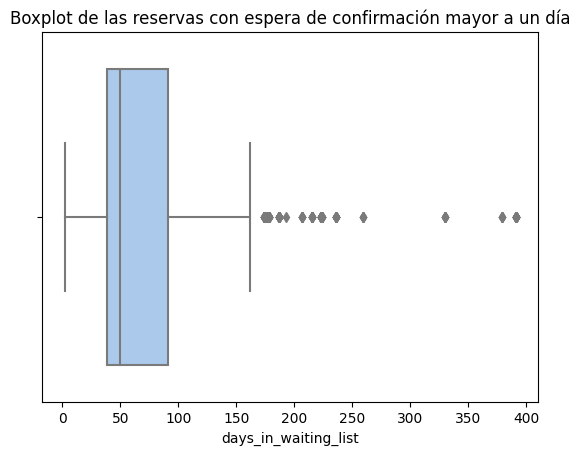

In [149]:
sns.boxplot(x = ds_days_in_waiting_list['days_in_waiting_list'], palette = "pastel")
plt.title('Boxplot de las reservas con espera de confirmación mayor a un día')

Observamos que estas reservas se mantienen en un rango de desde 40 a 90 días de espera aproximadamente, mientras que hubieron reservas con más de 150 días de espera, nos interesa saber qué pasó con esas reservas.

Comenzamos viendo con las reservas con esperas desde 1 a 90 días para su confirmación

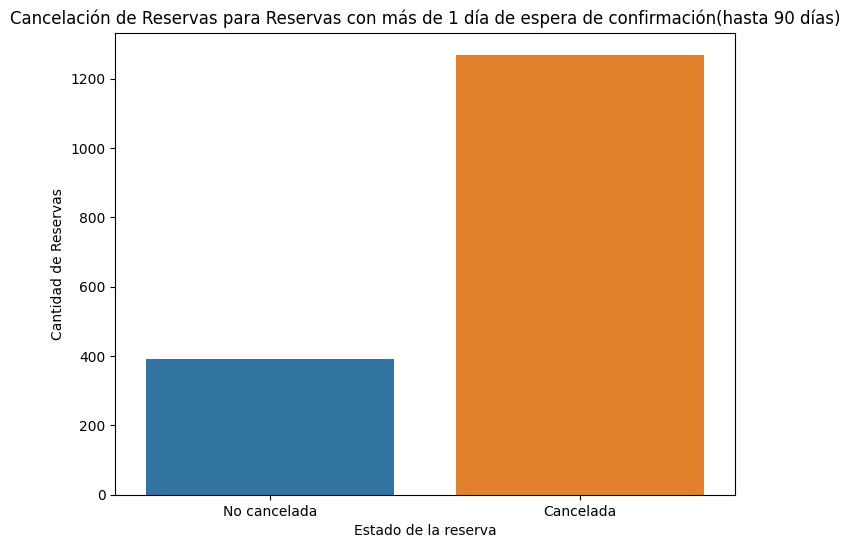

In [150]:
ds_days_in_waiting_list_media = ds_hoteles_train_limpio.loc[(columna_daysinwaitinglist >= 1) & (columna_daysinwaitinglist < 90)]
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_days_in_waiting_list_media, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con más de 1 día de espera de confirmación(hasta 90 días)')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.show()

Observamos que la gran mayoría de reservas con más de 1 día(hasta 90 días) de espera para confirmar la reserva terminaron siendo canceladas. Entonces el tiempo de espera de confirmación parece ser un factor muy importante a la hora de ver el estado final de la reserva.

Veamos ahora con las reservas que tuvieron más de 90 días de espera para su confirmación

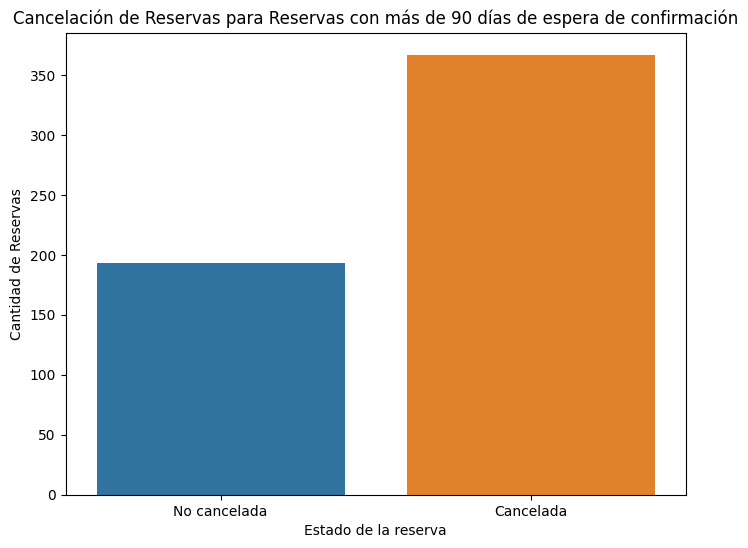

In [151]:
ds_days_in_waiting_list_media = ds_hoteles_train_limpio.loc[columna_daysinwaitinglist >= 90]
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_days_in_waiting_list_media, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con más de 90 días de espera de confirmación')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.show()

Observamos(como era de esperarse), que casi el doble de las reservas que tuvieron más de 90 días de espera para su confirmación fueron canceladas.

Como conclusión para esta variable, decimos que es muy importante para el análisis, porque a mayor cantidad de días de espera para confirmarse, las reservas tienden más a terminar siendo canceladas.

## Analisis de valores atipicos

Analicemos el boxplot

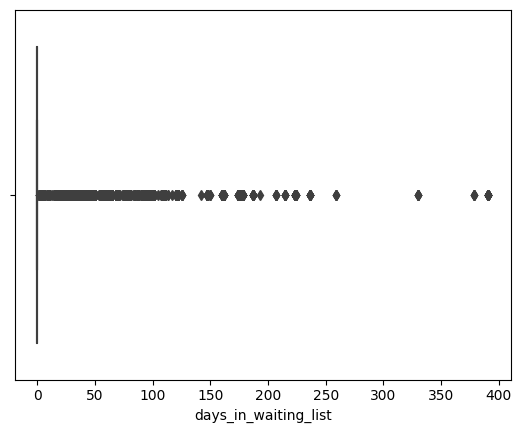

In [289]:
sns.boxplot(x=ds_hoteles_train_limpio["days_in_waiting_list"])
plt.show()

Visualizamos la gran cantidad de outliers presentes en esta variable

In [292]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["days_in_waiting_list"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["days_in_waiting_list"], 75)


# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers severos y moderados
lower_limit_severo = Q1 - 3 * IQR
upper_limit_severo = Q3 + 3 * IQR

lower_limit_moderado = Q1 - 1.5 * IQR
upper_limit_moderado = Q3 + 1.5 * IQR

# Identifica outliers severos y moderados
outliers_severos = ds_hoteles_train_limpio[ (ds_hoteles_train_limpio["days_in_waiting_list"] > 120)]

outliers_moderados = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["days_in_waiting_list"] < lower_limit_moderado) | (ds_hoteles_train_limpio["days_in_waiting_list"] > upper_limit_moderado)]



outliers_moderados


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
11,City Hotel,349,2016,October,41,4,1,5,1,0.0,...,58.0,-1,162,Transient-Party,80.0,0,0,e1df43c0-7b84-4bb2-857c-760926c881f5,1,Cancelada
16,City Hotel,333,2016,September,39,20,0,2,2,0.0,...,58.0,-1,19,Transient,90.0,0,0,95c27727-6b56-497b-ae24-cb41c5081313,1,Cancelada
41,City Hotel,192,2016,May,20,12,0,3,2,0.0,...,39.0,-1,42,Transient,135.0,0,0,34f79bf9-9253-40c7-88e5-efca60c979ab,1,Cancelada
52,City Hotel,134,2015,December,49,4,2,2,2,0.0,...,3.0,-1,91,Transient,65.0,0,0,23b1c492-0fa1-494f-874d-e36b4adefdf7,1,Cancelada
76,City Hotel,251,2016,March,13,22,0,3,2,0.0,...,29.0,-1,93,Transient,125.0,0,0,73542e03-4699-4005-af4e-359ac6344408,1,Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61793,City Hotel,81,2016,March,13,25,1,2,2,0.0,...,3.0,-1,4,Transient-Party,65.0,0,0,130d8927-d5a6-409c-bd20-af4c98e06872,0,No Cancelada
61797,City Hotel,288,2016,May,19,5,0,3,2,0.0,...,1.0,-1,259,Transient-Party,62.5,0,1,799d5738-a952-4c02-89fd-7c935d2b24d8,0,No Cancelada
61800,City Hotel,192,2017,June,23,8,0,2,2,0.0,...,58.0,-1,11,Transient,100.0,0,0,e3e661f2-775d-4d9b-97f8-7a718254a7ca,1,Cancelada
61805,City Hotel,276,2016,September,39,22,0,3,2,0.0,...,6.0,-1,178,Transient-Party,95.0,0,0,6d957dfb-f4f0-4706-a0f9-06aa6baef3da,1,Cancelada


2220 valores son atipicos,pero graficamente se puede notar que hay un conjunto de datos de outliers aun mas atipico,que veremos a continuacion

In [293]:
outliers_severos

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
11,City Hotel,349,2016,October,41,4,1,5,1,0.0,...,58.0,-1,162,Transient-Party,80.00,0,0,e1df43c0-7b84-4bb2-857c-760926c881f5,1,Cancelada
471,City Hotel,276,2016,May,20,13,2,3,2,0.0,...,21.0,-1,160,Transient,61.00,0,0,af14acf5-c064-4ee9-8b0d-9cef9096f789,1,Cancelada
518,City Hotel,443,2016,October,41,7,0,2,2,0.0,...,1.0,-1,391,Transient,65.00,0,0,b3f440ab-7fff-4d40-9570-e5115f413986,1,Cancelada
1237,City Hotel,418,2016,September,40,26,1,2,2,0.0,...,132.0,-1,223,Transient-Party,107.00,0,0,d5bd5c90-3c9f-41e4-8421-4099baa75682,0,No Cancelada
1576,City Hotel,276,2016,September,39,22,0,3,2,0.0,...,6.0,-1,178,Transient-Party,116.33,0,0,7281e93d-5c6f-4e8d-ad4f-7937da9e8add,0,No Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61485,City Hotel,276,2016,May,20,13,2,3,2,0.0,...,21.0,-1,160,Transient,61.00,0,0,5cfa8f74-92d2-4912-a2ca-bc24039b0b23,1,Cancelada
61536,City Hotel,276,2016,September,39,22,0,3,2,0.0,...,6.0,-1,178,Transient-Party,95.00,0,0,46c2e30d-7cd8-4791-aa4a-aae03e6d42ae,1,Cancelada
61633,City Hotel,349,2016,October,41,4,1,5,2,0.0,...,58.0,-1,162,Transient-Party,90.00,0,0,edd4a38a-f1f7-4595-938a-aa84a02215db,1,Cancelada
61797,City Hotel,288,2016,May,19,5,0,3,2,0.0,...,1.0,-1,259,Transient-Party,62.50,0,1,799d5738-a952-4c02-89fd-7c935d2b24d8,0,No Cancelada


In [294]:
outliers_severos['is_canceled_cat'].value_counts()

Cancelada       157
No Cancelada    141
Name: is_canceled_cat, dtype: int64

Con respecto a los valores atipicos encontrados,podemos notar que ,en los severos, no se encuentra una relacion muy grande entre la distribucion de la cancelacion.Dentro de los valores y el contexto del problema,estos valores pueden ser posibles y se encuentran en gran cantidad distribuidos en el conjunto de datos,vamos a dejarlos en el conjunto de datos

# 16) Variable DepositType
Es una variable cualitativa que nos da una
Indicación sobre si el cliente realizó un
depósito al realizar la reserva, asi que veamos que valores puede tomar

## Limpieza de datos
Empezamos por ver la cantidad de valores posibles puede tomar la variable y si hay valores null cargados

In [152]:
columna_deposit = ds_hoteles_train_limpio['deposit_type']

columna_deposit.value_counts()

No Deposit    50669
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

In [153]:
columna_deposit.isna().sum()

0

## Analisis y Visualizacion de datos
Observamos que hay 3 valores: 'no deposit'(sin depósito bancario), 'non refund'(sin reembolso), y 'refundable'(con reembolso). Para nuestro análisis, esta variable tiene mucho valor, ya que por ejemplo, sin haber empezado a ver los valores, podemos tomar como hipótesis inicial por ejemplo que las reservas sin reembolso serán las que más tiendan a NO cancelarse

Veamoslo en un gráfico los valores que toma la variable

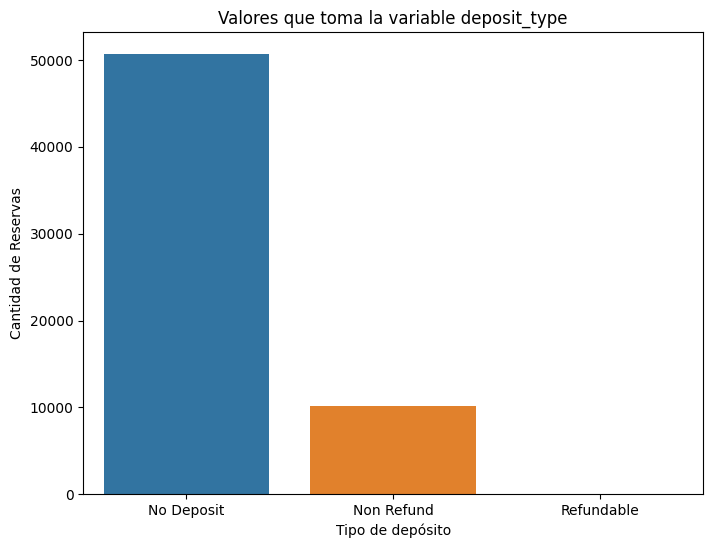

In [154]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='deposit_type')
plt.xlabel('Tipo de depósito')
plt.ylabel('Cantidad de Reservas')
plt.title('Valores que toma la variable deposit_type')
plt.show()

Vemos que un gran número de reservas fueron sin depósito

Analicemos valor a valor con respecto a la variable is_canceled

In [155]:
ds_deposit_no_deposit = ds_hoteles_train_limpio[ds_hoteles_train_limpio['deposit_type'] == 'No Deposit']
ds_deposit_non_refund = ds_hoteles_train_limpio[ds_hoteles_train_limpio['deposit_type'] == 'Non Refund']
ds_deposit_refundable = ds_hoteles_train_limpio[ds_hoteles_train_limpio['deposit_type'] == 'Refundable']

Veamos en un gráfico la relación entre las reservas que no tuvieron depósito con la variable target

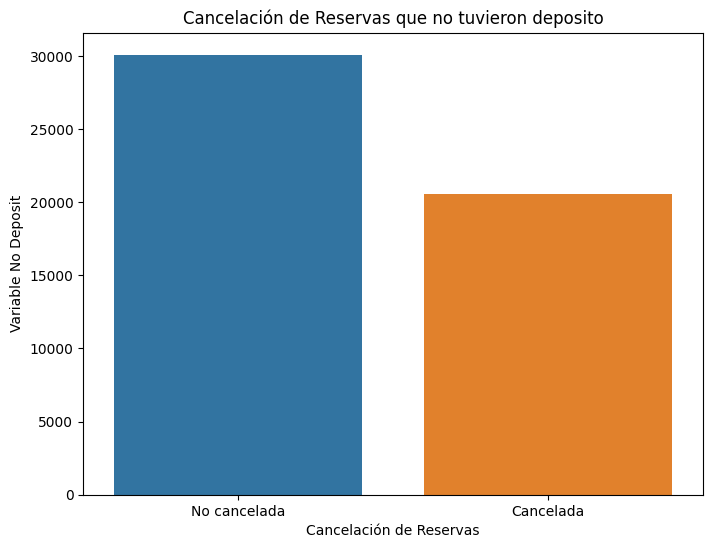

In [156]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_no_deposit, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable No Deposit')
plt.title('Cancelación de Reservas que no tuvieron deposito')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que, por casi 10000 reservas de diferencia, las reservas que tuvieron este valor en la variable 'deposit_type' no fueron canceladas.

Realizamos el mismo gráfico pero ahora con las reservas sin reembolso

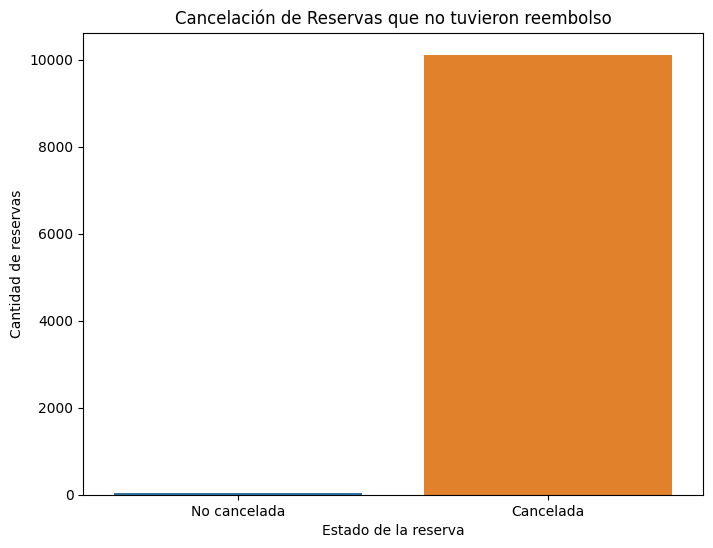

In [157]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_non_refund, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas que no tuvieron reembolso')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Ante todo pronóstico, la gran mayoría de reservas que NO tuvieron reembolso fueron finalmente canceladas.

Por último, analizamos esta relación con la variable target cuando deposit_type es 'refundable'

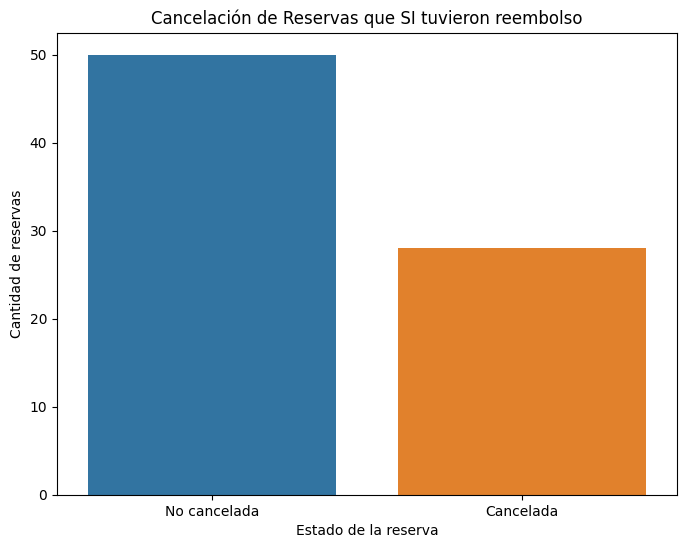

In [158]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_refundable, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas que SI tuvieron reembolso')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Observamos que, por casi el doble de casos, las reservas que fueron reembolsables NO fueron canceladas.

# 17) Variable DistributionChannel
Esta variable cualitativa que muestra el canal de distribución de reservas. El término
“TA” significa “Agentes de Viajes” y “TO”
significa “operadores turísticos”.
Veamos los valores que puede tomar

In [159]:
columna_distribution_channel = ds_hoteles_train_limpio['distribution_channel']

columna_distribution_channel.value_counts()

TA/TO        51300
Direct        6408
Corporate     3096
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

Veamos si tiene un valor nulo


In [160]:
columna_distribution_channel.isna().sum()

0

No tiene datos faltantes, sin embargo vemos que esta variable toma en 4 casos el valor 'Undefined', pero veamos esto en un gráfico de torta

## Analisis y Visualizacion de datos

Text(0.5, 1.0, 'Distribution Channel')

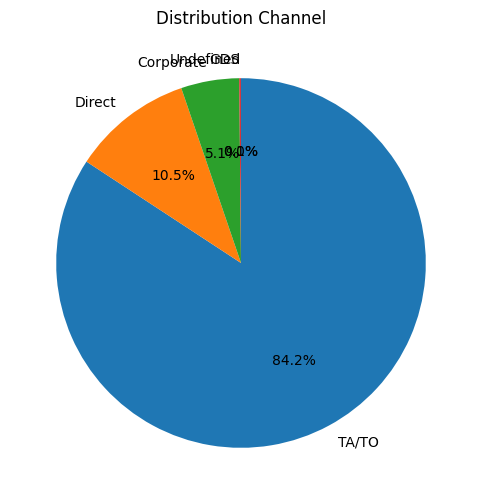

In [161]:
plt.figure(figsize=(6, 6))

plt.pie(columna_distribution_channel.value_counts(),labels=columna_distribution_channel.value_counts().index,
       autopct='%1.1f%%', startangle=90, counterclock=False )
plt.title('Distribution Channel')
#plt.axis('equal')  # Hace que el gráfico de torta sea circular

Vamos a considerar la variable TA/TO como la variable a analizar,veamos como se distribuyen con la variable is_canceled

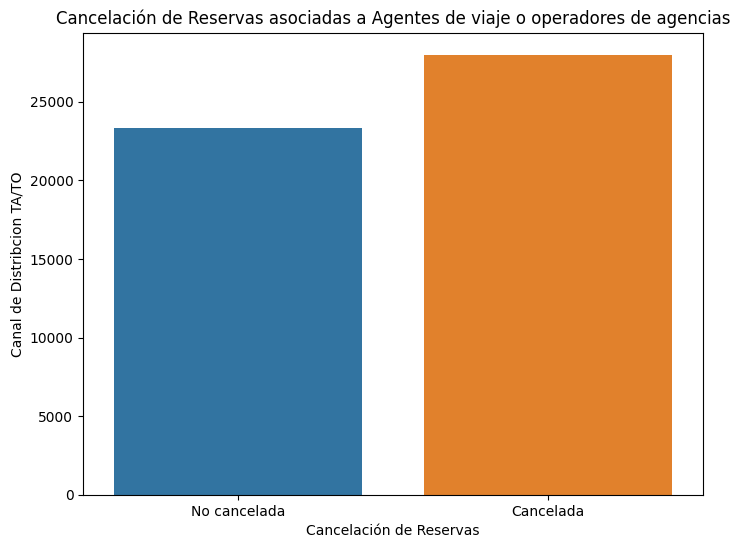

In [162]:
ds_distribution_ta_to = ds_hoteles_train_limpio[ds_hoteles_train_limpio['distribution_channel'] == 'TA/TO']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_distribution_ta_to, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Canal de Distribcion TA/TO')
plt.title('Cancelación de Reservas asociadas a Agentes de viaje o operadores de agencias')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()




# 18) Variable is_repeated_guest
Es el valor que indica si el nombre de la reserva
fue de un invitado repetido (1) o no (0).Es una variable cualitativa, por lo cual procedemos a ver qué posibles valores pueden tomar y qué tan frecuentes son

## Limpieza de datos
Veremos tambien si hay valores nulos cargados

In [163]:
ds_hoteles_train_limpio['is_repeated_guest'].value_counts()

0    59389
1     1508
Name: is_repeated_guest, dtype: int64

In [164]:
ds_hoteles_train_limpio['is_repeated_guest'].isna().sum()

0

## Analisis y visualizacion de datos
Podemos visualizar que existen mayor cantidad de personas que no habían visitado antes el hotel que de personas que si habían visitado.
Usamos un gráfico de torta para poder visualizarlo mas detallado.

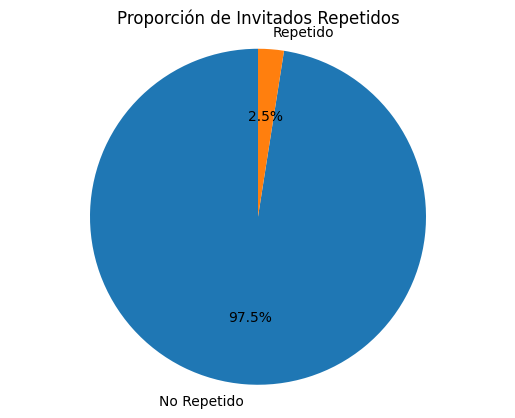

In [165]:
repetido_counts = ds_hoteles_train_limpio['is_repeated_guest'].value_counts()
labels = ['No Repetido', 'Repetido']
plt.pie(repetido_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de Invitados Repetidos')
plt.show()

 Analizamos, junto a las otras variables,a buscar correlacion entre ellas;y la primer variable que puede tener una conexion con la misma es la variable hotel.
La usare para calcular la proporción de invitados repetidos en cada tipo de hotel. Esto te ayudará a comprender si la proporción de invitados repetidos varía según el tipo de hotel.

In [166]:
proporcion_por_tipo_de_hotel = ds_hoteles_train_limpio.groupby('hotel')['is_repeated_guest'].mean()* 100
print(proporcion_por_tipo_de_hotel)

hotel
City Hotel      1.929990
Resort Hotel    3.640852
Name: is_repeated_guest, dtype: float64


Estos resultados nos muestran que:


*  En el "City Hotel," aproximadamente el 1.92% de los invitados son repetidos
* En el "Resort Hotel," aproximadamente el 3.64% de los invitados son repetidos.  


Estos resultados sugieren que el "Resort Hotel" tiene una proporción más alta de invitados repetidos en comparación con el "City Hotel.
Lo veremos en un grafico

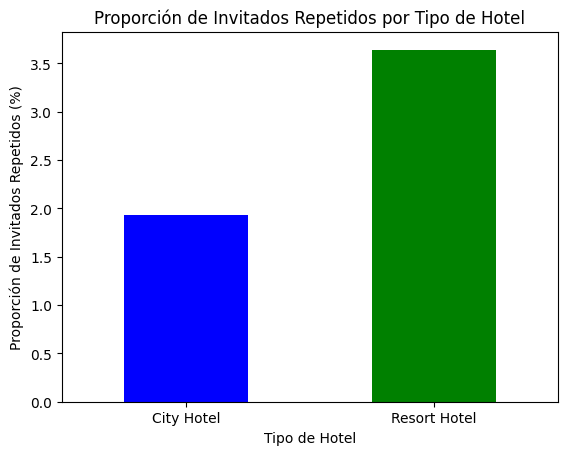

In [167]:
proporcion_por_tipo_de_hotel.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Proporción de Invitados Repetidos (%)')  # Agregar (%) al título del eje y
plt.title('Proporción de Invitados Repetidos por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

Voy a ver como esta relacionada la variable con las cancelaciones

In [168]:
repetidos_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_repeated_guest'] == 1]
no_repetidos_df = ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_repeated_guest'] == 0]

En estos nuevos dataframes, tengo separado los clientes repetidos y los no repetidos, y a continuacion voy a ver en un gráfico si la cancelaciones tienen una conexión con las cancelaciones

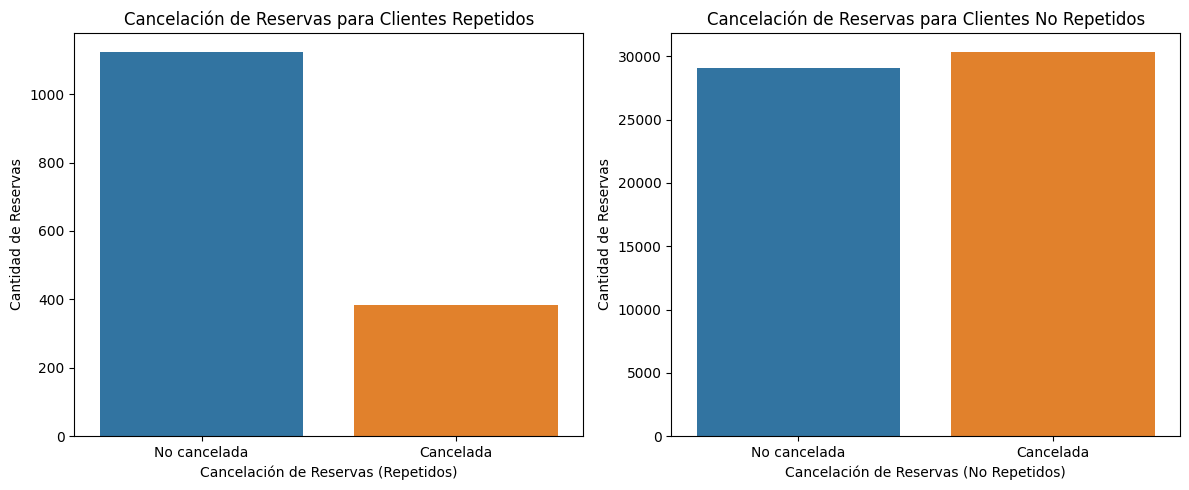

In [169]:
# Crear dos gráficos de barras separados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.subplot(1, 2, 2)
sns.countplot(data=no_repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (No Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes No Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x
plt.tight_layout()
plt.show()

A simple vista con los clientes no repetidos no existe mucha relacion entre las cancelaciones,mientras que los clientes repetidos tienden a no cancelar las reservas por encima de las canceladas.
Una hipótesis con esta variable es que los clientes que ya han estado previamente,tienden a no cancelar a proximas reservas.



---

# 19) Variable hotel

Esta columna representa al tipo de hotel en el cual se realizó la reserva. El tipo de dato de esta columna es de tipo object, por lo que sospechamos que es una variable del tipo cualitativa, entonces procedemos a ver qué posibles valores pueden tomar y qué tan frecuentes son.

## Limpieza de datos
Vemos qué valores toma esta variable y con qué frecuencia lo hacen y si hay valores nulos cargados

In [170]:
columna_hotel = ds_hoteles_train_limpio['hotel']
columna_hotel.value_counts()

City Hotel      41451
Resort Hotel    19446
Name: hotel, dtype: int64

In [171]:
columna_hotel.isna().sum()

0

## Analisis de datos y visualizacion
Usamos un gráfico de barras para ver la distribución

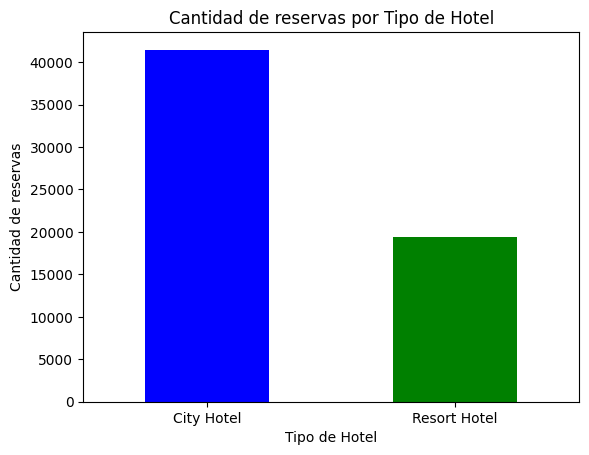

In [172]:
columna_hotel.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

Observamos que la gran mayoria de reservas(exactamente 42129 reservas) se dieron en los llamados 'city hotel', mientras que el resto de reservas(19784) fueron en hoteles del tipo 'resort hotel'

Ahora nos interesa saber cuántas reservas se cancelaron efectivamente dependiendo del tipo de hotel que se eligió

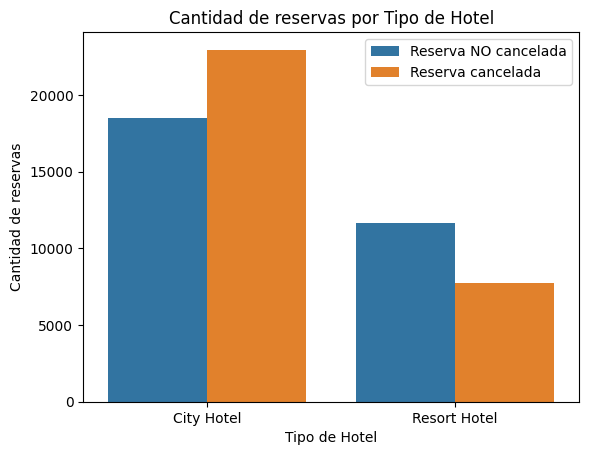

In [173]:
sns.countplot(data=ds_hoteles_train_limpio, x="hotel", hue="is_canceled")
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.legend(labels=["Reserva NO cancelada","Reserva cancelada"])

Observamos que las reservas con hoteles del tipo 'City Hotel' tienen alrededor de 23000 reservas canceladas(mas reservas canceladas que las que NO se cancelaron). En cambio, las reservas en hoteles del tipo 'Resort Hotel' conservan alrededor de 12000 reservas que NO se cancelaron, mientras que casi 8000 reservas si se cancelaron.

Con esto, tomamos como conclusion de que las reservas que tienen un tipo de hotel 'City Hotel' tienden a ser más canceladas que las que tienen 'Resort Hotel'.



---

# 20) Variable lead time


Esta variable representa la cantidad de días que entre que se hizo la reserva y la fecha de entrada al hotel. Se calcula a partir de la resta del día la fecha de entrada al hotel.
Es una variable cuantitativa (int), por lo que procedemos a ver la mayor cantidad de metricas posibles (media, mediana, moda, etc)

## Limpieza de datos
Empezamos por asegurarnos que los valores de la columna esten un rango valido y que no haya valores null cargados

In [174]:
columna_lead_time = ds_hoteles_train_limpio['lead_time']
columna_lead_time.isna().sum()

0

In [175]:
(columna_lead_time >= 0).value_counts()

True    60897
Name: lead_time, dtype: int64

## Analisis de datos y visualizacion
Como es una variable cuantitativa (int), por lo que procedemos a ver la mayor cantidad de metricas posibles (media, mediana, moda, etc)

In [176]:
columna_lead_time.describe()

count    60897.000000
mean       113.218533
std        110.741535
min          0.000000
25%         24.000000
50%         79.000000
75%        173.000000
max        629.000000
Name: lead_time, dtype: float64

Visualizamos los datos en un boxplot para poder observar una mejor distribución de los datos

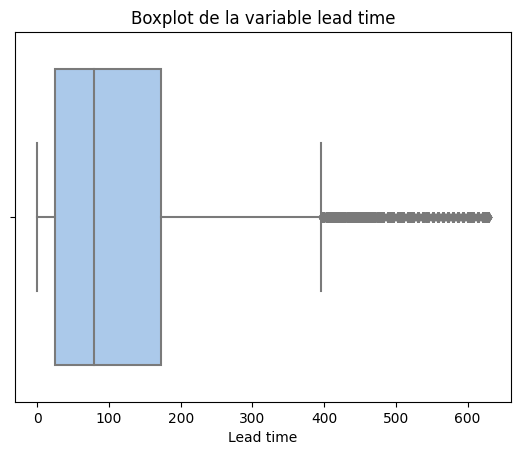

In [177]:
sns.boxplot(x = columna_lead_time, palette = "pastel")
plt.title("Boxplot de la variable lead time")
plt.xlabel('Lead time')
plt.show()

Observamos que una mayoría de reservas tuvieron un lead_time con valor entre 50 y 150. Es decir, la mayoría de reservas se dieron entre 50 días y 150 días de anticipación.

Buscamos una relación entre el tipo de hotel de estas reservas y la variable lead_time.

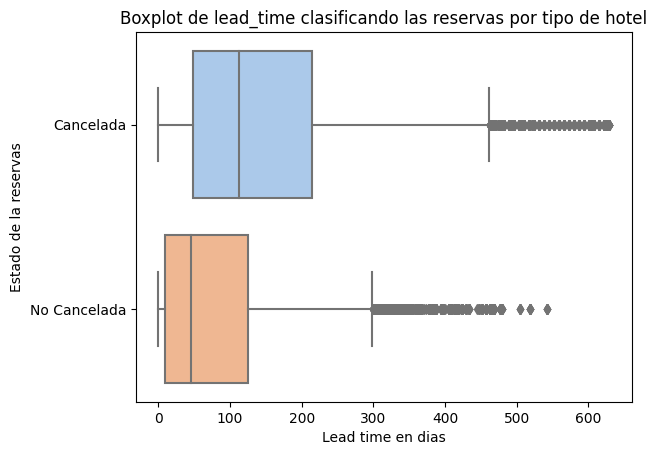

In [178]:
sns.boxplot(x = columna_lead_time, y = ds_hoteles_train_limpio["is_canceled_cat"], palette = "pastel")
plt.title("Boxplot de lead_time clasificando las reservas por tipo de hotel")
plt.xlabel('Lead time en dias')
plt.ylabel('Estado de la reservas')
plt.show()

A partir de este gráfico y las estadísticas podemos observar que la mayoría de las reservas entre se hacen entre los 0 dias y 200 dias, con varios outliers con reservas de más de 400 dias. Observamos más detalladamente, la distribución de los datos sin los outliers y de solo los outliers

In [179]:
ds_lead_time_menor_400 = ds_hoteles_train_limpio.loc[columna_lead_time <= 400]
ds_lead_time_menor_400.shape

(59615, 32)

Podemos observar que hemos filtrado solamente alrededor de 1300 columnas. Ahora observemos la distribucion de los datos para estos datos

In [180]:
ds_lead_time_menor_400["lead_time"].describe()

count    59615.000000
mean       105.522788
std         98.132934
min          0.000000
25%         23.000000
50%         76.000000
75%        166.000000
max        400.000000
Name: lead_time, dtype: float64

In [181]:
ds_lead_time_mas_400 = ds_hoteles_train_limpio.loc[columna_lead_time > 400]
ds_lead_time_mas_400["lead_time"].describe()

count    1282.000000
mean      471.082683
std        62.538839
min       403.000000
25%       422.000000
50%       454.000000
75%       496.000000
max       629.000000
Name: lead_time, dtype: float64

De nuevo, nos apoyamos en un boxplot para observar estas medidas

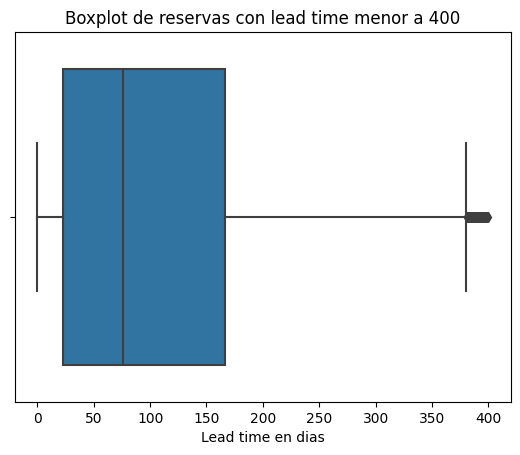

In [182]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"])
plt.title("Boxplot de reservas con lead time menor a 400")
plt.xlabel('Lead time en dias')
plt.show()

Observamos que estas reservas tuvieron un lead_time con valor entre 30 y 170 aproximadamente.

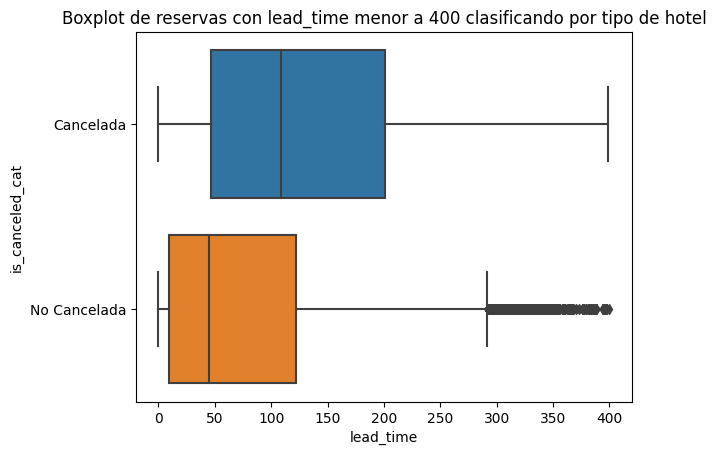

In [183]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"], y = ds_lead_time_menor_400["is_canceled_cat"])
plt.title("Boxplot de reservas con lead_time menor a 400 clasificando por tipo de hotel")
plt.show()

<Axes: xlabel='lead_time', ylabel='Count'>

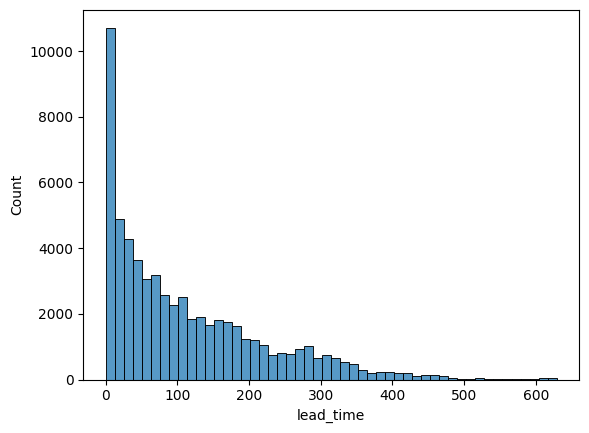

In [184]:
sns.histplot(data = ds_hoteles_train_limpio, x = "lead_time", bins = 50)

## Analisis de valores atipicos

Analicemos el boxplot

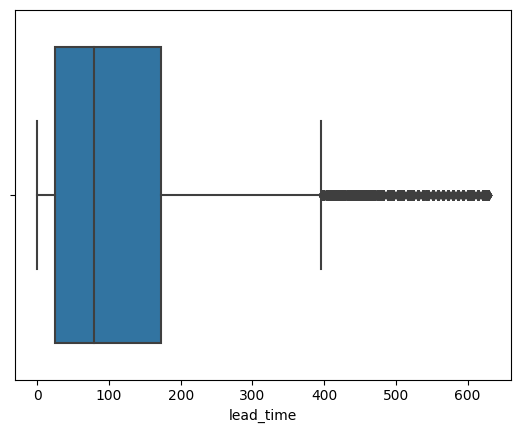

In [284]:
sns.boxplot(x=ds_hoteles_train_limpio["lead_time"])
plt.show()

Visualizamos la gran cantidad de outliers presentes en esta variable

In [286]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["lead_time"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["lead_time"], 75)


# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers severos y moderados
lower_limit_severo = Q1 - 3 * IQR
upper_limit_severo = Q3 + 3 * IQR

lower_limit_moderado = Q1 - 1.5 * IQR
upper_limit_moderado = Q3 + 1.5 * IQR

# Identifica outliers severos y moderados
outliers_severos = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["lead_time"] < lower_limit_severo) | (ds_hoteles_train_limpio["lead_time"] > upper_limit_severo)]

outliers_moderados = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["lead_time"] < lower_limit_moderado) | (ds_hoteles_train_limpio["lead_time"] > upper_limit_moderado)]



outliers_moderados


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
15,City Hotel,465,2017,July,30,26,0,3,2,0.0,...,229.0,-1,0,Transient-Party,112.67,0,0,d73d9a15-bcb1-441e-9571-56cbdde0e670,1,Cancelada
51,City Hotel,489,2016,November,46,10,0,2,2,0.0,...,1.0,-1,0,Transient,62.80,0,0,264b4bdc-1f93-41dc-bad8-381405061cb1,1,Cancelada
82,City Hotel,412,2016,August,35,25,0,2,2,0.0,...,1.0,-1,0,Transient,62.00,0,0,29230190-f1d1-4d9e-90ec-d9d4a0755cfd,1,Cancelada
95,City Hotel,454,2016,October,41,6,0,2,2,0.0,...,1.0,-1,0,Transient,62.00,0,0,11de0e85-b5c6-4876-96b7-37c65f479ec5,1,Cancelada
99,City Hotel,420,2016,September,36,3,2,2,2,0.0,...,35.0,-1,0,Transient,75.00,0,0,14d571b1-1cf3-4058-b50a-46367cd4f47e,1,Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61753,City Hotel,433,2016,September,37,8,0,3,2,0.0,...,3.0,-1,0,Transient,70.00,0,0,29a08da1-e707-4bd4-bbfe-ca55c19b7c3b,1,Cancelada
61761,City Hotel,496,2016,November,47,17,0,2,2,0.0,...,1.0,-1,0,Transient,62.80,0,0,159515de-2c06-41b2-8364-f34ddee5e1c6,1,Cancelada
61768,City Hotel,433,2016,September,38,15,0,2,2,0.0,...,1.0,-1,0,Transient,62.00,0,0,6f8bfdd6-6c76-449c-8ef4-ba22b2ece17c,1,Cancelada
61783,City Hotel,454,2016,October,41,6,0,2,2,0.0,...,1.0,-1,0,Transient,62.00,0,0,5e1faaa8-cf26-4e74-bc1f-0fbcbfe65c01,1,Cancelada


1317 valores son atipicos,pero graficamente se puede notar que hay un conjunto de datos de outliers aun mas atipico,que veremos a continuacion

In [287]:
outliers_severos

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
576,City Hotel,626,2016,November,46,7,1,2,2,0.0,...,1.0,-1,0,Transient,62.8,0,0,69a7777e-6b6c-4e2c-a528-1286d6d647c3,1,Cancelada
2623,City Hotel,626,2016,November,46,7,1,2,2,0.0,...,1.0,-1,0,Transient,62.8,0,0,4f80cf2d-040d-45b0-b4fc-e6bec9ac1e5f,1,Cancelada
4560,City Hotel,622,2017,March,12,23,0,2,2,0.0,...,1.0,-1,0,Transient,62.0,0,0,18547874-f4c8-48d1-8633-4d5d333de59a,1,Cancelada
7563,City Hotel,626,2016,November,46,7,1,2,2,0.0,...,1.0,-1,0,Transient,62.8,0,0,30551dea-c6b4-4f81-bec1-83c20e49d2f2,1,Cancelada
7813,City Hotel,622,2017,March,12,23,0,1,1,0.0,...,1.0,-1,0,Transient,59.0,0,0,ca5e9d60-a717-4bb3-b77d-5cf1731278d1,1,Cancelada
8393,City Hotel,622,2017,March,12,23,0,2,2,0.0,...,1.0,-1,0,Transient,62.0,0,0,1b5923fb-6a15-4f05-b8fa-b10813d3a40a,1,Cancelada
8984,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,1.0,-1,0,Transient,62.0,0,0,b0cd1952-9807-4940-9270-0c51248955ff,1,Cancelada
9412,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,1.0,-1,0,Transient,62.0,0,0,6dec253c-91e7-423e-9a5b-f53a51763b2e,1,Cancelada
9728,City Hotel,626,2016,November,46,7,1,2,2,0.0,...,1.0,-1,0,Transient,62.8,0,0,2ac4a1a5-eb5a-4547-a28b-c30ca6ba1712,1,Cancelada
10535,City Hotel,622,2017,March,12,23,0,2,2,0.0,...,1.0,-1,0,Transient,62.0,0,0,99453b02-b364-434f-bc53-0501eeac08a4,1,Cancelada


In [288]:
outliers_severos['is_canceled_cat'].value_counts()

Cancelada    48
Name: is_canceled_cat, dtype: int64

Con respecto a los valores atipicos encontrados,podemos notar que ,en los severos, todos fueron cancelados por lo que al momento de predecir puede que sea una mayor probabilidad de cancelaciones .Por lo cual lo vamos a dejar estos datos para su analisis



---

# 21) Variable Market Segment
En un primer analisis, parece ser una variable del tipo categorica. Hace refencia al segmento del mercado al cual esta destinada la reserva. Las siglas TA y TO, hacen referencia Travel Agents y Travel Operators. Por lo que podemos empezamos a explorar cuales son sus posibles valores y como se pueden llegar a relacionar con las reservas canceladas

## Limpieza de datos ( 2 valores undefined) (Por ahora los dejamos)
Empezamos por ver que posibles valores puede tomar la variable y si posee campos nulos

In [185]:
market_segmets_counts = ds_hoteles_train_limpio["market_segment"].value_counts().reset_index()
market_segmets_counts

,index,market_segment
0,Online TA,29000
1,Offline TA/TO,12234
2,Groups,11421
3,Direct,5641
4,Corporate,2459
5,Aviation,110
6,Complementary,30
7,Undefined,2


In [186]:
ds_hoteles_train_limpio["market_segment"].isna().sum()

0

In [187]:
ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio["market_segment"] == "Undefined"]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
27359,City Hotel,1,2015,August,32,5,0,2,3,0.0,...,-1,-1,0,Transient-Party,18.0,0,2,6ad2b270-d3ae-464f-9d4d-0722e4c4e7bc,1,Cancelada
58511,City Hotel,2,2015,August,32,3,1,0,2,0.0,...,-1,-1,0,Transient-Party,12.0,0,1,d94b4fca-243f-498c-a52f-14b52e7e5e72,1,Cancelada


Observamos que hay dos filas que estan categorizadas como Undefined, tendremos que evaluar si tenemos que sacarlas del dataset, ignorarlas o reemplazarlas por un valor valido

## Analisis de datos y visualizacion
La mayoria de las reservas vemos que fueron reservadas mediante Online Travel Agents, seguido por offline Travel Agents y operators, seguido por grupos y reservas directas. Para poder

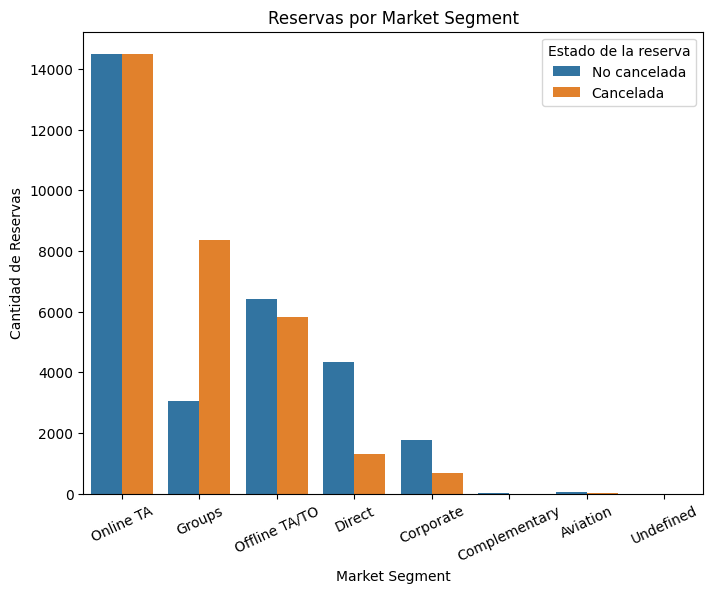

In [188]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='market_segment' , hue= 'is_canceled')
plt.xlabel('Market Segment')
plt.xticks(rotation=25)
plt.ylabel('Cantidad de Reservas')
plt.title('Reservas por Market Segment')
plt.legend(title='Estado de la reserva', labels=['No cancelada', 'Cancelada'])
plt.show()

A partir de este grafico podemos, concluir que la mitad de las reservas de hechas por Online TA son canceladas, sin embargo algo mas claro a destacar es que la mayoria de las reservas hechas por Grupos son canceladas y l mayoria de las reservas hechas directamente o por corporaciones no son canceladas.

# 22) Variable Meal
En un primer análisis, es una variable del tipo cualitativa. Hace refencia al tipo de comida reservada. Por lo que podemos empezamos a explorar cuales son sus posibles valores y como se pueden llegar a relacionar con las reservas canceladas.
Mi hipótesis antes de comenzar con el análisis,es que el tipo de comida no tiene impacto en la tasa de cancelación,pero veremos en el análisis si es correcta.


## Limpieza de datos
Vemos los posibles valores que toma la variable y con qué frecuencia lo hace, que tambine esta relacionada a su analisis. Tambien veremos si hay valores nulos cargados en la columna

In [189]:
columna_meal = ds_hoteles_train_limpio['meal']

columna_meal.value_counts()

BB           47024
HB            7367
SC            5460
Undefined      576
FB             470
Name: meal, dtype: int64

In [190]:
columna_meal.isna().sum()

0

A primera vista, a pesar de parecer que los valores dentro con la categoria undefined son validos, es en realidad que la reserva no incluye ninguna comida. Por lo que podemos concluir que los datos estan bien cargados

## Analisis y visualizacion de datos
Luego de ver los posibles valores que toman, debo asociar la variable Undefined y SC, ya que el paper dado lo dice, por lo cual quedaría así

In [191]:
df_copia_meal = ds_hoteles_train_limpio.copy()

# Reemplazar "SC" y "Undefined" por "SC_Undefined" en la columna "meal" de la copia
df_copia_meal['meal'] = df_copia_meal['meal'].replace(['SC', 'Undefined'], 'SC_Undefined')

# Verificar el resultado en la copia
columna_meal_copia = df_copia_meal['meal']
columna_meal_copia.value_counts()


BB              47024
HB               7367
SC_Undefined     6036
FB                470
Name: meal, dtype: int64

Veamos como se distribuyen en un gráfico

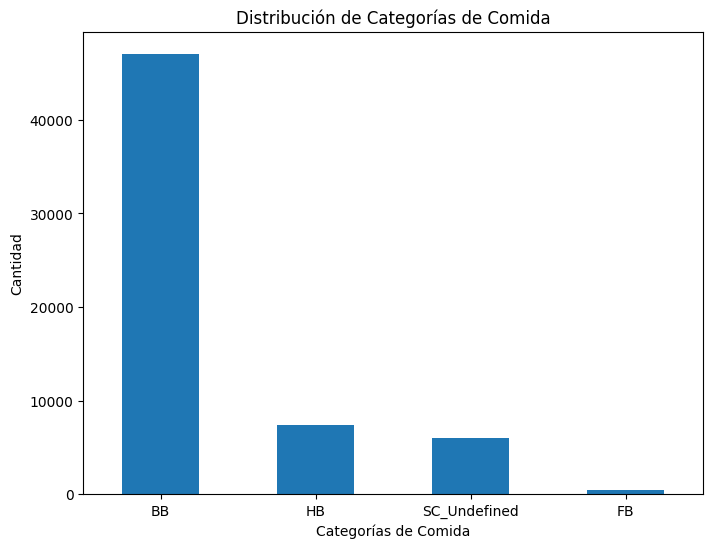

In [192]:
conteo_meal = df_copia_meal['meal'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_meal.plot(kind='bar')
plt.xlabel('Categorías de Comida')
plt.ylabel('Cantidad')
plt.title('Distribución de Categorías de Comida')
plt.xticks(rotation=0)  # Para evitar la rotación de etiquetas en el eje x
plt.show()

Vamos a analizar valor por valor,y analizar si existe alguna hipótesis asociada a ella

In [193]:
ds_meal_bb = df_copia_meal[df_copia_meal['meal'] == 'BB']
ds_meal_hb = df_copia_meal[df_copia_meal['meal'] == 'HB']
ds_meal_sc_undefined = df_copia_meal[df_copia_meal['meal'] == 'SC_Undefined']
ds_meal_fb = df_copia_meal[df_copia_meal['meal'] == 'FB']

Comenzemos con el valor BB

In [194]:
ds_meal_bb['is_canceled'].value_counts()

1    23965
0    23059
Name: is_canceled, dtype: int64

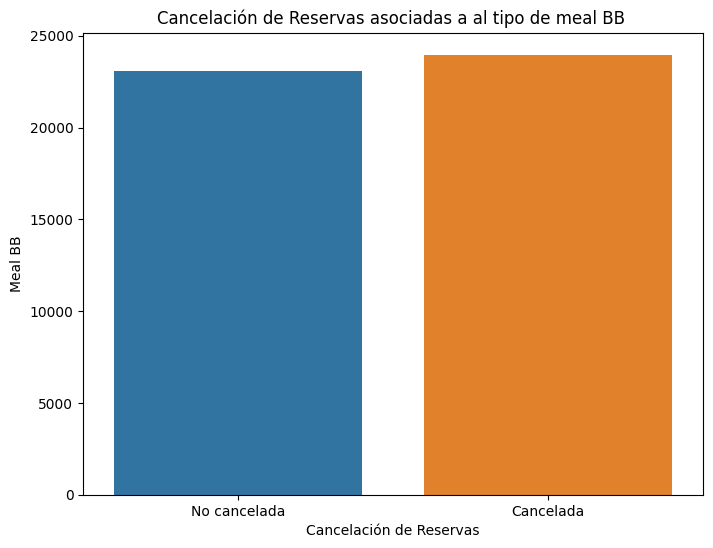

In [195]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_bb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal BB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal BB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

A simple vista , con el tipo 'BB' podemos decir que no pareciera tener impacto en las tasas de cancelacion,ya que se dan con numeros similares entre las canceladas y las no canceladas

In [196]:
ds_meal_hb['is_canceled'].value_counts()

0    3895
1    3472
Name: is_canceled, dtype: int64

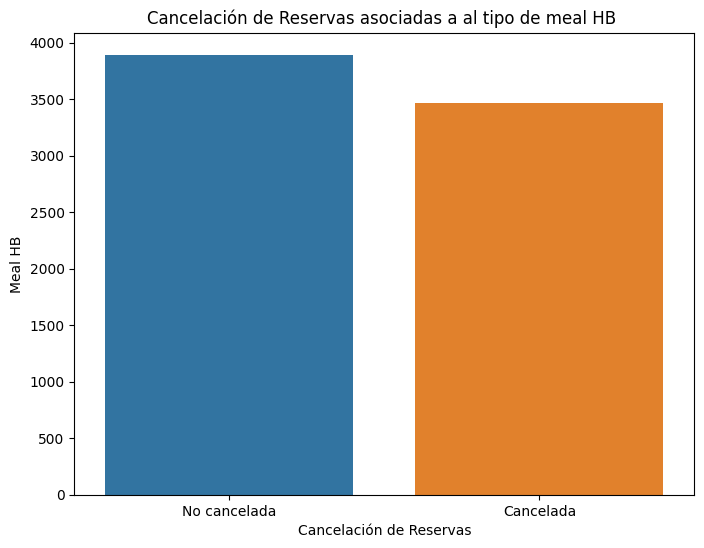

In [197]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_hb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal HB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal HB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Al igual que el valor BB,esta variable tampoco tiene gran impacto en las cancelaciones

In [198]:
ds_meal_sc_undefined['is_canceled'].value_counts()

0    3077
1    2959
Name: is_canceled, dtype: int64

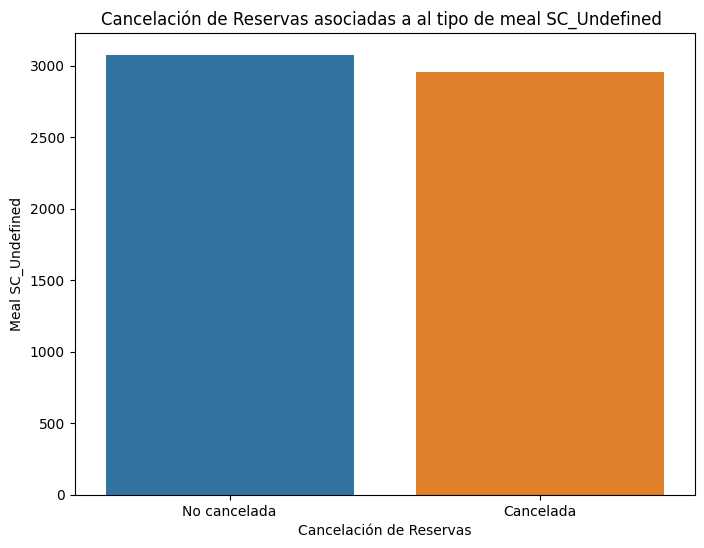

In [199]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_sc_undefined, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal SC_Undefined')
plt.title('Cancelación de Reservas asociadas a al tipo de meal SC_Undefined ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

A diferencia de las otros valores, las cancelaciones son mayores que en las no canceladas,pero por muy pocos casos, veamos la ultima

In [200]:
ds_meal_fb['is_canceled'].value_counts()

1    332
0    138
Name: is_canceled, dtype: int64

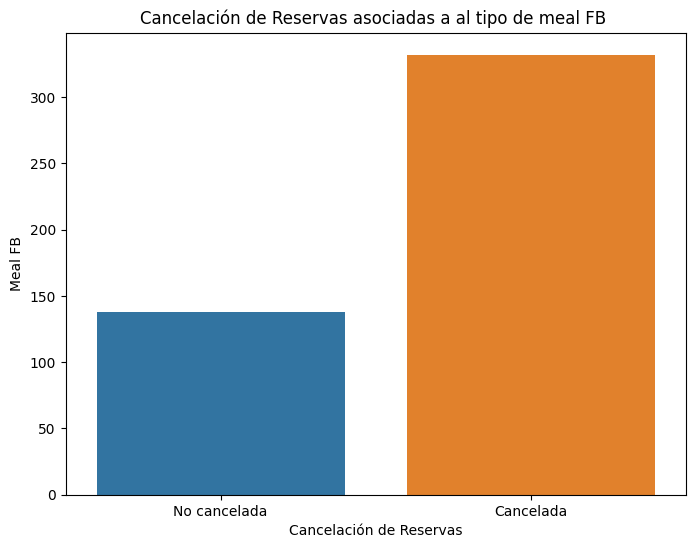

In [201]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_fb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal FB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal FB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar que las reservas con Meal FB tienden a tener una mayor proporcion de cancelacion que las que usan otro tipo de comida, por lo cual mi hipotesis no es correcta, los datos nos arrojan una tendencia mayor que en los ootros tipo de cancelacion.
Podemos analizar sus tasas promedio de cancelacion

In [202]:
promedio_por_meal = df_copia_meal.groupby('meal')['is_canceled'].mean()
promedio_por_meal

meal
BB              0.509633
FB              0.706383
HB              0.471291
SC_Undefined    0.490225
Name: is_canceled, dtype: float64

Dado estos resultados y que mi hipotesis anterior quedo refutada,planteo una nueva que las tasas de cancelacion de la variable FB pueden estar asociadas al tipo de hotel donde se ha hecho la reserva,y veremos si esta relacionada con sus cancelaciones

In [203]:
df_hotel_ch = ds_hoteles_train_limpio[ds_hoteles_train_limpio['hotel'] == 'City Hotel']
df_hotel_rh = ds_hoteles_train_limpio[ds_hoteles_train_limpio['hotel'] == 'Resort Hotel']

Veamos sus tasas de cancelacion

In [204]:
tasa_cancelacion_hotel_ch = df_hotel_ch.groupby('meal')['is_canceled'].mean()
tasa_cancelacion_hotel_rh = df_hotel_rh.groupby('meal')['is_canceled'].mean()
tasa_cancelacion_fb_ch = tasa_cancelacion_hotel_ch['FB']
tasa_cancelacion_fb_rh = tasa_cancelacion_hotel_rh['FB']

print('La tasa de cancelacin de el City Hotel,relacionada con el tipo de comida FbB, es: ' + str(tasa_cancelacion_fb_ch )+' y la de Resort Hotel: ' +str( tasa_cancelacion_fb_rh))

La tasa de cancelacin de el City Hotel,relacionada con el tipo de comida FbB, es: 1.0 y la de Resort Hotel: 0.6891891891891891


Por lo cual ,estos valores indican que la categoría "FB" tiene tasas de cancelación relativamente altas tanto en el City Hotel como en el Resort Hotel. La tasa de cancelación en el Resort Hotel es un poco más alta que en el City Hotel para esta categoría específica.

La tasa de cancelación en la categoría "FB" es alta en ambos tipos de hoteles, lo que sugiere que esta categoría podría ser más propensa a cancelaciones independientemente del tipo de hotel.Veremos mas adelante si tiene algun significado estos datos obtenidos

# 23) Variable PreviousBookingsNotCanceled
Es una variable de tipo cuantitativa , que representa el número de reservas anteriores no
canceladas por el cliente antes de la
reserva actual,por lo cual veamos como se disrtibuye(media,mediana,...)

## Limpieza de datos
Veamos si tiene datos faltantes y si los valores tienen sentido, por ejemplo que no haya reservas previas negativas

In [205]:
columna_PreviousBookingsNotCanceled = ds_hoteles_train_limpio['previous_bookings_not_canceled']

columna_PreviousBookingsNotCanceled.isna().sum()

0

In [206]:
(columna_PreviousBookingsNotCanceled >= 0).value_counts()

True    60897
Name: previous_bookings_not_canceled, dtype: int64

## Analisis de datos y visualizaciones
Ya que no tiene datos faltantes ,seguiremos en análisis.

In [207]:
columna_PreviousBookingsNotCanceled = ds_hoteles_train_limpio['previous_bookings_not_canceled']

columna_PreviousBookingsNotCanceled.describe()

count    60897.000000
mean         0.106212
std          1.362219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

Veamos como se distribuye en un grafico

<Axes: xlabel='previous_bookings_not_canceled', ylabel='Count'>

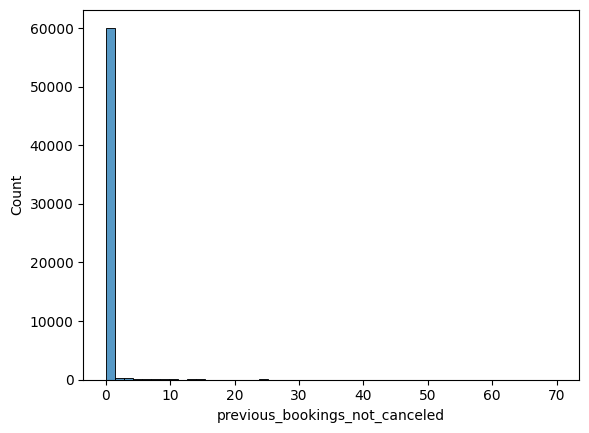

In [208]:
sns.histplot(data = ds_hoteles_train_limpio, x = "previous_bookings_not_canceled", bins = 50)

Podemos notar que puede tomar muchos valores,veamos cuales

In [209]:
columna_PreviousBookingsNotCanceled.value_counts()

0     59494
1       579
2       238
3       140
4        97
5        72
6        38
8        28
7        27
10       20
9        20
11       18
13       15
12       13
14       10
25       10
15        7
18        7
24        6
26        5
17        5
28        4
22        4
19        3
27        3
21        3
20        3
16        2
58        2
29        2
23        2
49        1
56        1
32        1
63        1
36        1
59        1
69        1
31        1
43        1
50        1
41        1
40        1
61        1
55        1
33        1
70        1
38        1
30        1
62        1
64        1
Name: previous_bookings_not_canceled, dtype: int64

Veamos si las personas que cancelaron alguna vez una reserva antes de la actual,tienden a cancelar

In [210]:
ds_reservas_con_cancelaciones_anteriores= ds_hoteles_train_limpio[(ds_hoteles_train_limpio['previous_bookings_not_canceled'] != 0) ]

ds_reservas_con_cancelaciones_anteriores['is_canceled'].value_counts()

0    1285
1     118
Name: is_canceled, dtype: int64

Veamos en un grafico

([<matplotlib.axis.XTick at 0x7e6bee2b3460>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

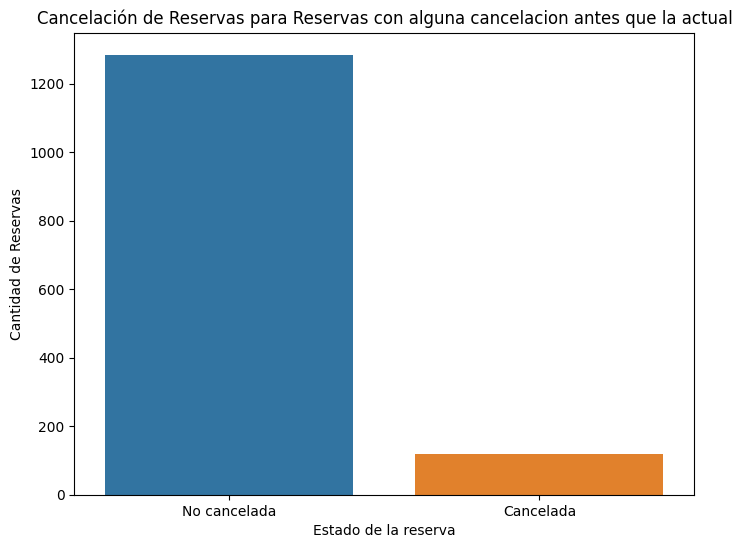

In [211]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_cancelaciones_anteriores, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con alguna cancelacion antes que la actual')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

Dado que no dio el resultado que espera,veamos esas reservas que antes de ella no han sido canceladas

In [212]:
ds_reservas_con_0_cancelaciones_anteriores= ds_hoteles_train_limpio[(ds_hoteles_train_limpio['previous_bookings_not_canceled'] == 0) ]

ds_reservas_con_0_cancelaciones_anteriores['is_canceled'].value_counts()

1    30610
0    28884
Name: is_canceled, dtype: int64

([<matplotlib.axis.XTick at 0x7e6bee4597b0>,
 [Text(0, 0, 'No cancelada'), Text(1, 0, 'Cancelada')])

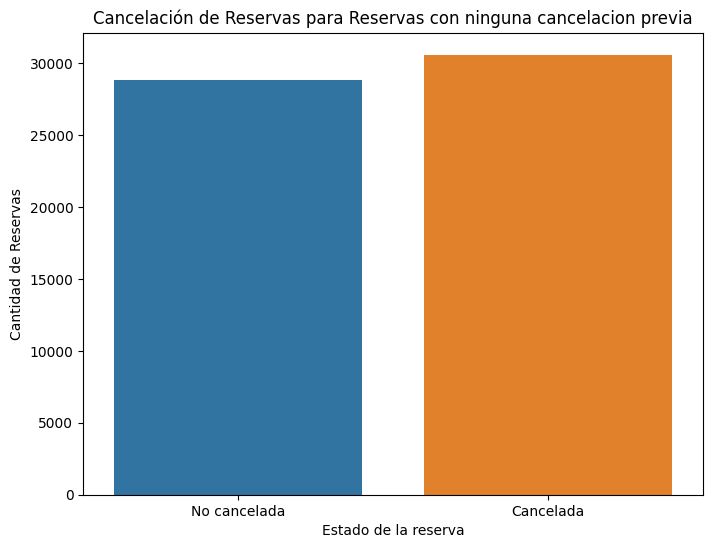

In [213]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_reservas_con_0_cancelaciones_anteriores, x='is_canceled')
plt.xlabel('Estado de la reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Reservas con ninguna cancelacion previa')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

No podemos hallar una conclusion muy importante de los datos obtenidos


## Analisis de valores atipicos

Analicemos el boxplot

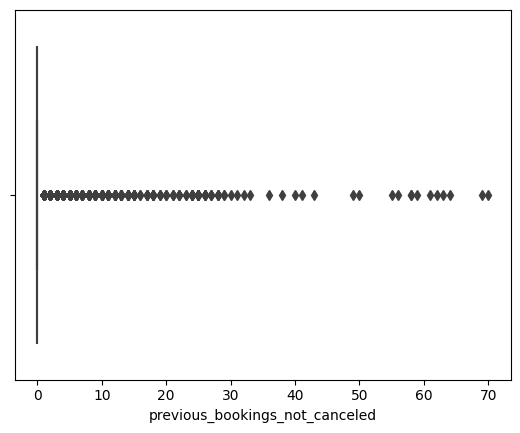

In [278]:

sns.boxplot(x=ds_hoteles_train_limpio["previous_bookings_not_canceled"])
plt.show()

Podemos notar que la mayorias de ellos son outliers ,pero veamos sin el caso del 0 como se comportan

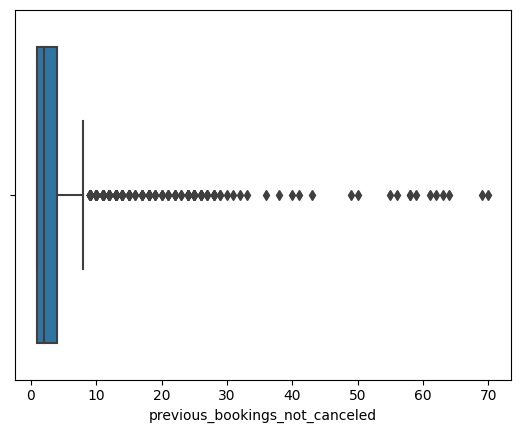

In [279]:
ds_sin_previos_booking = ds_hoteles_train_limpio[ds_hoteles_train_limpio["previous_bookings_not_canceled"] != 0]
sns.boxplot(x=ds_sin_previos_booking["previous_bookings_not_canceled"])
plt.show()

Visualizamos la gran cantidad de outliers presentes en esta variable

In [281]:

# Calcula los cuartiles
Q1 = np.percentile(ds_sin_previos_booking["previous_bookings_not_canceled"], 25)
Q3 = np.percentile(ds_sin_previos_booking["previous_bookings_not_canceled"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


outliers = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["previous_bookings_not_canceled"] < lower_limit) | (ds_hoteles_train_limpio["previous_bookings_not_canceled"] > upper_limit)]

outliers


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
886,City Hotel,26,2016,November,45,2,0,1,1,0.0,...,-1,219.0,0,Transient,88.0,0,1,251eaca1-3fc6-4da5-a916-cd1150228d16,1,Cancelada
1579,City Hotel,190,2016,April,15,9,1,1,2,0.0,...,-1,-1,31,Transient-Party,70.0,0,0,89c0e220-c141-4640-bf2e-6d09b4b5a9da,1,Cancelada
1661,Resort Hotel,0,2017,April,15,11,0,1,1,0.0,...,88.0,-1,0,Transient,45.0,0,0,93e70427-5d1a-444f-969e-2cccd4e69312,0,No Cancelada
1720,City Hotel,3,2016,February,6,1,1,1,1,0.0,...,-1,40.0,0,Transient,66.0,0,0,45096f36-812e-47f3-b6ea-00c9f3b285db,0,No Cancelada
2649,City Hotel,7,2017,May,20,15,1,1,1,0.0,...,-1,40.0,0,Transient,65.0,0,2,7e2d06bc-8f99-460b-a92b-ca5d053c791e,0,No Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60793,Resort Hotel,117,2017,April,15,13,0,3,1,0.0,...,-1,-1,0,Transient,61.5,0,4,aca30dd0-6db4-411a-8f4f-5901ec888841,1,Cancelada
61042,City Hotel,3,2016,April,16,11,1,0,1,0.0,...,-1,40.0,0,Transient,65.0,0,1,fd4f0e5a-e0e5-4c08-90ee-ca442ee630a8,0,No Cancelada
61115,City Hotel,4,2017,May,18,1,1,0,1,0.0,...,-1,40.0,0,Transient,65.0,0,2,897fc748-3627-4e95-99fd-a2d48dceedb0,0,No Cancelada
61142,Resort Hotel,1,2017,January,2,13,1,2,1,0.0,...,-1,390.0,0,Transient,35.0,0,1,87b40726-38c0-4932-96ee-203f88a57447,0,No Cancelada


184 valores son atipicos,pero graficamente se peude notar que hay un conjunto de datos de outliers aun mas atipico,que veremos a continuacion

In [282]:
outliers_severos = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["previous_bookings_not_canceled"] > 30) ]

outliers_severos

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
8152,City Hotel,0,2017,January,1,2,1,2,1,0.0,...,-1,40.0,0,Transient,65.0,0,0,e13aec83-2a2d-454c-992e-cbb62e13d15a,0,No Cancelada
8799,City Hotel,1,2016,July,32,31,2,1,1,0.0,...,-1,40.0,0,Transient,65.0,0,2,486cdaa7-f863-421c-be3f-3e70f5003748,0,No Cancelada
10152,City Hotel,4,2017,May,18,2,0,2,1,0.0,...,-1,40.0,0,Transient,65.0,0,1,da423aa4-31b9-4ab7-9478-dd2d29a2fd2f,0,No Cancelada
15179,City Hotel,5,2016,July,30,18,1,1,1,0.0,...,-1,40.0,0,Transient,65.0,0,2,183ece79-5f49-436c-bd8f-926af4e28320,0,No Cancelada
19562,City Hotel,8,2016,December,52,28,0,2,1,0.0,...,-1,40.0,0,Transient,65.0,0,2,80be3b9f-7bed-45e7-b7e2-30811d8eb1d7,1,Cancelada
20271,City Hotel,4,2017,July,29,16,1,0,1,0.0,...,-1,40.0,0,Transient,65.0,0,1,d6dfe4bb-b14e-45c1-9444-91f90567deba,0,No Cancelada
23465,City Hotel,7,2016,May,22,23,1,2,1,0.0,...,-1,40.0,0,Transient,67.0,1,0,10bb2e71-7a5d-4181-9439-80bdd9f59dd6,0,No Cancelada
24050,City Hotel,6,2016,December,50,8,0,1,1,0.0,...,-1,40.0,0,Transient,67.0,0,2,ee5afca1-02b4-42b5-930d-82666de9c27a,0,No Cancelada
24625,City Hotel,1,2017,January,5,31,0,3,1,0.0,...,-1,40.0,0,Transient,65.0,0,1,1c74f931-9c39-4c4a-baec-46c54296e480,0,No Cancelada
27055,City Hotel,1,2016,September,37,6,0,3,1,0.0,...,-1,40.0,0,Transient,67.0,1,0,abfa0bb1-47eb-48a7-a53d-3b9101a2e896,0,No Cancelada


In [283]:
outliers_severos['is_canceled_cat'].value_counts()

No Cancelada    20
Cancelada        1
Name: is_canceled_cat, dtype: int64

Podemos notar como este conjunto de datos puede ser de gran importancia al momento de la cancelacion, por lo cual estos valores son de gran importancia para el modelo

# 24) Variable TotalOfSpecialRequests
Esta es una variable cuantitiva indica el total de solicitudes especiales de la reserva,veamos como se comporta la variable

## Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [214]:
columna_total_special_request = ds_hoteles_train_limpio['total_of_special_requests']

columna_total_special_request.isna().sum()

0

In [215]:
(columna_total_special_request >= 0).value_counts()

True    60897
Name: total_of_special_requests, dtype: int64

Podemos observar que no hay datos mal cargados y que no hay valores nulos, por lo cual podemos decir que la columna esta bien cargada para el dataset

## Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [216]:
columna_total_special_request.describe()

count    60897.000000
mean         0.521750
std          0.773704
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

Veamos si tiene algun valor faltane que pueda afectar a nuestro futuro analisis

Al no tener valores faltantes sabemos que su promedio es de 0.521068

In [217]:
columna_total_special_request.value_counts()

0    38046
1    15432
2     6100
3     1155
4      144
5       20
Name: total_of_special_requests, dtype: int64

Dado estos datos , vamos a ver como se distribuyen con la variable is_canceled

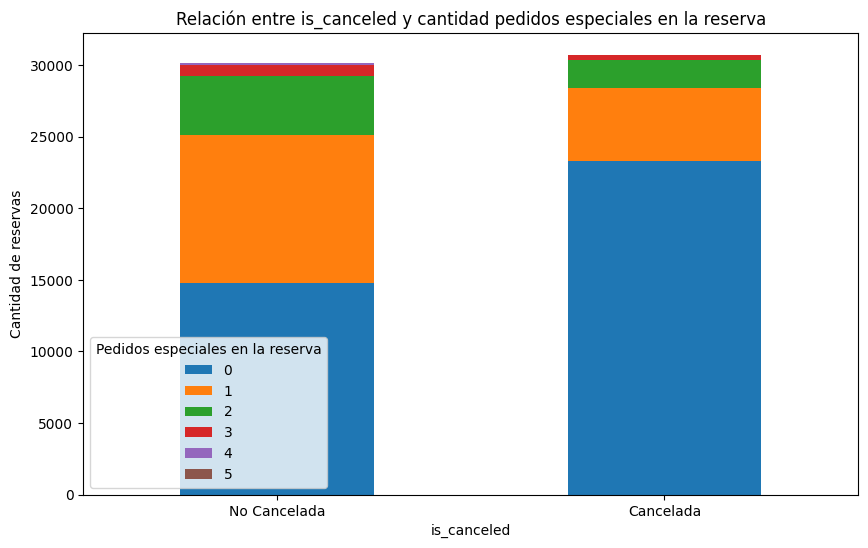

In [218]:

pivot_special_request = ds_hoteles_train_limpio.groupby(['is_canceled', 'total_of_special_requests']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
ax = pivot_special_request.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('is_canceled')
plt.ylabel('Cantidad de reservas')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'], rotation=0)
plt.title('Relación entre is_canceled y cantidad pedidos especiales en la reserva')
plt.legend(title='Pedidos especiales en la reserva')
plt.show()

## Analisis de valores atipicos

Analicemos el boxplot

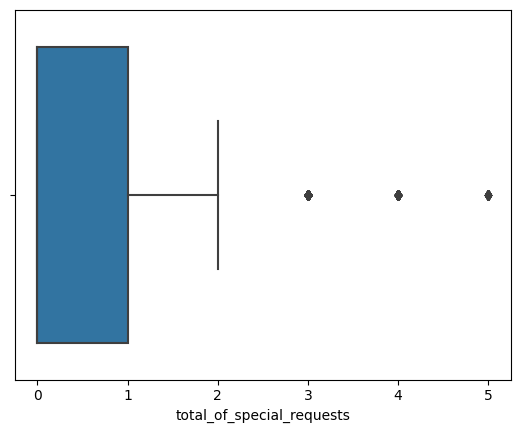

In [219]:
sns.boxplot(x=ds_hoteles_train_limpio["total_of_special_requests"])
plt.show()

Veamos como se comportan los outliers que se pueden visualizar con el grafico

In [220]:
outliers_pedidos_especiales = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["total_of_special_requests"] > 2) ]


outliers_pedidos_especiales

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
32,City Hotel,103,2017,July,27,3,1,2,2,0.0,...,9.0,-1,0,Group,169.20,0,3,d10a486e-f810-4615-bf50-4be077769acb,0,No Cancelada
93,City Hotel,31,2017,August,33,13,1,0,2,1.0,...,9.0,-1,0,Transient,200.00,0,3,84ab1029-8fd8-451f-9cde-06b5f07bd564,0,No Cancelada
341,City Hotel,31,2016,June,27,26,2,4,3,0.0,...,7.0,-1,0,Transient,112.14,0,3,72ed4158-0fa4-44ae-b087-35941b195a1d,1,Cancelada
421,City Hotel,30,2017,April,18,30,1,0,2,0.0,...,9.0,-1,0,Transient,115.00,0,3,6ef9f07a-0ae2-4d01-9188-1ce2c145e61f,0,No Cancelada
423,City Hotel,284,2017,May,21,23,0,5,2,1.0,...,9.0,-1,0,Transient,134.55,0,3,2f68340c-b525-447f-af7e-0e297d45cbbb,1,Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61444,City Hotel,116,2017,May,21,22,1,0,2,0.0,...,14.0,-1,0,Transient,126.00,0,3,24d51325-5b3e-449f-9df8-2318a2543814,0,No Cancelada
61564,City Hotel,56,2015,October,43,21,0,3,2,0.0,...,9.0,-1,0,Contract,103.50,0,3,0704fa28-8be7-47ef-97e4-9d3f68f1b7ec,0,No Cancelada
61702,City Hotel,198,2016,September,39,22,0,3,3,0.0,...,9.0,-1,0,Transient,159.30,0,3,cde265b4-d3c9-4f4c-aebe-914398f772d1,1,Cancelada
61818,City Hotel,252,2016,October,43,19,0,3,2,0.0,...,9.0,-1,0,Transient,85.50,0,3,6f26b6fc-b401-4ab3-8160-3ec3eeb8a2e3,0,No Cancelada


Son 1319 reservas que son consideradas como reservas con pedidos atipicos ,veamos si podemos ver alguna relacion con su respectivas cancelaciones ,si la tienen

In [221]:
outliers_pedidos_especiales['is_canceled'].value_counts()

0    965
1    354
Name: is_canceled, dtype: int64

Podemos notar que se recurre en mayor proporcion a la no cancelacion de las reservas,por lo cual podemos pensar que estos valores nos pueden servir para ver si tienen alguna relacion mas fuerte con la desicion del modelo

# 25) Variable RequiredCardParkingSpaces
En un primer analisis, es una variable del tipo caunitativa . Hace refencia al número de plazas de aparcamiento necesarias por el cliente.
Veamos como se distribuyen los valores


## Limpieza de datos
Al ser una variable cuantitiva, comenzamos por ver si hay valores nulos cargados en el dataset y si hay valores que no tienen sentido para este analisis como valores negativos

In [222]:
columna_parking_spaces = ds_hoteles_train_limpio['required_car_parking_spaces']
columna_parking_spaces.isna().sum()

0

In [223]:
(columna_parking_spaces >= 0).value_counts()

True    60897
Name: required_car_parking_spaces, dtype: int64

Podemos observar que no hay valores faltantes y tambien que no hay valores fuera del rango valido por lo que podemos concluir que la columna esta bien cargada

## Analisis de datos y visualizaciones

In [224]:
columna_parking_spaces.value_counts()

0    57869
1     3014
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

Creare una copia de mi dataset donde dira se dividira si nesecita o no lugar para parking,dado las pocas alternativas que existen asi puedo asociar tambien a un unico valor dado su poco volumen

In [225]:
df_copia_parking = ds_hoteles_train_limpio.copy()

# Reemplazar 0 con 'No Requiere' y 1 o 2 con 'Requiere'
df_copia_parking['required_car_parking_spaces'] = df_copia_meal['required_car_parking_spaces'].replace({0: 'No Requiere', 1: 'Requiere', 2: 'Requiere', 3: "Requiere" , 8 : "Requiere"})


columna_parking_spaces_nueva = df_copia_parking['required_car_parking_spaces']

columna_parking_spaces_nueva.value_counts()

No Requiere    57869
Requiere        3028
Name: required_car_parking_spaces, dtype: int64

Veamos como se comporta con las cancelaciones,sobre todo las que requieren nos importan para ver su comportamiento

In [226]:
ds_parking_requiere = df_copia_parking[df_copia_parking['required_car_parking_spaces'] == 'Requiere']
ds_parking_no_requiere = df_copia_parking[df_copia_parking['required_car_parking_spaces'] == 'No Requiere']

Comenecemos con los que no requiere

In [227]:
ds_parking_no_requiere['is_canceled'].value_counts()

1    30728
0    27141
Name: is_canceled, dtype: int64

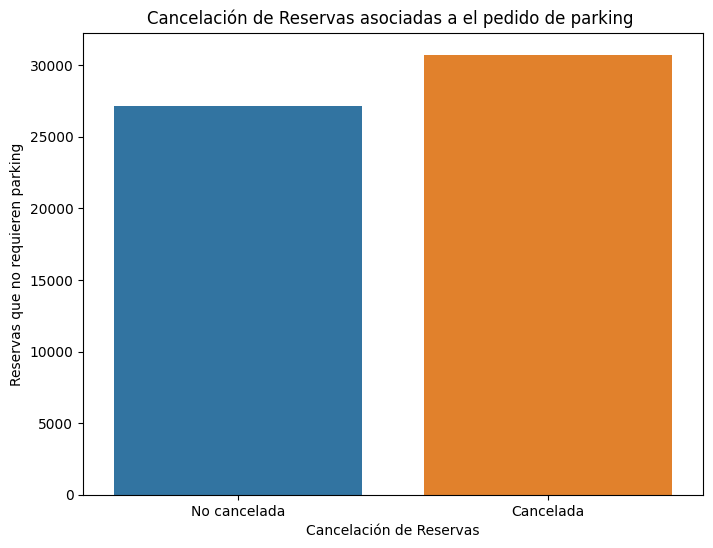

In [228]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_parking_no_requiere, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas que no requieren parking')
plt.title('Cancelación de Reservas asociadas a el pedido de parking ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Existe una mayor cantidad de reservas canceladas ,a simple vista podems notar que no es una gran diferencia,veamos las que si requerian que puede ser una variable mas significativa para el analisis

In [229]:
ds_parking_requiere['is_canceled'].value_counts()

0    3028
Name: is_canceled, dtype: int64

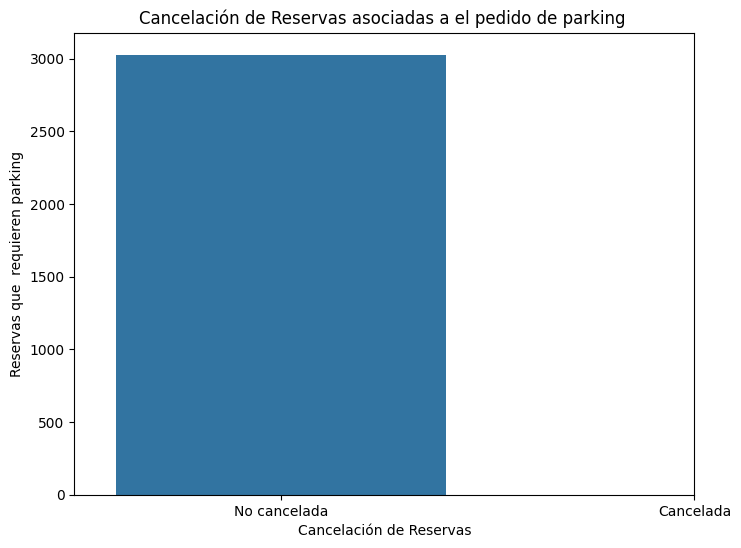

In [230]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_parking_requiere, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas que  requieren parking')
plt.title('Cancelación de Reservas asociadas a el pedido de parking ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Con respecto a las reservas con requerimiento de parking,notamos que ni una de ellas tuvo cancelacion,por lo cual hace que esta variable tenga mucho mas peso en nuestro analisis.
La tasa de cancelación para las reservas que requieren estacionamiento es igual a cero

## Analisis de valores atipicos

Analicemos el boxplot,sin tener en cuenta el caso donde fueron 0,porque sino todos los valores restantes seran atipicos

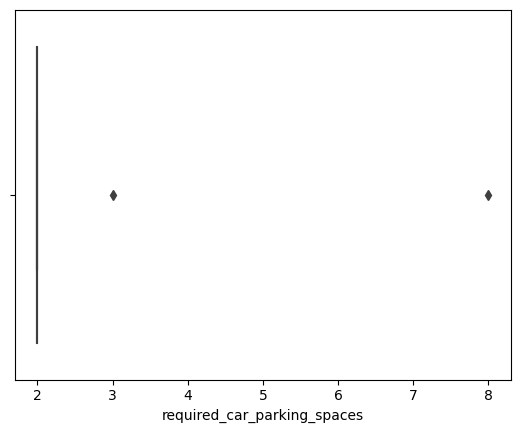

In [231]:
ds_sin_parking= ds_hoteles_train_limpio[ds_hoteles_train_limpio["required_car_parking_spaces"] >1]

sns.boxplot(x=ds_sin_parking["required_car_parking_spaces"])
plt.show()

Sin incluir al 0 ya podemos ver que los valores 3 y 8 son valores atipicos,por lo cual analicemos a ellos

Donde se deberia comprender a los valores > 10 como outliers severos ,veamos como se comportan ellos

In [232]:
outliers_parking = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["required_car_parking_spaces"] > 2) ]


outliers_parking

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
8269,Resort Hotel,138,2017,March,12,19,2,2,2,0.0,...,-1,-1,122,Transient-Party,80.0,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0,No Cancelada
13713,Resort Hotel,205,2017,June,26,26,3,10,2,0.0,...,250.0,-1,0,Transient,111.0,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0,No Cancelada


Los dos casos no fueron cancelados,por lo cual podemos utilizarlos para poder mejorar nuestro modelo predictivo,ya que si nesecitan mas de 2 lugares de estacionamientos,no suelen cancelar.

Vamos a visualizar ya que no tenemos mucho para decir de manera univariada,que pasa si vemos como se comporta con la variable adults

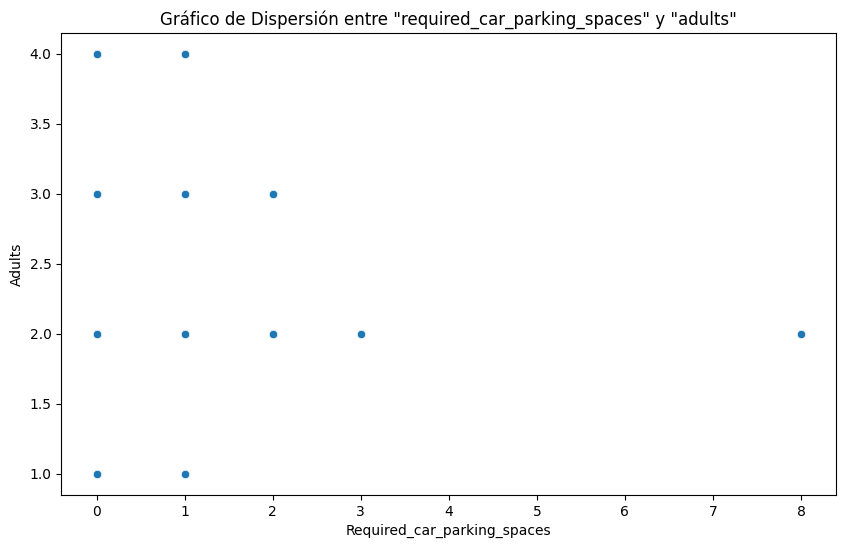

In [233]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds_hoteles_train_limpio, x='required_car_parking_spaces', y='adults')
plt.title('Gráfico de Dispersión entre "required_car_parking_spaces" y "adults"')
plt.xlabel('Required_car_parking_spaces')
plt.ylabel('Adults')
plt.show()

Podemos notar como la reserva que requiere 8 espacios en forma multivariada tambien es un outlier severo,ya que son 2 adultos para 8 espacios de parking;lo que nos hace pensar que esa reserva puede que no se tenga en cuenta

# 26 y 27) Variable StaysInWeekNights y StaysInWeekendNights

## Stays-in-week-nights

Es una variable cuantitativa que describe el número de noches entre semana (de lunes a viernes)que el huésped se quedó o reservó su estadía en el hotel.
Vamos a buscar una posible relación entre esta variable con la variable "is_canceled".

### Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [234]:
columna_weekNights = ds_hoteles_train_limpio['stays_in_week_nights']

columna_weekNights.isna().sum()

0

In [235]:
(columna_weekNights >= 0).value_counts()

True    60897
Name: stays_in_week_nights, dtype: int64

Podemos observar que no hay valores faltantes y tambien que no hay valores fuera del rango valido por lo que podemos concluir que la columna esta bien cargada

### Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [236]:
columna_weekNights.describe()

count    60897.000000
mean         2.528351
std          1.880587
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

Veamos en un grafico estos datos

Text(0.5, 1.0, 'Boxplot Stays in week nights')

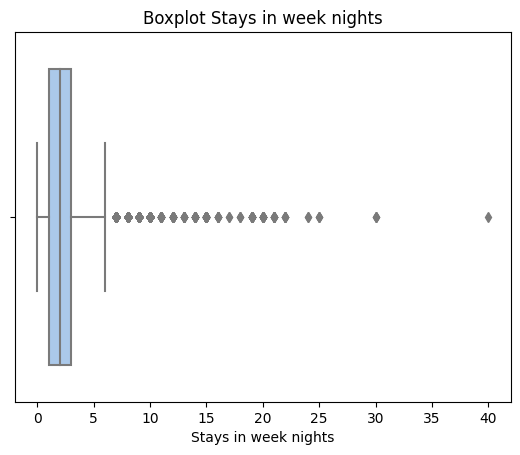

In [237]:
sns.boxplot(x = columna_weekNights, palette = "pastel")
plt.xlabel('Stays in week nights')

plt.title("Boxplot Stays in week nights")

Podemos notar que existen valores que son atipicos en un analisis univariado,tanto el caso del valor 30 y 40 podemos notar que estan muy alejados del Boxplot

Analicemos variando si las reservas fueron canceladas o no,sin tener en cuenta esas reservas que su valor es 0(no tienen reservas en dia de semana)

In [238]:
reservas_canceladas = ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_canceled'] == 1]
reservas_no_canceladas = ds_hoteles_train_limpio[ds_hoteles_train_limpio['is_canceled'] == 0]

In [239]:
columna_reservas_canceladas_noches_semana = reservas_canceladas['stays_in_week_nights']

columna_reservas_canceladas_noches_semana = columna_reservas_canceladas_noches_semana[columna_reservas_canceladas_noches_semana != 0]

columna_reservas_canceladas_noches_semana.value_counts()

2     10304
1      6827
3      5910
5      2728
4      2423
6       403
7       229
10      200
8       156
9        66
15       33
14       21
11       20
12       19
19       17
20       12
16        9
21        9
22        6
13        5
18        3
17        2
24        2
40        1
30        1
Name: stays_in_week_nights, dtype: int64

In [240]:
columna_reservas_canceladas_noches_semana.describe()

count    29406.000000
mean         2.682990
std          1.848181
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

Podemos ver que :


* Hay un total de 29406 reservas canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas canceladas es aproximadamente 2 a 3 noches.

*   La desviación estándar es aproximadamente 1.84, lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.




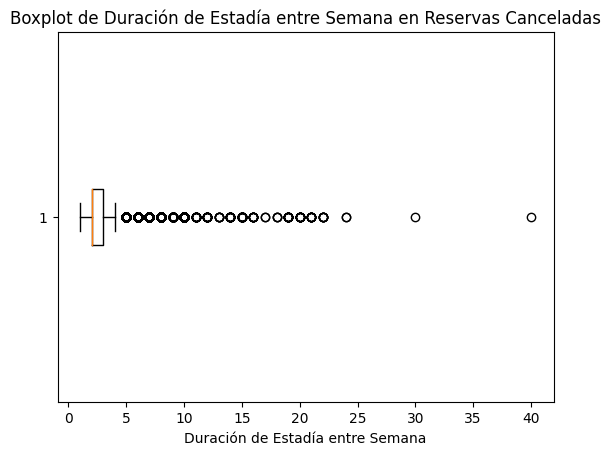

In [241]:
plt.boxplot(columna_reservas_canceladas_noches_semana, vert=False)


plt.xlabel('Duración de Estadía entre Semana')
plt.title('Boxplot de Duración de Estadía entre Semana en Reservas Canceladas')

plt.show()

Veamos respecto de las no canceladas

In [242]:
columna_reservas_no_canceladas_noches_semana = reservas_no_canceladas['stays_in_week_nights']

columna_reservas_no_canceladas_noches_semana = columna_reservas_no_canceladas_noches_semana[columna_reservas_no_canceladas_noches_semana != 0]

columna_reservas_no_canceladas_noches_semana.value_counts()

1     8305
2     7559
3     5597
5     2904
4     2507
6      386
10     305
7      295
8      185
9       54
15      15
12       9
20       8
11       6
13       6
19       6
25       3
30       2
14       2
Name: stays_in_week_nights, dtype: int64

In [243]:
columna_reservas_no_canceladas_noches_semana.describe()

count    28154.000000
mean         2.666513
std          1.811176
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: stays_in_week_nights, dtype: float64

Podemos ver que :


* Hay un total de 28154reservas no canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 2.66 noches.

*   La desviación estándar es aproximadamente 1.81, lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.

Los datos son muy similares a los que la reserva fue cancelada




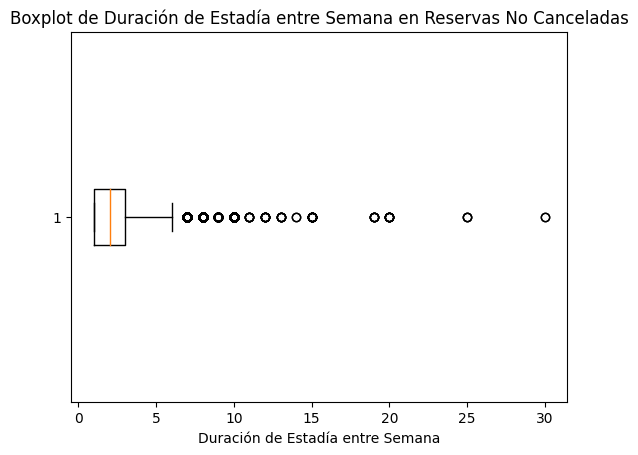

In [244]:
plt.boxplot(columna_reservas_no_canceladas_noches_semana, vert=False)


plt.xlabel('Duración de Estadía entre Semana')
plt.title('Boxplot de Duración de Estadía entre Semana en Reservas No Canceladas')

plt.show()

### Analisis de valores atipicos

Analicemos el boxplot

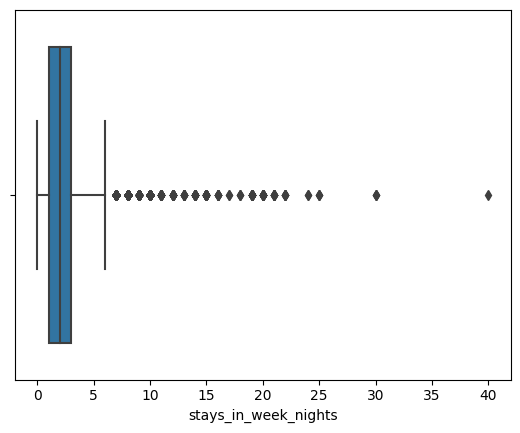

In [245]:
sns.boxplot(x=ds_hoteles_train_limpio["stays_in_week_nights"])
plt.show()

Analicemos en forma univariada

In [246]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["stays_in_week_nights"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["stays_in_week_nights"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifica los outliers en el DataFrame
outliers = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["stays_in_week_nights"] < lower_limit) | (ds_hoteles_train_limpio["stays_in_week_nights"] > upper_limit)]

upper_limit


6.0

El limite superior se encuentra en 6,por lo cual aquellos valores que se encuentran por arriba de ese valor son considerados outliers

In [247]:
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
6,Resort Hotel,112,2015,November,46,12,4,9,2,0.0,...,314.0,-1,0,Contract,66.42,0,1,c7e59753-c8a7-42eb-977b-f0ffaf1716eb,0,No Cancelada
94,City Hotel,191,2017,June,24,17,4,8,2,0.0,...,9.0,-1,0,Transient,130.50,0,1,fb3af24b-c5a4-4830-afb4-fa01a2627873,1,Cancelada
169,City Hotel,14,2016,March,10,4,2,7,2,0.0,...,9.0,-1,0,Transient,132.33,0,0,57545b14-3f84-4c08-88ec-ba8db03150a2,1,Cancelada
191,City Hotel,237,2017,July,27,3,3,8,2,0.0,...,9.0,-1,0,Transient,107.10,0,2,62cd4d63-8d67-48de-b69a-ddcb2e97de92,1,Cancelada
194,Resort Hotel,37,2015,August,35,24,3,7,2,0.0,...,175.0,-1,0,Transient,133.76,0,0,4f7c00c2-abf3-49c1-835b-bb7f05e6ca61,0,No Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61747,Resort Hotel,321,2017,March,10,8,4,10,2,0.0,...,240.0,-1,0,Transient,66.60,0,1,4df87107-4266-4829-ab48-4ad6b2c23db4,1,Cancelada
61750,City Hotel,64,2017,March,11,15,2,8,1,0.0,...,8.0,-1,0,Transient,100.30,0,1,43cbc189-fd56-4397-a7e2-726a452b2f0f,1,Cancelada
61840,Resort Hotel,31,2015,November,45,2,5,11,1,0.0,...,281.0,-1,0,Transient-Party,40.00,0,0,32eeaf87-a22e-45fa-a019-6e98c3dea3b1,1,Cancelada
61865,Resort Hotel,153,2015,September,38,17,4,10,2,0.0,...,243.0,-1,0,Contract,61.65,0,0,9ce8aa7f-e944-4e81-9000-fff58e98aedf,0,No Cancelada


1707 valores de estadias en dias de semana ,lo cual ,segun el conteto,podemos decir que ningun valor puede ser considerado 'atipico' en reservas de hotel

Veamos como se comportan los outliers mas severos del boxplot,es decir aquellos que su valor supera los 20

In [248]:
outliers_severos = ds_hoteles_train_limpio[ (ds_hoteles_train_limpio["stays_in_week_nights"] >20 )]

outliers_severos

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
5295,Resort Hotel,182,2017,March,9,1,8,22,2,2.0,...,240.0,-1,0,Transient,130.00,0,1,9cd638c4-6217-4870-b5ef-d0e82f322bfb,1,Cancelada
6423,City Hotel,9,2017,January,4,27,8,21,3,0.0,...,9.0,-1,0,Transient,133.36,0,1,73e4b997-45b7-4a5c-9a90-0b6824bc1e7d,1,Cancelada
9229,Resort Hotel,13,2016,April,18,25,9,24,2,0.0,...,-1,110.0,0,Transient,77.00,0,0,78c96b33-4f25-4f97-81d5-f63b0d64a201,1,Cancelada
12477,Resort Hotel,73,2017,January,4,27,8,21,1,0.0,...,240.0,-1,0,Transient,37.83,0,1,c2cbf793-facc-40c6-b43c-0103e0a4fe13,1,Cancelada
14236,City Hotel,25,2015,November,49,30,9,24,2,0.0,...,-1,-1,0,Transient,98.33,0,0,ed391057-b6cd-4c4b-a380-ec3180dbd9ec,1,Cancelada
20153,City Hotel,13,2016,February,6,3,8,21,1,0.0,...,9.0,-1,0,Transient,75.36,0,0,380cfe73-11ca-4635-9cb2-99ec045252d5,1,Cancelada
22599,City Hotel,21,2016,January,2,8,8,22,2,0.0,...,-1,-1,0,Transient,52.50,0,0,fd6689b5-da43-481d-8784-4609df3c2fc6,1,Cancelada
30395,Resort Hotel,88,2017,January,4,24,10,25,2,0.0,...,-1,-1,0,Transient,41.47,0,1,a6f87f57-82f7-451f-b0bc-3112263ff6d0,0,No Cancelada
31310,Resort Hotel,322,2017,January,2,10,16,40,2,0.0,...,8.0,-1,0,Transient,25.50,0,0,038d2833-ef4d-4678-8952-873dfd5ea166,1,Cancelada
31408,Resort Hotel,59,2016,November,46,12,9,21,1,0.0,...,240.0,-1,0,Transient,37.70,0,1,67a9a1cd-79eb-4c8a-9b53-5ff724fbe92b,1,Cancelada


In [249]:
outliers_severos['is_canceled'].value_counts()

1    19
0     5
Name: is_canceled, dtype: int64

Podemos notar que a mayor cantidad de dias,tienden a cancelar la reserva por lo cual es importante tener estos datos en el analisis

## StaysInWeekendNights
Es una variable cuantiativa que describe el número de noches en el fin de semana (sabados y domingos)que el huésped se quedó o reservó su estadía
en el hotel.
Vamos a separar el analisis en base de si cancelaron o no la reserva

### Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [250]:
columna_weekendNights = ds_hoteles_train_limpio['stays_in_weekend_nights']

columna_weekendNights.isna().sum()

0

In [251]:
(columna_weekendNights >= 0).value_counts()

True    60897
Name: stays_in_weekend_nights, dtype: int64

Podemos observar que no hay valores faltantes y tambien que no hay valores fuera del rango valido por lo que podemos concluir que la columna esta bien cargada

### Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [252]:
columna_weekendNights.describe()

count    60897.000000
mean         0.931836
std          0.993559
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

Veamos en un grafico estos datos

Text(0.5, 1.0, 'Boxplot Stays in weekend nights')

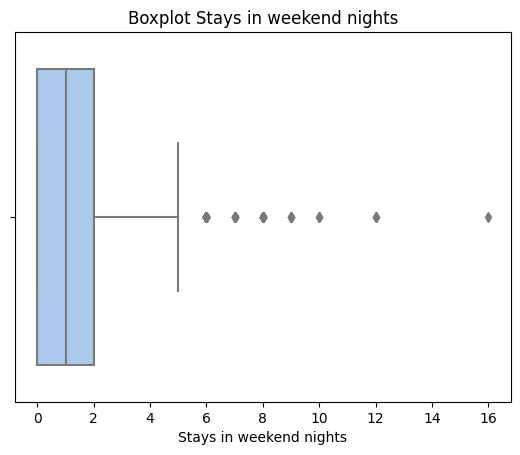

In [253]:
sns.boxplot(x = columna_weekendNights, palette = "pastel")
plt.xlabel('Stays in weekend nights')

plt.title("Boxplot Stays in weekend nights")

In [254]:
columna_reservas_canceladas_noches_fin_de_semana = reservas_canceladas['stays_in_weekend_nights']

columna_reservas_canceladas_noches_fin_de_semana = columna_reservas_canceladas_noches_fin_de_semana[columna_reservas_canceladas_noches_fin_de_semana != 0]

columna_reservas_canceladas_noches_fin_de_semana.value_counts()

2     8666
1     7718
4      409
3      313
6       59
5       28
8       26
7       12
9        5
10       1
16       1
12       1
Name: stays_in_weekend_nights, dtype: int64

In [255]:
columna_reservas_canceladas_noches_fin_de_semana.describe()

count    17239.000000
mean         1.652880
std          0.785161
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

Podemos ver que :


* Hay un total de 17239 reservas canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 1  a 2 noches.

*   La desviación estándar es aproximadamente 0,78 , lo que indica una dispersión moderada alrededor de la media. Esto sugiere que las duraciones de estadía entre semana varían, pero no de manera extremadamente amplia.

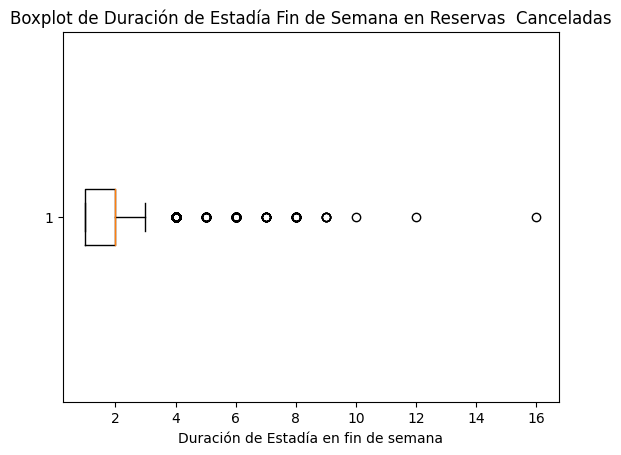

In [256]:
plt.boxplot(columna_reservas_canceladas_noches_fin_de_semana,vert= False)

plt.xlabel('Duración de Estadía en fin de semana')
plt.title('Boxplot de Duración de Estadía Fin de Semana en Reservas  Canceladas')

plt.show()

Veamos las no canceladas

In [257]:
columna_reservas_no_canceladas_noches_fin_de_semana = reservas_no_canceladas['stays_in_weekend_nights']
columna_reservas_no_canceladas_noches_fin_de_semana = columna_reservas_no_canceladas_noches_fin_de_semana[columna_reservas_no_canceladas_noches_fin_de_semana != 0]

columna_reservas_no_canceladas_noches_fin_de_semana.value_counts()

2     8464
1     7974
4      519
3      314
6       23
5       14
8        8
10       2
12       2
7        1
9        1
Name: stays_in_weekend_nights, dtype: int64

In [258]:
columna_reservas_no_canceladas_noches_fin_de_semana.describe()

count    17322.000000
mean         1.630989
std          0.728374
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: stays_in_weekend_nights, dtype: float64

Podemos ver que :


* Hay un total de 17322 reservas no canceladas en el conjunto de datos
*  La duración promedio de las estadías entre semana en reservas no canceladas es aproximadamente 1 a 2 noches.

*   La desviación estándar es aproximadamente 0.72, lo que indica una dispersión moderada alrededor de la media.

Los datos son muy similares a los que la reserva fue cancelada

Por ultimo juntaremos las dos variables para poder ver como varia las cancelaciones con la cantidad de dias totales.La hipotesis es que a medida que las estadias,son de menores dias,hay mas probabilidad de que se cancelen,dado que pueden ser reservas por trabajo y las que tienen mas dias conllevan a una planificacion mas concreta

Juntemos las variables en una copia



### Analisis de valores atipicos

Analicemos el boxplot

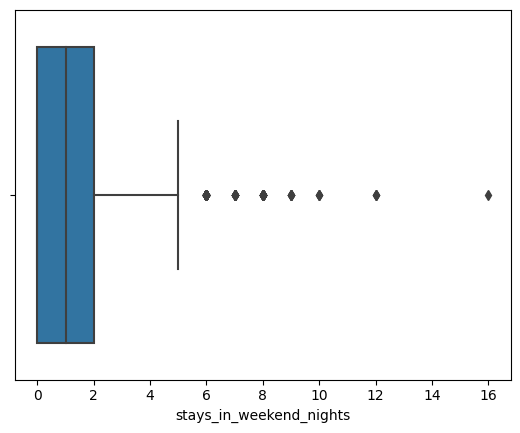

In [259]:
sns.boxplot(x=ds_hoteles_train_limpio["stays_in_weekend_nights"])
plt.show()

Analicemos en forma univariada

In [260]:

# Calcula los cuartiles
Q1 = np.percentile(ds_hoteles_train_limpio["stays_in_weekend_nights"], 25)
Q3 = np.percentile(ds_hoteles_train_limpio["stays_in_weekend_nights"], 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcula los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifica los outliers en el DataFrame
outliers = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["stays_in_weekend_nights"] < lower_limit) | (ds_hoteles_train_limpio["stays_in_weekend_nights"] > upper_limit)]

upper_limit


5.0

El limite superior se encuentra en 5,por lo cual aquellos valores que se encuentran por arriba de ese valor son considerados outliers

In [261]:
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
454,Resort Hotel,181,2017,March,9,1,6,19,2,0.0,...,440.0,-1,0,Transient-Party,58.60,0,0,d24d57c2-23a1-4a34-b634-451e7db42031,1,Cancelada
1321,Resort Hotel,162,2016,March,10,4,6,15,2,0.0,...,96.0,-1,0,Transient,82.00,0,0,d738b2cd-178c-4f0c-a26f-6ebcb1c0e971,1,Cancelada
1433,City Hotel,9,2016,January,5,28,6,17,1,0.0,...,9.0,-1,0,Transient,68.23,0,1,611c14b4-1751-4f6b-8a07-ab9270a29cc5,1,Cancelada
1930,Resort Hotel,203,2016,July,29,16,6,12,2,2.0,...,240.0,-1,0,Transient,204.44,0,0,1428c0a0-9774-41f6-ad72-a110db5fe380,1,Cancelada
2963,Resort Hotel,194,2017,April,15,15,6,15,2,0.0,...,-1,-1,0,Transient,47.50,0,2,07291cee-a8f4-4be5-8987-cb19a1905ffb,0,No Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,Resort Hotel,192,2017,January,2,14,10,25,2,0.0,...,6.0,-1,0,Transient,34.00,0,0,817e4b07-d56f-41d5-ac78-dc9f1ead3e35,0,No Cancelada
60607,Resort Hotel,172,2016,January,3,12,8,20,2,0.0,...,314.0,-1,0,Contract,25.92,0,1,658bcc42-6c75-495c-9dca-08ba526a7388,0,No Cancelada
61043,City Hotel,65,2016,November,47,19,8,21,2,2.0,...,9.0,-1,0,Transient,171.30,0,0,5bc1e9ec-7947-41ea-8c0f-b82e13675ac5,1,Cancelada
61044,Resort Hotel,98,2017,February,6,8,6,15,2,0.0,...,96.0,-1,0,Transient,37.80,0,0,11f019dd-f851-44fe-ad89-1070dab12a4b,1,Cancelada


142 valores de estadias en dias de fin de semana ,lo cual ,segun el conteto,podemos decir que ningun valor puede ser considerado 'atipico' en reservas de hotel

Veamos como se comportan los outliers mas severos del boxplot,es decir aquellos que su valor supera los 8

In [262]:
outliers_severos = ds_hoteles_train_limpio[ (ds_hoteles_train_limpio["stays_in_weekend_nights"] >8  )]

outliers_severos

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
3855,City Hotel,123,2017,January,3,15,10,20,3,0.0,...,9.0,-1,0,Transient,140.00,0,0,37701593-dc47-40a3-ba09-fdcf7d769807,1,Cancelada
9229,Resort Hotel,13,2016,April,18,25,9,24,2,0.0,...,-1,110.0,0,Transient,77.00,0,0,78c96b33-4f25-4f97-81d5-f63b0d64a201,1,Cancelada
14236,City Hotel,25,2015,November,49,30,9,24,2,0.0,...,-1,-1,0,Transient,98.33,0,0,ed391057-b6cd-4c4b-a380-ec3180dbd9ec,1,Cancelada
18816,City Hotel,12,2016,February,6,1,9,20,1,0.0,...,9.0,-1,0,Transient,63.03,0,1,91e10607-79da-461a-8445-45b9641be0fe,1,Cancelada
30395,Resort Hotel,88,2017,January,4,24,10,25,2,0.0,...,-1,-1,0,Transient,41.47,0,1,a6f87f57-82f7-451f-b0bc-3112263ff6d0,0,No Cancelada
31310,Resort Hotel,322,2017,January,2,10,16,40,2,0.0,...,8.0,-1,0,Transient,25.50,0,0,038d2833-ef4d-4678-8952-873dfd5ea166,1,Cancelada
31408,Resort Hotel,59,2016,November,46,12,9,21,1,0.0,...,240.0,-1,0,Transient,37.70,0,1,67a9a1cd-79eb-4c8a-9b53-5ff724fbe92b,1,Cancelada
43667,Resort Hotel,242,2017,February,7,17,12,30,2,0.0,...,75.0,-1,0,Transient,35.70,0,1,2f056266-b2fd-4c10-a9ff-68feb0d34c86,0,No Cancelada
47601,City Hotel,3,2016,November,47,14,9,25,2,0.0,...,-1,368.0,0,Transient,93.00,0,0,69be83f5-cc78-4e76-829f-18884fc31698,0,No Cancelada
54391,Resort Hotel,122,2016,January,3,12,12,30,2,0.0,...,8.0,-1,0,Transient,22.11,0,0,636407b0-94e4-48b4-8d53-aa622249d3ea,1,Cancelada


In [263]:
outliers_severos['is_canceled'].value_counts()

1    8
0    5
Name: is_canceled, dtype: int64

No existe una gran relacion entre los valores y sus posibles cancelaciones,aun asi ,son posibles valores por lo cual vamos a dejarlos en nuestro analisis



---

# 28) Variable Previous Cancellations

Esta es una columna cuantitativa que hace referencia a la cantidad de cancelaciones previas hechas por algun usuario con un perfil asociado previa a la reserva registrada en el dataset. Si no habia ningun perfil asociado a ese usuario este valor se setea en 0.



## Limpieza de datos
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay valores negativos cargados, ya que no tendrian sentido para el contexto de la columna

In [264]:
validacion_previous_cancelations = ds_hoteles_train_limpio["previous_cancellations"] >= 0
validacion_previous_cancelations.value_counts()

True    60897
Name: previous_cancellations, dtype: int64

In [265]:
ds_hoteles_train_limpio["previous_cancellations"].isna().sum()

0

Podemos observar que las todas los valores de esta columna estan dentro de un rango valido. Por lo que procedemos a hacer una analisis de la distribucion de los valores

## Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

In [266]:
ds_hoteles_train_limpio["previous_cancellations"].describe()

count    60897.000000
mean         0.114981
std          0.999531
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

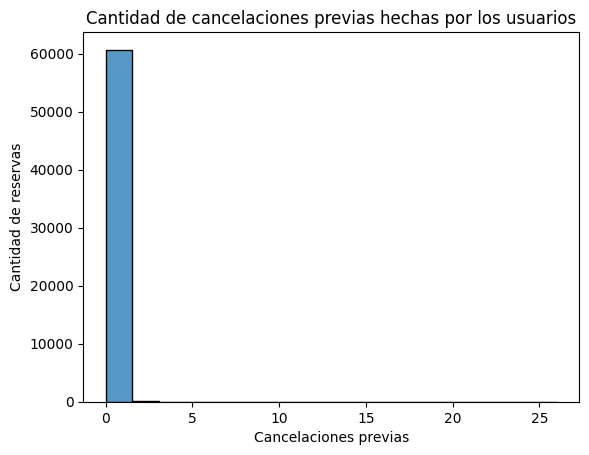

In [267]:
sns.histplot(data = ds_hoteles_train_limpio, x = "previous_cancellations")
plt.xlabel('Cancelaciones previas')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de cancelaciones previas hechas por los usuarios')
plt.show()

Podemos observar que la amplia mayoria de los usuarios registrados en el dataset no han hecho cancelaciones previas. A primera vista no parece una variable que podria llegar a determinar si una reserva va a ser cancelada o no. Observemos mas detalladamente aquellos usuarios que si han hecho cancelaciones previas

In [268]:
ds_cancelaciones_mayores_a_0 = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio["previous_cancellations"] > 0 ]
ds_cancelaciones_mayores_a_0.shape

(4342, 32)

In [269]:
ds_cancelaciones_mayores_a_0["is_canceled_cat"].value_counts()

Cancelada       4144
No Cancelada     198
Name: is_canceled_cat, dtype: int64

Si bien es un caso mas particular, podemos concluir que si un usuario ha hecho previas cancelaciones, es probable que cancele la reserva del hotel

## Analisis de valores atipicos

Analicemos el boxplot,sin tener en cuenta el caso donde fueron 0

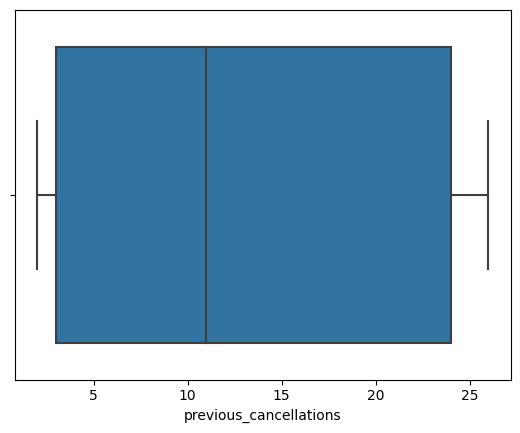

In [270]:
ds_sin_cancelaciones= ds_hoteles_train_limpio[ds_hoteles_train_limpio["previous_cancellations"] >1]

sns.boxplot(x=ds_sin_cancelaciones["previous_cancellations"])
plt.show()

Analicemos en forma univariada,que sin tener en cuenta el valor 0 ,no se hallan problemas de outliers ,pero veamos como aparecen si lo incluimos

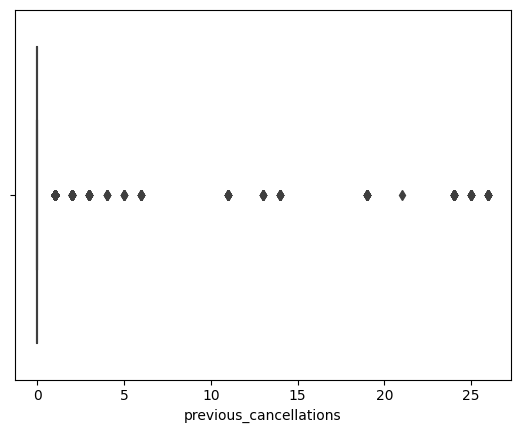

In [271]:
sns.boxplot(x=ds_hoteles_train_limpio["previous_cancellations"])
plt.show()

Donde se deberia comprender a los valores > 10 como outliers severos ,veamos como se comportan ellos

In [272]:
outliers_cancelaciones = ds_hoteles_train_limpio[(ds_hoteles_train_limpio["previous_cancellations"] > 10) ]


outliers_cancelaciones

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,is_canceled_cat
152,Resort Hotel,275,2015,October,41,4,2,0,2,0.0,...,208.0,-1,0,Transient,50.00,0,0,352851e7-02ef-4ef5-8a89-9d0c0e981140,1,Cancelada
337,Resort Hotel,244,2015,September,36,3,0,3,2,0.0,...,-1,-1,0,Transient,36.00,0,0,6b53c345-eaa8-4bc9-8688-024b97948899,1,Cancelada
802,Resort Hotel,275,2015,October,41,4,2,0,2,0.0,...,208.0,-1,0,Transient,50.00,0,0,26530ece-101b-4ff1-8710-23bec5d71c32,1,Cancelada
1579,City Hotel,190,2016,April,15,9,1,1,2,0.0,...,-1,-1,31,Transient-Party,70.00,0,0,89c0e220-c141-4640-bf2e-6d09b4b5a9da,1,Cancelada
1640,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,252.0,-1,0,Transient,49.95,0,0,ed2a9766-b46e-4259-8c92-8e5d24118d55,1,Cancelada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59002,Resort Hotel,244,2015,September,36,3,0,3,2,0.0,...,-1,-1,0,Transient,36.00,0,0,5476618c-ab59-47f0-af30-fc932b124f60,1,Cancelada
59717,Resort Hotel,265,2015,September,39,24,1,3,2,0.0,...,183.0,-1,0,Transient,89.20,0,0,79c50ac4-e731-4d47-a406-0d3b834d320e,1,Cancelada
59761,Resort Hotel,244,2015,September,36,2,2,5,2,0.0,...,96.0,-1,0,Transient-Party,8.00,0,0,5d0ccc3e-57ed-450a-9508-4dea33090dd0,1,Cancelada
59879,City Hotel,1,2015,December,52,24,0,1,2,0.0,...,-1,-1,0,Transient,55.00,0,0,168792b3-522a-4dd2-bed5-7c8fcf12e1c5,1,Cancelada


Son 125 casos los outliers severos,pero dentro de los otros casos pasan a ser insignificantes en cantidad,por lo cual los dejaremos .



---

# 29) Variable Reserved Room Type


Esta es una variable cualitativa(categórica), y como su nombre indica, hace referencia a el código del tipo de habitación reservada.

## Limpieza de datos (Revisar relacion con assigned room type y preguntar a los correctores)
Empezamos por ver si hay valores nulos cargados en el dataset, ver la cantidad de variables que puede tomar y si no hay datos mal cargados

In [273]:
columna_reserved_room_type = ds_hoteles_train_limpio['reserved_room_type']

columna_reserved_room_type.value_counts()

A    44470
D     9508
E     3194
F     1413
G     1049
C      472
B      456
H      334
L        1
Name: reserved_room_type, dtype: int64

In [274]:
columna_room_type = ds_hoteles_train_limpio['assigned_room_type']

columna_room_type.value_counts()

A    39582
D    12055
E     3723
F     1765
G     1234
C     1104
B      933
H      380
K       60
I       60
L        1
Name: assigned_room_type, dtype: int64

In [275]:
columna_reserved_room_type.isna().sum()

0

Ya que no tiene ningun valor nulo,veamos como se distribuyen las cancelaciones con los distintos tipos de habitacion

## Analisis de datos y visualizaciones
Comenzamos por observar las metricas de la variable y hacer un analisis mas profundo

Notamos que la mayoria de las reservas esta asociada al tipo de habitacion 'A'

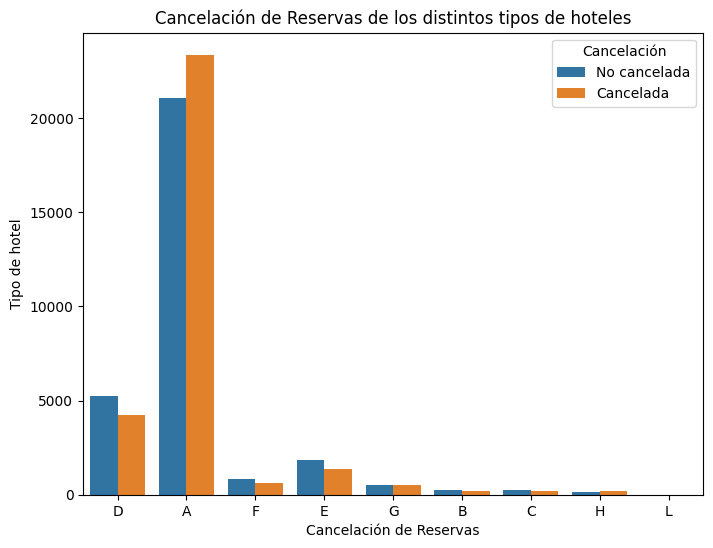

In [276]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_hoteles_train_limpio, x='reserved_room_type' , hue= 'is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Tipo de hotel')
plt.title('Cancelación de Reservas de los distintos tipos de hoteles')
plt.legend(title='Cancelación', labels=['No cancelada', 'Cancelada'])
plt.show()

Dada la informacion que nos proporciona el grafico,las reservas canceladas por el tipo de hotel,tienen una varianza significativa,no se encuentra a simple vista ningun patron significativo para poder declarar una hipotesis



---


#B) Correlación entre variables

En esta sección analizaremos correlaciones entre distintas variables, a partir del análisis que hicimos en la sección anterior.

In [277]:
# Heatmap de correlación para todas las variables
correlation_matrix = ds_hoteles_train_limpio_limpio.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación para Todas las Variables")
plt.show()

NameError: ignored

### Relación entre 'lead_time' y 'is_canceled':

Veamos como se comporta lead time ,dado si una reserva se cancelo o no.

Analizaremos si el tiempo de anticipación con el que se realiza una reserva (lead_time) está relacionado con la probabilidad de cancelación. Es posible que las reservas de última hora tengan una mayor probabilidad de ser canceladas.



In [ ]:
plt.scatter(ds_hoteles_train_limpio_limpio['lead_time'], ds_hoteles_train_limpio_limpio['is_canceled'], color='blue', alpha=0.5)
plt.xlabel('Lead Time')
plt.ylabel('Is Canceled')
plt.show()

Veamos en otro grafico

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(ds_hoteles_train_limpio_limpio[ds_hoteles_train_limpio_limpio['is_canceled'] == 0]['lead_time'], label='No Cancelada',  color='blue')
sns.histplot(ds_hoteles_train_limpio_limpio[ds_hoteles_train_limpio_limpio['is_canceled'] == 1]['lead_time'], label='Cancelada',  color='red')


plt.title('Distribución de lead_time por categoría de is_canceled')
plt.xlabel('Lead Time')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría')


plt.show()

Metodo de regresion logistica:


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = ds_hoteles_train_limpio_limpio[['lead_time']]
y_train = ds_hoteles_train_limpio_limpio['is_canceled']

X_test = ds_hoteles_test[['lead_time']]


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


beta_0 = model.intercept_
beta_1 = model.coef_[0, 0]


x = np.arange(0, 600, 1)
sigmoid = 1 / (1 + np.exp(-(beta_1 * x + beta_0)))

plt.plot(x, sigmoid,  color='red')


plt.scatter(X_train, y_train, c=y_train, cmap='viridis', marker='.')
plt.xlabel("lead_time")
plt.ylabel("is_canceled")
plt.legend()
plt.show()


##Correlacion entre variables assigned room type y reserved room type


In [ ]:
tabla=pd.crosstab(ds_hoteles_train['assigned_room_type'], ds_hoteles_train['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

In [ ]:
tabla=pd.crosstab(ds_hoteles_train['reserved_room_type'], ds_hoteles_train['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

In [ ]:
reservas_con_misma_habitacion_asignada_y_reservada = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['assigned_room_type'] == ds_hoteles_train_limpio['reserved_room_type']]

reservas_con_misma_habitacion_asignada_y_reservada.shape

Observamos que la gran mayoria de reservas(casi 55000), tuvieron el mismo tipo de habitacion asignada y reservada. Ahora, vamos a observar en un heatmap cual es la relacion entre estas reservas y la variable target

In [ ]:
tabla=pd.crosstab(reservas_con_misma_habitacion_asignada_y_reservada['reserved_room_type'], reservas_con_misma_habitacion_asignada_y_reservada['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Observamos que las habitaciones del tipo A poseen la mayor cantidad de reservas, y vemos que tambien, al tener una habitacion de este tipo, se tienden a cancelar mas las reservas.

Este grafico no nos da tanta informacion al respecto, porque, para cada tipo de habitacion, observamos que no hay tanta diferencia entre la cantidad de reservas canceladas y no canceladas, nos va a interesar mucho mas cuando las variables assigned y reserved room type difieran.

Veamos ahora el caso en el cual las reservas tienen distintos tipos de habitaciones reservados y asignados

In [ ]:
reservas_con_distinta_habitacion_asignada_y_reservada = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['assigned_room_type'] != ds_hoteles_train_limpio['reserved_room_type']]

reservas_con_distinta_habitacion_asignada_y_reservada.shape

Observamos que hubieron mas de 6000 reservas que tuvieron distintos valores en estas variables. Comparemos en un heatmap los distintos tipos de habitacion asignadas con la variable target(esto nos ayudara a encontrar la correlacion que planteamos al principio).

In [ ]:
tabla=pd.crosstab(reservas_con_distinta_habitacion_asignada_y_reservada['assigned_room_type'], reservas_con_distinta_habitacion_asignada_y_reservada['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Vemos que, a pesar de haber tenido cambios en el tipo de habitacion reservado y asignado, las reservas tienden a NO cancelarse. Esto es muy importante de conocer, porque a la hora de armar nuestros modelos predictivos, esta correlacion sera tomada en cuenta.

##Correlacion entre reservas de grupos familiares y variables de 'agregados'

Observamos que, la gran mayoria de reservas se hicieron con dos adultos en ellas, y ademas un porcentaje importante(alrededor de un 15% de las reservas totales), tienen niños y/o bebés. Lo que vamos a ver es que si, en estas reservas en las que encontramos grupos familiares, hay una correlación con las variables que, podemos decirles, "agregados"(por ejemplo la variable meal o required_card_parking_spaces)


**Aclaración**: Para mejorar la comprension del lector y facilitar nuestro analisis, consideramos una reserva con grupo familiar a aquellas reservas que tengan como minimo 1 niño y/o bebé en la misma.

In [ ]:
reservas_con_grupos_familiares = ds_hoteles_train_limpio.loc[(ds_hoteles_train_limpio['children'] >= 1) | (ds_hoteles_train_limpio['babies'] >= 1)]

reservas_con_grupos_familiares.shape

Observamos que hay un poco mas de 4600 reservas con grupo familiar.




###Correlacion con 'meal'

Observamos durante nuestro analisis que, la variable meal puede tomar como valor a 'Undefined', es decir, que hay reservas que no tuvieron 'pension'. Veamos si estas reservas que tuvieron o no meal afectaron a las cancelaciones de reservas con grupos familiares.

In [ ]:
grupo_familiar_sin_pension = reservas_con_grupos_familiares.loc[reservas_con_grupos_familiares['meal'] == 'Undefined']

grupo_familiar_sin_pension.shape

Observamos que solamente hubieron 25 reservas sin pension(meal = 'Undefined'). Veamos su correlacion con la variable target en un grafico de barras

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=grupo_familiar_sin_pension, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de reservas')
plt.title('Cancelación de Reservas con grupos familiares y sin pension')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Vemos que, por una diferencia de casi el doble, las reservas de este tipo no fueron canceladas. Entonces, podemos tomar como conclusion que, para grupos familiares, el no tener pension no afecta en gran medida a la cancelacion.

Veamos ahora los casos en los que SI tenemos pension.

In [ ]:
grupo_familiar_con_pension = reservas_con_grupos_familiares.loc[reservas_con_grupos_familiares['meal'] != 'Undefined']

grupo_familiar_con_pension.shape

Vemos que hay casi 4600 reservas con grupo familiar y con pension. Veamos si, dependiendo del valor que tenga la variable meal encontramos una relacion con la variable target en un heatmap

In [ ]:
tabla=pd.crosstab(grupo_familiar_con_pension['meal'], grupo_familiar_con_pension['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

###Correlacion con 'required_card_parking_spaces'

Suponiendo que disponemos de reservas con grupos familiares, tendriamos que pensar en aquellas familias que utilizan un auto para trasladarse, por lo que veremos si las reservas con grupos familiares tienden a necesitar estacionamientos para sus autos.

Veamos su correlacion con la variable target en un heatmap

In [ ]:
tabla=pd.crosstab(reservas_con_grupos_familiares['required_car_parking_spaces'], reservas_con_grupos_familiares['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Observamos que, cuando se necesitaron 1 o 2 espacios de estacionamiento los grupos familiares nunca cancelaron sus reservas, pero cuando NO se necesito de ningun espacio, se tendio mas a cancelar la reserva.

In [ ]:
tabla=pd.crosstab(reservas_con_grupos_familiares['required_car_parking_spaces'], reservas_con_grupos_familiares['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

##Correlacion entre adults y required_card_parking_spaces

En este apartado queremos ver como se correlacionan estas dos variables: para nuestro analisis, consideramos que es normal que hayan reservas en las cuales se requiera de espacios de estacionamiento; antes nos enfocamos en ver como se relacionaba la cantidad de espacios de estacionamiento con los grupos familiares, pero ahora vamos a ver la correlacion de la primera con la variable adults, para ver en promedio cuantos espacios de estacionamiento necesitan las reservas.

Veamos esta relacion en un heatmap

In [ ]:
tabla=pd.crosstab(ds_hoteles_train_limpio['adults'], ds_hoteles_train_limpio['required_car_parking_spaces'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Observamos que la gran mayoria de reservas NO requirieron de espacios de estacionamiento.

Nos interesaria agrupar aquellas reservas que SI requirieron de espacios de estacionamiento y ver como se correlacionan con la variable target, para ver si la cantidad de espacios de estacionamientos afectan a la cantidad de cancelaciones.

In [ ]:
reservas_con_estacionamiento = ds_hoteles_train_limpio.loc[ds_hoteles_train_limpio['required_car_parking_spaces'] >= 1]

reservas_con_estacionamiento.shape

Observamos que hubieron solo 3028 reservas con adultos y espacios de estacionamiento requeridos. Veamos su correlacion con la variable target en un heatmap.

In [ ]:
tabla=pd.crosstab(reservas_con_estacionamiento['adults'], ds_hoteles_train_limpio['is_canceled'])

grf=sns.heatmap(tabla,annot=True,fmt='g')

Vemos que, de todas estas reservas que SI necesitaron de estacionamiento, NINGUNA fue cancelada. Esto es un dato muy importante para tener en cuenta, ya que, el tener esta variable con un valor distinto a 0, las reservas tienden a NO cancelarse.